## Anomaly Detection, Fall 2020
### Assignment 3

Submitted by:
Harsh Dhanuka, hd2457

## Flow of Analysis

### Section A:
1. Load three stock symbols and check head

### Section B:
1. EDA and Feature Engineering
2. Make Open Close variables, and weekly , monthly variables. 
3. Perform a 13 step EDA, where I develop 13 differnt plots
4. Repeat for each stock

### Section C:
1. Develop MACD and RSI
2. Develop 4 strategies
3. Backtesting (in-sample)
4. Backtesting (out-of-sample)
5. Business Insights
6. Repeat for each stock





#### For the scope of this Assignment, we are only dealing with the 'daily returns' for all stocks, and not weekly or monthly returns. However, I will still analyze all the returns.

Further, the textual description for the technical indicators and TA have been extracted from the Medium.com article published by Dr. Dataman, as shared by the professor under resources for the assignment. 

In [1]:
# Load all required libraries

library(quantmod)
library(TTR)
library(tidyverse)
library(dplyr)

library(PerformanceAnalytics)
library("IRdisplay")

options("getSymbols.warning4.0"=FALSE)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()


# A. Load three stock symbols: 
- `SPGI` - S&P GLobal Inc. 
- `FB` - Facebook Inc. 
- `AAPL` - Apple Inc. 

Also display basic summary such as head, etc.

In [2]:
getSymbols(c("SPGI","FB","AAPL"))

[1] "SPGI" "FB"   "AAPL"

In [3]:
head(SPGI)

           SPGI.Open SPGI.High SPGI.Low SPGI.Close SPGI.Volume SPGI.Adjusted
2007-01-03     68.06     68.91    66.52      67.09     2077900      49.86255
2007-01-04     67.14     67.89    66.64      66.78     1990600      49.63214
2007-01-05     66.50     67.06    66.25      66.81     1319600      49.65446
2007-01-08     66.61     66.89    66.16      66.60     1226600      49.49836
2007-01-09     66.73     67.22    66.43      66.88     1038500      49.70647
2007-01-10     66.89     67.99    66.41      67.77     1078500      50.36793

In [4]:
head(FB)

           FB.Open FB.High FB.Low FB.Close FB.Volume FB.Adjusted
2012-05-18   42.05   45.00  38.00    38.23 573576400       38.23
2012-05-21   36.53   36.66  33.00    34.03 168192700       34.03
2012-05-22   32.61   33.59  30.94    31.00 101786600       31.00
2012-05-23   31.37   32.50  31.36    32.00  73600000       32.00
2012-05-24   32.95   33.21  31.77    33.03  50237200       33.03
2012-05-25   32.90   32.95  31.11    31.91  37149800       31.91

In [5]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.586245
2007-01-04  3.001786  3.069643 2.993572   3.059286   847260400      2.643649
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.624823
2007-01-08  3.070000  3.090357 3.045714   3.052500   797106800      2.637785
2007-01-09  3.087500  3.320714 3.041071   3.306072  3349298400      2.856907
2007-01-10  3.383929  3.492857 3.337500   3.464286  2952880000      2.993625

## ----------------------------------------Section Break-----------------------------------------

# B. Feature Engineering and EDA

## Stock 1: `SPGI` - S&P Global Inc.

### Common stock data transformation:

### 1. Returns from Open to Close, Open to Open, High to Close, or Close to Close

In [6]:
df = SPGI
df2 <- df

df2$OpCl <- OpCl(df2)
df2$OpOp <- OpOp(df2) 
df2$HiCl <- HiCl(df2) 
df2$ClCl <- ClCl(df2) 

df2$pcntOpCl1 <- Delt(Op(df2),Cl(df2),k=1)
df2$pcntOpCl2 <- Delt(Op(df2),Cl(df2),k=2)
df2$pcntOpCl3 <- Delt(Op(df2),Cl(df2),k=3)

#One period lag of the close 
df2$lagCl <- Lag(Cl(df2)) 
df2$lag2Cl <- Lag(Cl(df2),2)  
df2$lag3Cl <- Lag(Cl(df2),3) 

# Move up the OpCl by one period
df2$nextOpCl <- Next(OpCl(df2)) 

head(df2,3)

SPGI.Open SPGI.High SPGI.Low SPGI.Close SPGI.Volume SPGI.Adjusted
[1,] 68.06     68.91     66.52    67.09      2077900     49.86255     
[2,] 67.14     67.89     66.64    66.78      1990600     49.63214     
[3,] 66.50     67.06     66.25    66.81      1319600     49.65446     
     OpCl         OpOp         HiCl         ClCl          pcntOpCl1   
[1,] -0.014252160           NA -0.026411376            NA           NA
[2,] -0.005361930 -0.013517470 -0.016349978 -0.0046206144 -0.018806921
[3,]  0.004661624 -0.009532306 -0.003728005  0.0004492213 -0.004915118
     pcntOpCl2   pcntOpCl3 lagCl lag2Cl lag3Cl nextOpCl     
[1,]          NA NA           NA    NA  NA     -0.0053619304
[2,]          NA NA        67.09    NA  NA      0.0046616241
[3,] -0.01836615 NA        66.78 67.09  NA     -0.0001501726

#### Observation: 
A declining OPEN price drives down all other metrics. Also, the closing price of the previous day does not have any direct relation with the opening price of the current day. 

### 2. Convert the stock data to monthly

Often we need to reduce the daily stock records to weekly or monthly stock records. The irregularities in a calendar, such as holidays, leap year, or months of the year, may drive our programming crazy.

In [7]:
df.monthly <- to.monthly(df)
df.monthly$month <- format(index(df.monthly),"%Y%m")
df.monthly$year <- format(index(df.monthly),"%Y")
head(df.monthly, 3)

         df.Open df.High df.Low df.Close df.Volume df.Adjusted  month year
Jan 2007   68.06   69.98  65.01    67.08  33537700    49.85509 200701 2007
Feb 2007   67.17   69.86  62.77    64.56  35173300    48.12592 200702 2007
Mar 2007   63.40   66.26  61.06    62.88  55838400    46.87358 200703 2007

### 3. Calculate daily, weekly, and monthly return on stocks

In [8]:
rtn.daily <- dailyReturn(df) # returns by day 
rtn.weekly <- weeklyReturn(df) # returns by week 
rtn.monthly <- monthlyReturn(df) # returns by month, indexed by yearmon 
# daily,weekly,monthly,quarterly, and yearly 
rtn.allperiods <- allReturns(df) # note the plural
head(rtn.daily, 3)
head(rtn.weekly, 2)
head(rtn.monthly, 2)

           daily.returns
2007-01-03 -0.0142521603
2007-01-04 -0.0046206144
2007-01-05  0.0004492213

           weekly.returns
2007-01-05    -0.01836615
2007-01-12     0.01616526

           monthly.returns
2007-01-31     -0.01439900
2007-02-28     -0.03756714

### Exploratory Data Analysis:

### 4. The basic characteristics of stock returns - `Standard Deviation` and `Kurtosis`
- A standard normal distribution has 0 mean, 1 standard deviation, and 0 excess [kurtosis](http://www.r-tutor.com/elementary-statistics/numerical-measures/kurtosis) 
- The ditribution of a typical stock returns has small standard deviation and positive excess kurtosis

### Generate a standard general distribution to understand deviations and kurtosis.

[1] "standard deviation: 1.0021274129328"
[1] "Kurtosis: 0"


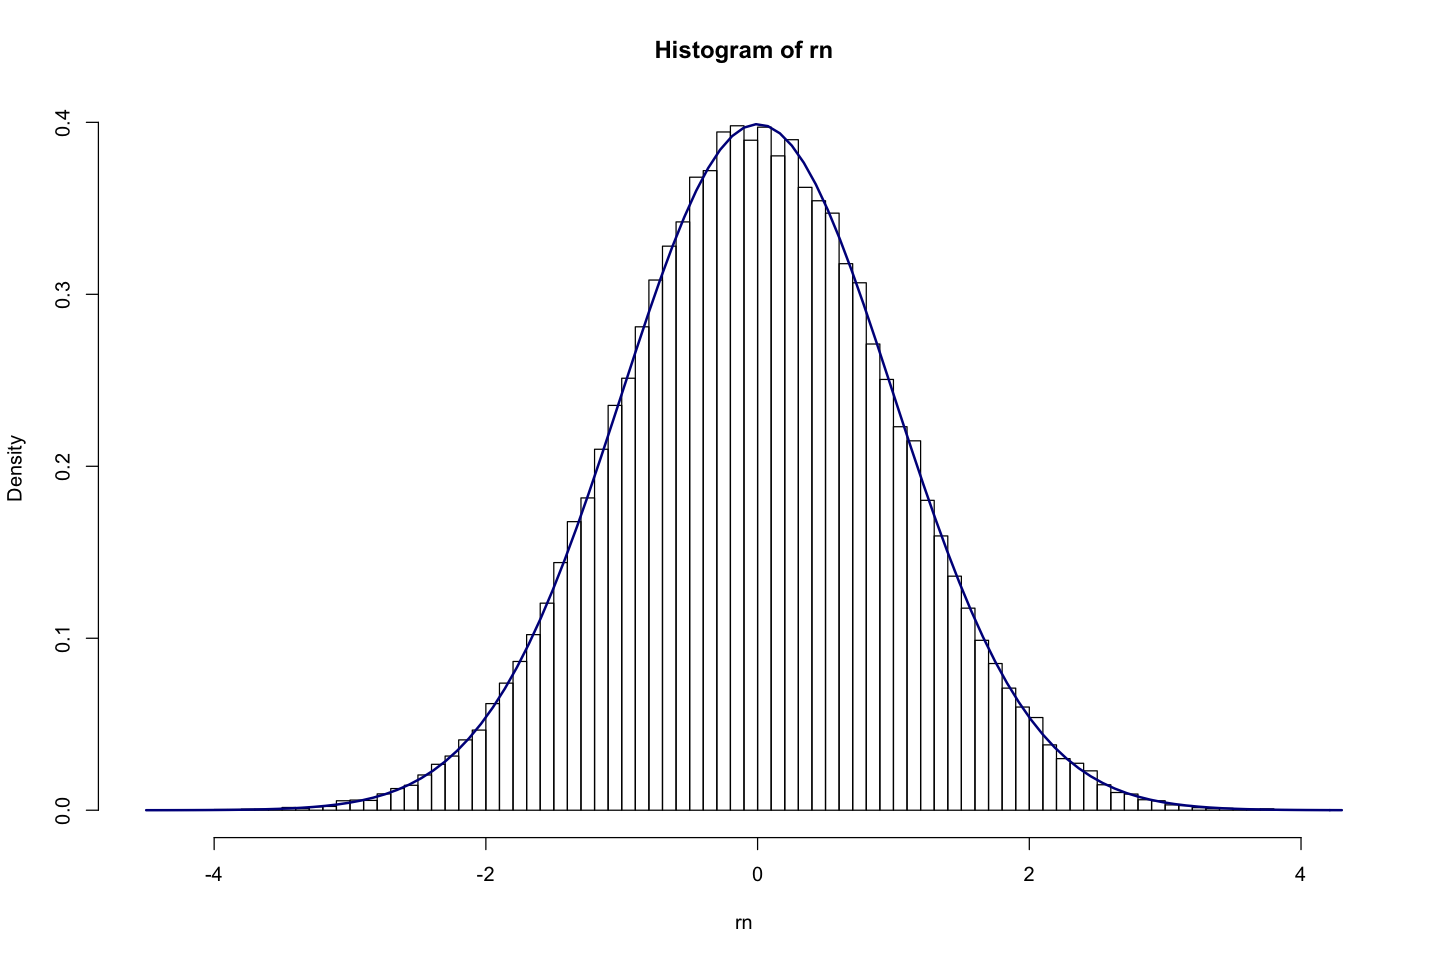

In [9]:
# Generate a standard normal distribution
rn <- rnorm(100000)
print(paste0("standard deviation: ", sd(rn)))
print(paste0("Kurtosis: ", round(kurtosis(rn),2)))
options(repr.plot.width = 12, repr.plot.height = 8)
hist(rn,breaks=100,prob=TRUE)
curve(dnorm(x, mean=0, sd=1), col="darkblue", lwd=2, add=TRUE ) # Overlay a standard normal distribution

### 5. Distribution, SD and Kurtosis of Daily Returns

[1] "standard deviation: 0.0209398802087924"
[1] "Kurtosis: 12.79"
[1] "Mean is as below:"


[1] 0.000694716

daily.returns
daily.returns 0.02093988

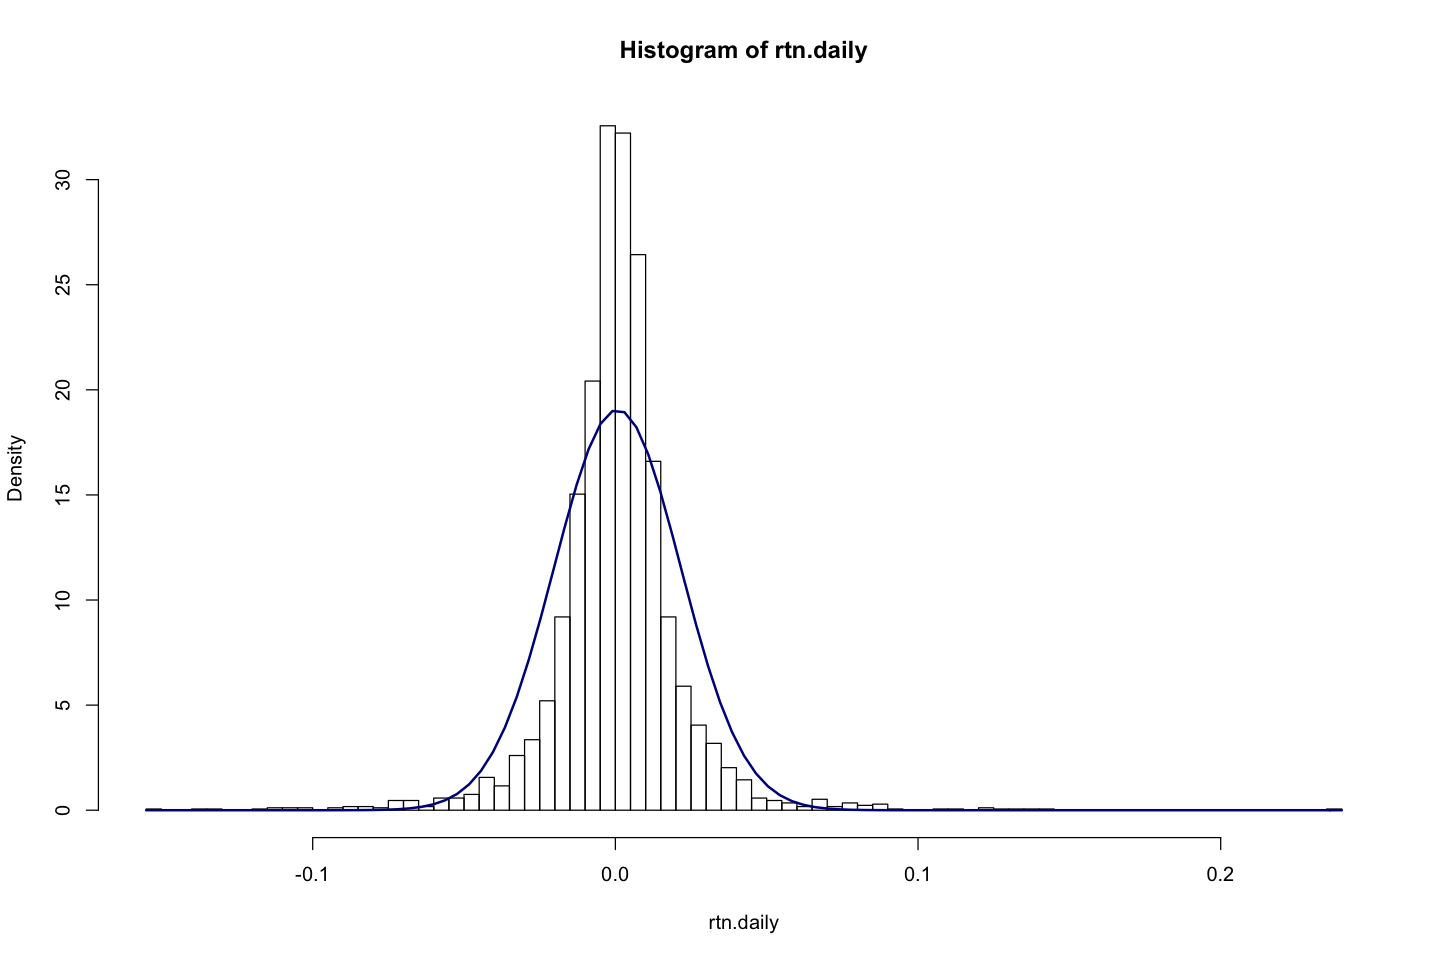

In [10]:
print(paste0("standard deviation: ", sd(rtn.daily)))
print(paste0("Kurtosis: ", round(kurtosis(rtn.daily),2)))

options(repr.plot.width = 12, repr.plot.height = 8)
hist(rtn.daily, breaks=100, prob=TRUE) # Make it a probability distribution

m<-mean(rtn.daily)
std<-sqrt(var(rtn.daily))
print("Mean is as below:")
m
std

# Overlay a standard normal distribution
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE )

#### Observation:

Here, I have displayed a standard distribution, which is the blue line, and the histogram bars represent the daily returns of SPGI, which is mpstly centered around 0.

Generally, distributions of daily stock returns are fat-tailed relative to the normal distribution we showed above.

The shape of the daily return distribution is more peaked than a symmetric, bell-shaped, standard normal distribution. It means that extreme events (a large price move) are more likely to happen than a standard normal curve, can go to more than 0.2 or less than -0.1

Here, there  is a very high kurtosis, meaning that the distribution is highly fat-tailed, or may have lot of outlier values. Kurtosis is 12.79 times of a normal distribution.

### 6. Distribution and characteristics of Monthly Volume of SPGI for the year - 2019

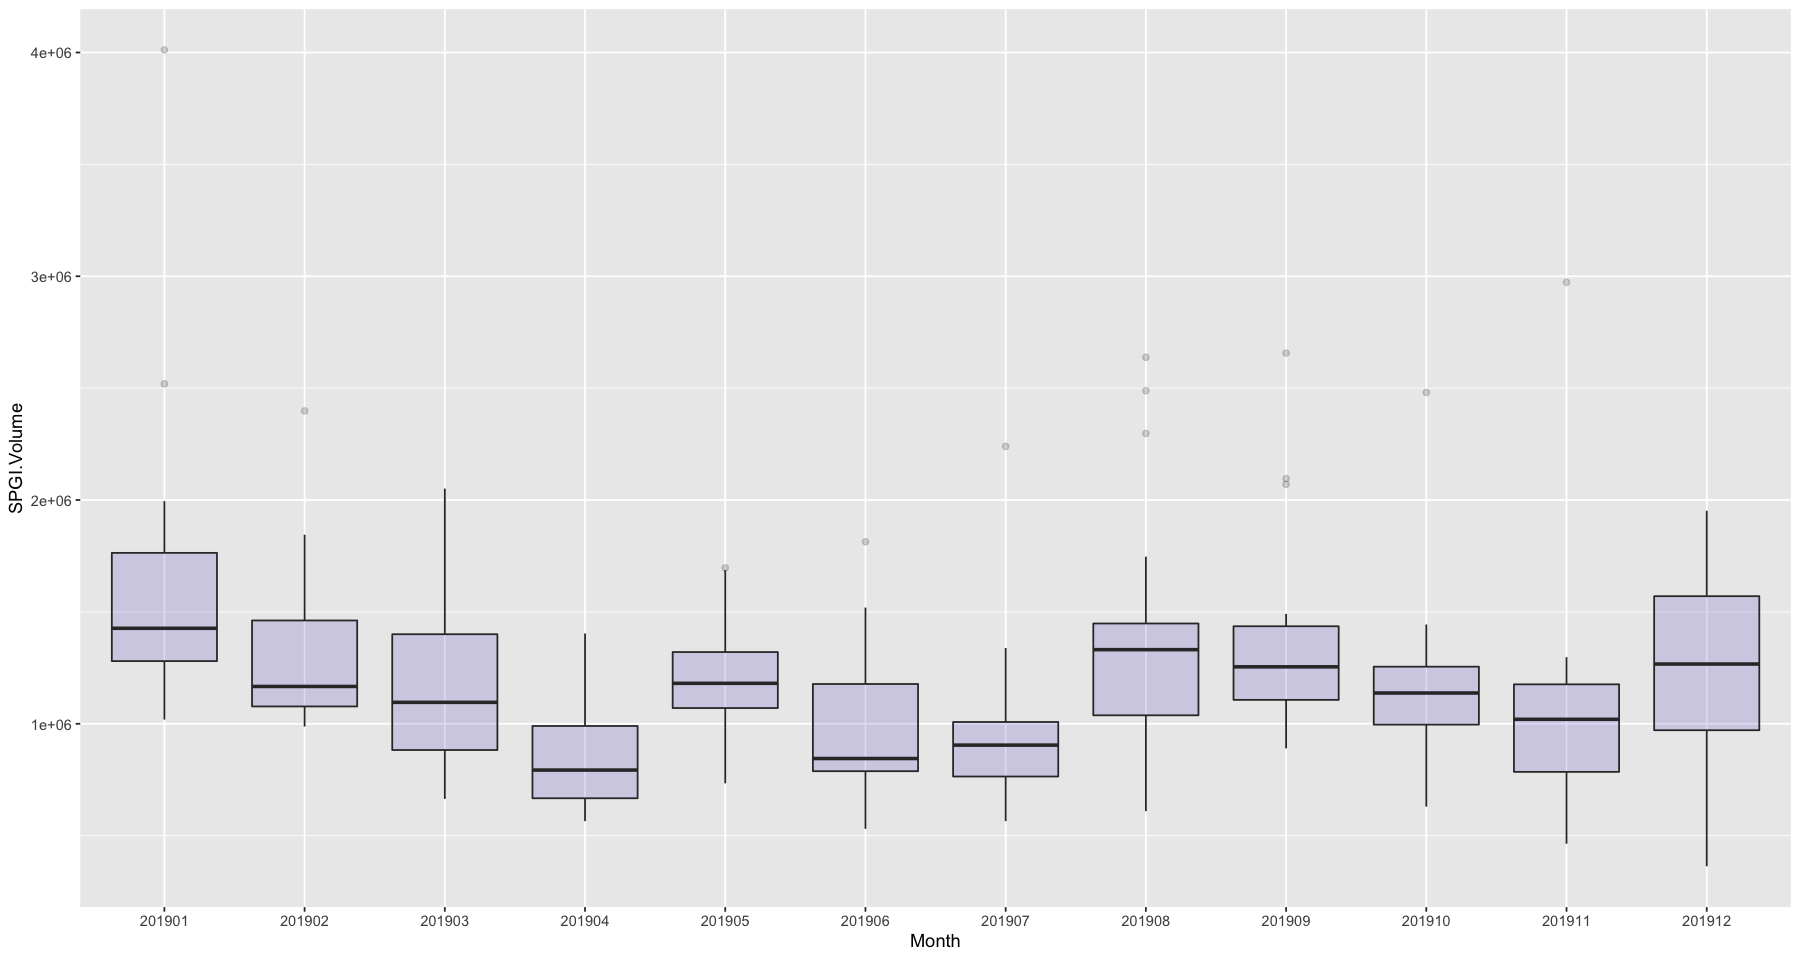

In [11]:
# A really basic boxplot.
df$year <- format(index(df),"%Y")
df$month <- format(index(df),"%Y%m")
df3 <- data.frame(df) %>% filter(year==2019)
df3$SPGI.Volume <- as.numeric(df3$SPGI.Volume)

options(repr.plot.width = 15, repr.plot.height = 8)

# Basic plot
p <-ggplot(df3, aes(x=as.factor(month), y=SPGI.Volume)) 

p + geom_boxplot(fill="slateblue", alpha=0.2) +  xlab("Month") 

#### Observation:
SPGI has some huge variations in terms of the monthly volume of its traded stocks

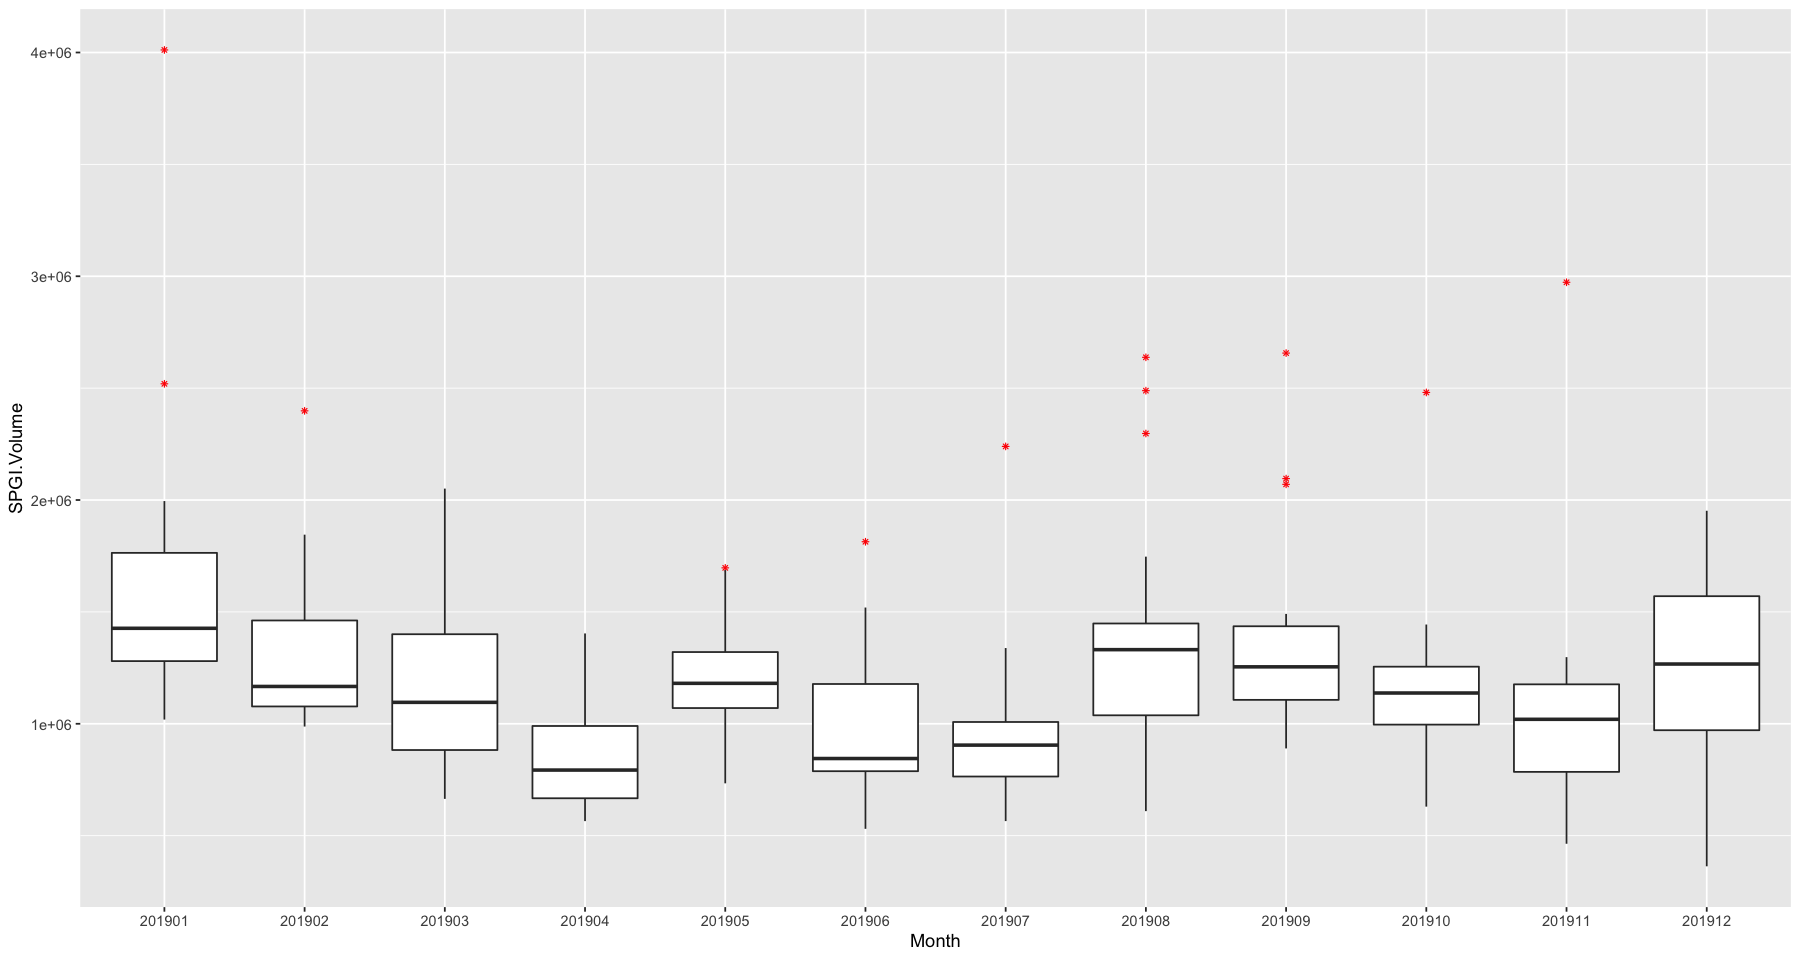

In [12]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Change outlier, color, shape and size
p2 <- p  + geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=1) +     xlab("Month")
p2

#### Observation:

The above Box Plot is extremely useful to find the abnormal values or anomalies, which will help discover malpractices as such insider trading, etc. 

The red dots indicates the outliers, or extreme changes for that month.

### 7. Distribution and characteristics of High-Close and Open-Close of SPGI for the year - 2019

Warning message in bxp(list(stats = structure(c(-0.0149185382292234, -0.00829099063955174, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”
Warning message in bxp(list(stats = structure(c(-0.00845035405076144, -0.00305440519803246, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


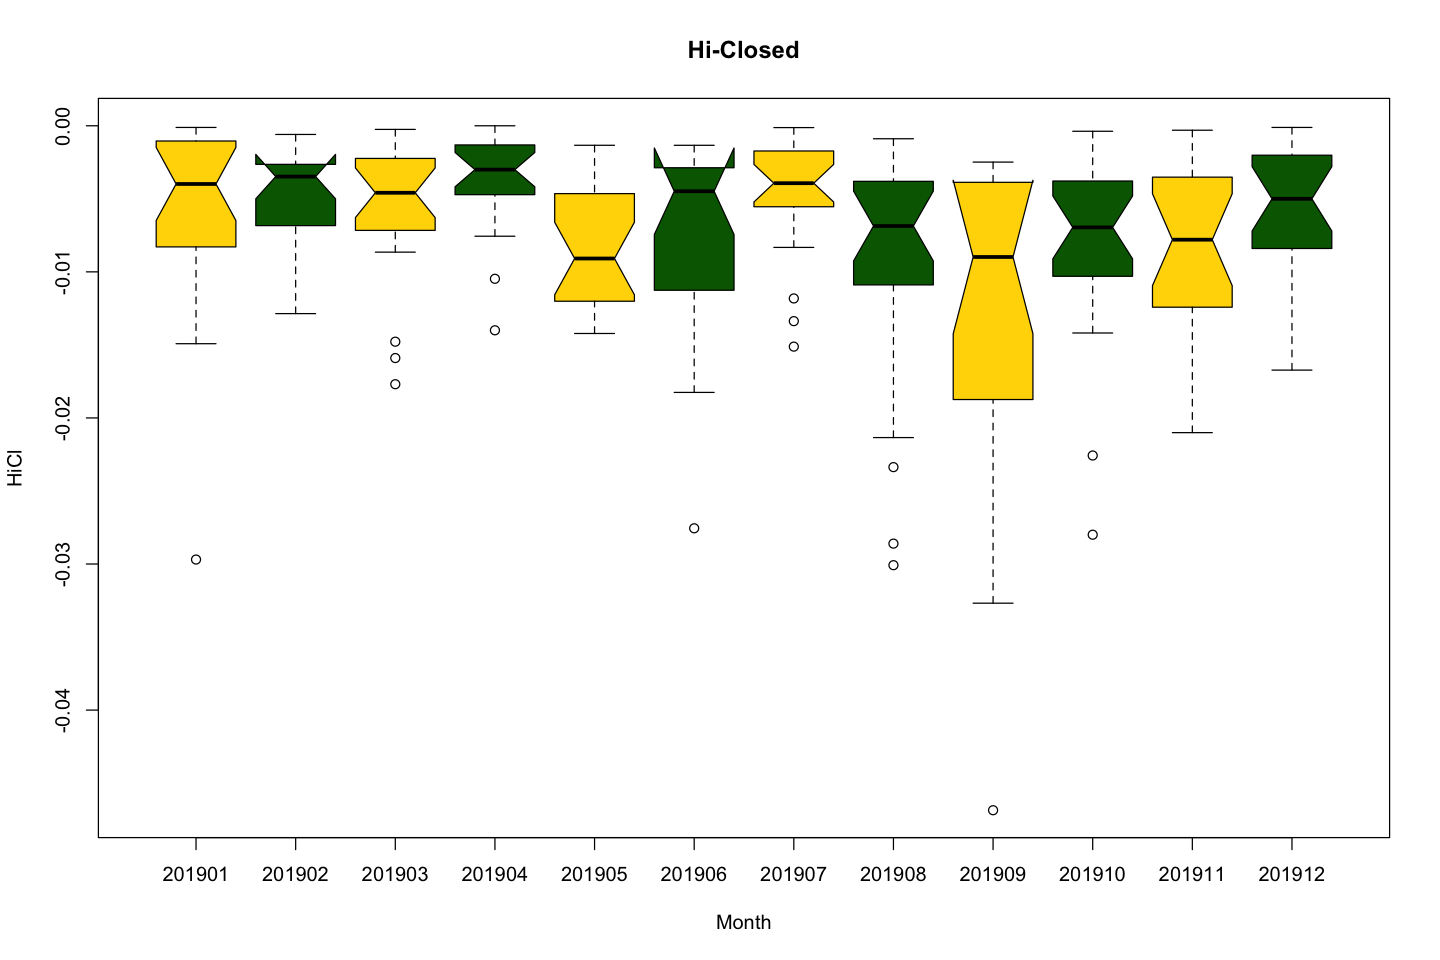

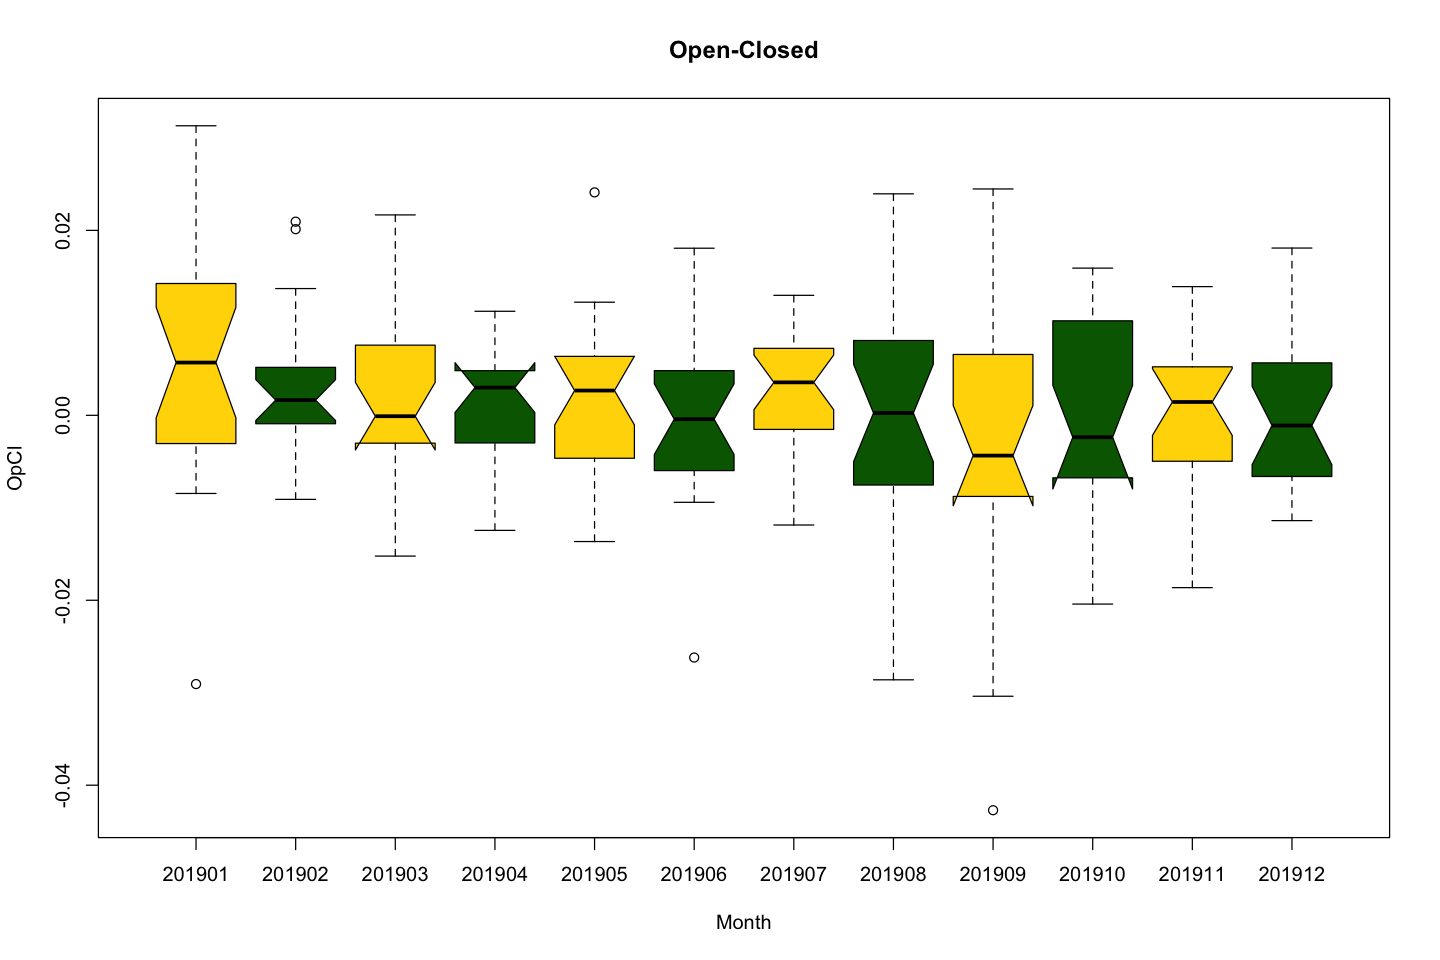

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)
df <- SPGI
df$OpCl <- OpCl(df)
df$OpOp <- OpOp(df) 
df$HiCl <- HiCl(df) 
df$month <- format(index(df),"%Y%m")
df$year <- format(index(df),"%Y")
df_hiCl <- df[df$year==2019,]
boxplot(HiCl~month, data=df_hiCl, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Hi-Closed", xlab="Month")

boxplot(OpCl~month, data=df_hiCl, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Open-Closed", xlab="Month")

#### Observation:

The above Box Plots is extremely useful to find the abnormal values or anomalies, which will help discover malpractices as such insider trading, etc. 

The dots indicates the outliers, or extreme changes for that month.

### 8. Price and Volume of SPGI stocks traded for last 3 months

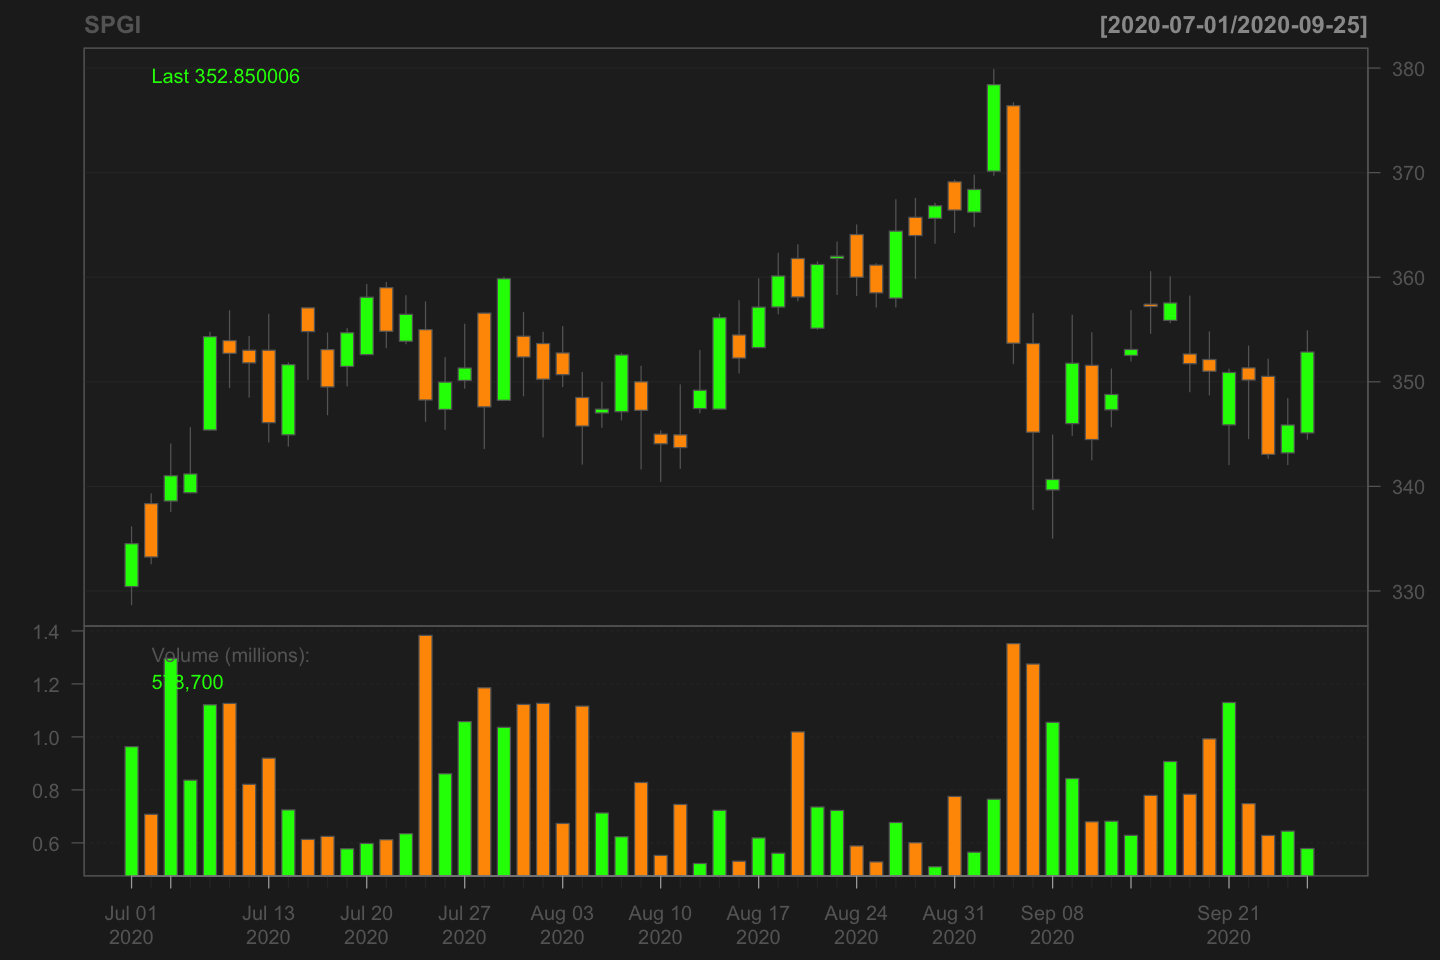

In [14]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "last 3 months")

#### Observation:
Over the past 3 months, the stock price has shown an increasing trend. 

SPGI had a very high stock price September 2020, and then dropped significantly. The high price also resulted in a high volume of stocks traded. 

### 9. Price and Volume of SPGI stocks traded for past 1 year, Covid-19 downfall

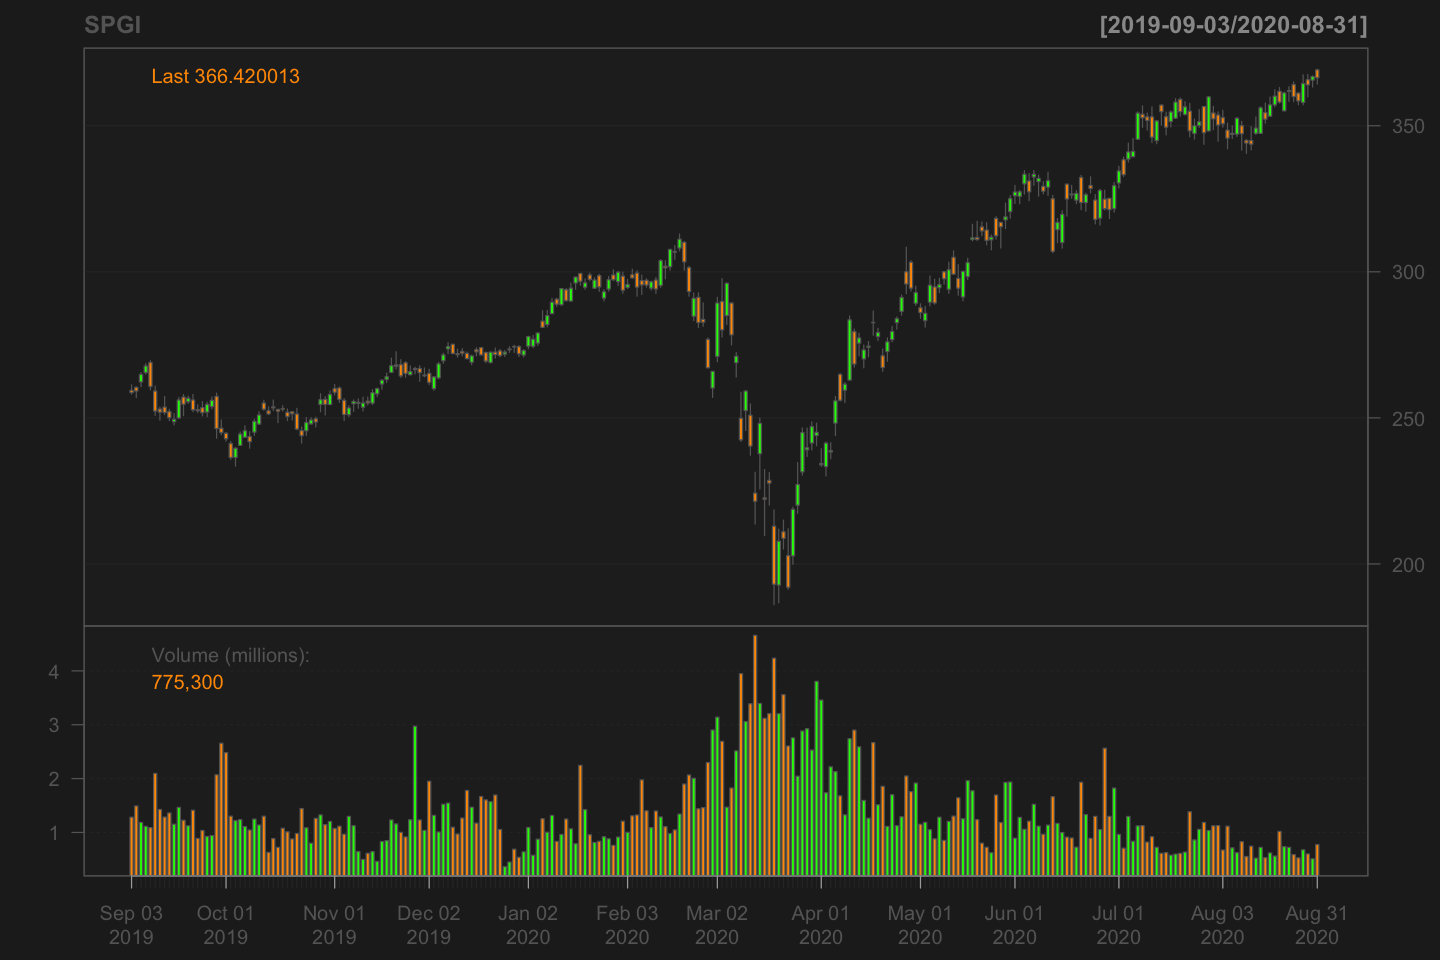

In [15]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "2019-09::2020-08")

#### Observation:
Over the past 1 year, the stock price has shown an increasing trend, though during March-April 2020, the stock prices fell significantly, because of the Covid-19 pandemic. However, after April 2020, the prices have been rising again.

SPGI had a very low stock price during April 2020, and that is when the volume of trade was  extremely high. It has been more or less declining since then. 

### 10. Price and Volume of SPGI stocks traded for past 1 year, Covid-19 downfall

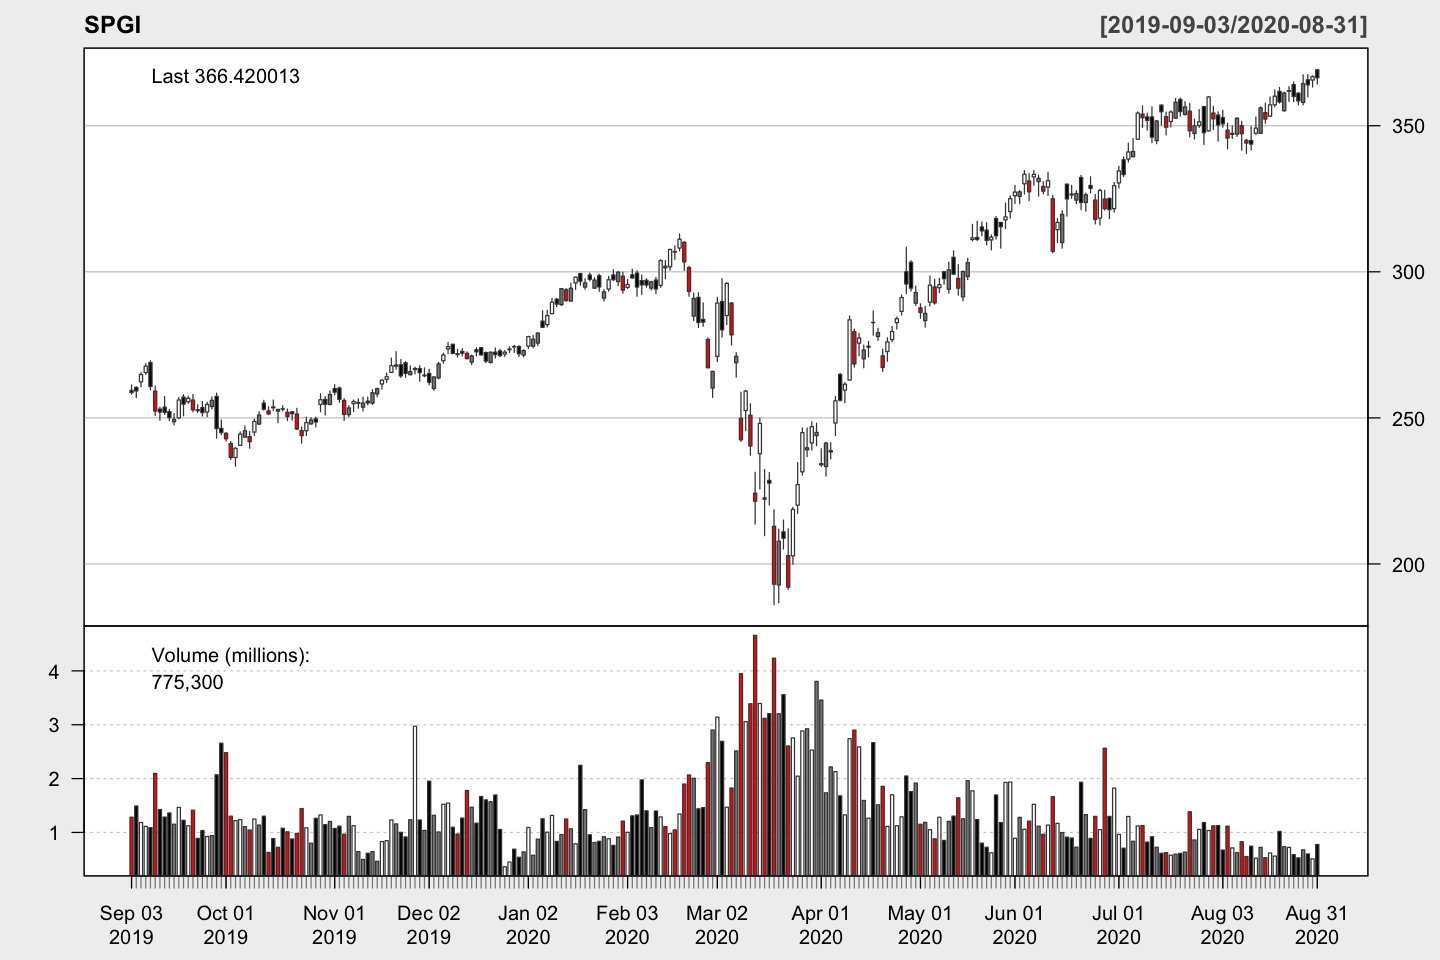

In [16]:
options(repr.plot.width = 12, repr.plot.height = 8)
candleChart(SPGI,subset = "2019-09::2020-08",multi.col=TRUE, theme='white')

#### Observation:
Over the past 1 year, the stock price has shown an increasing trend, though during March-April 2020, the stock prices fell significantly, because of the Covid-19 pandemic. However, after April 2020, the prices have been rising again.

SPGI had a very low stock price during April 2020, and that is when the volume of trade was  extremely high. It has been more or less declining since then. 

### 11. Price and Volume of SPGI stocks traded since 2007 till date

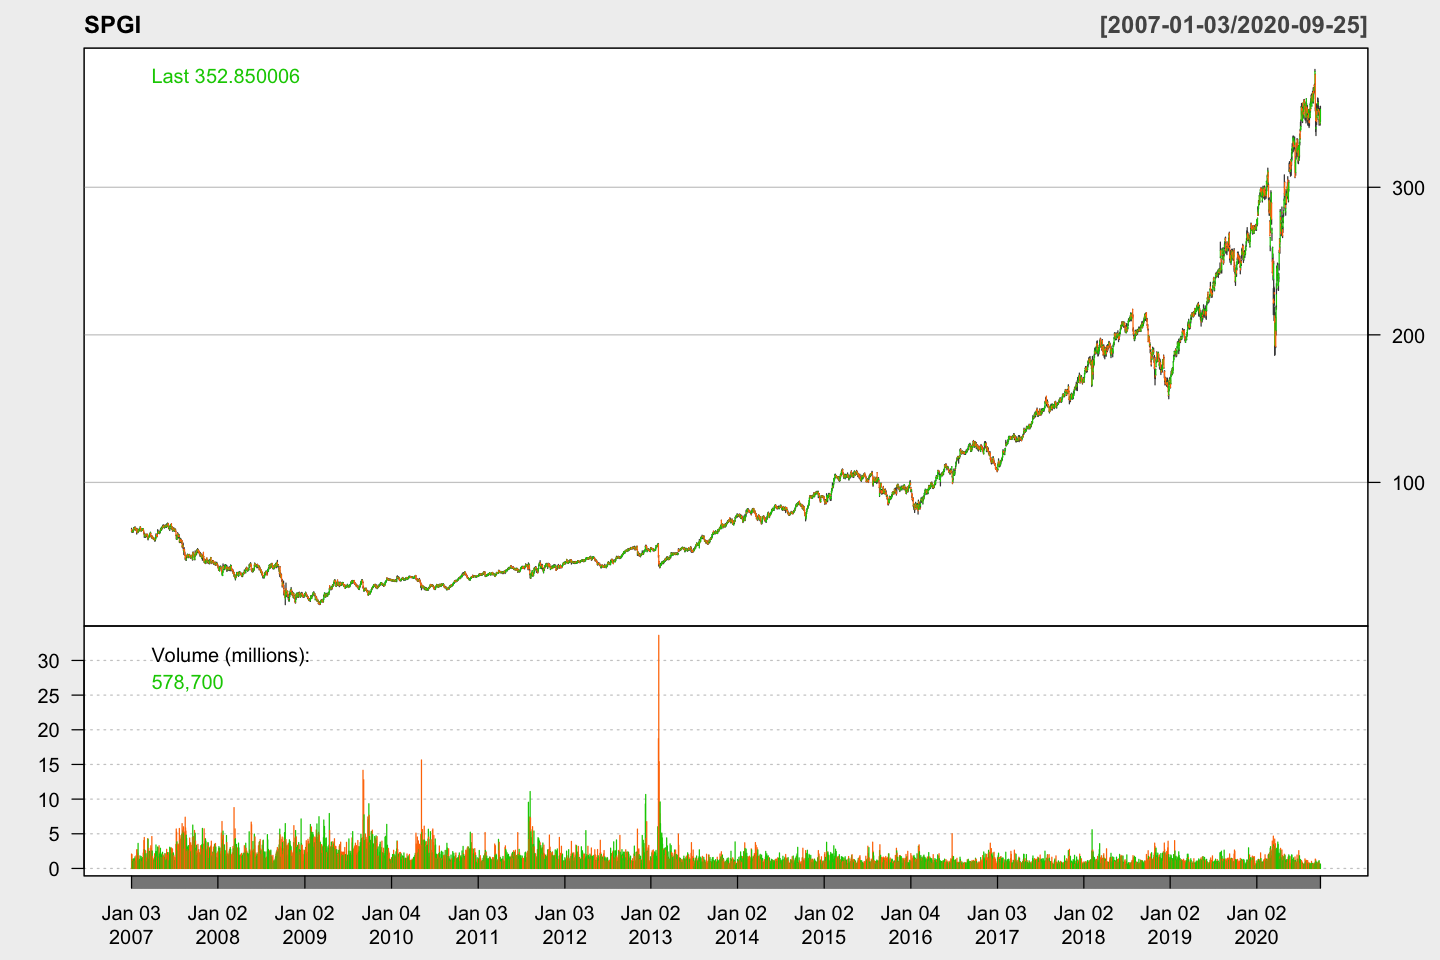

In [17]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, theme = chartTheme("white"))

#### Observation:
Over the past 14 years, the stock price has shown an increasing trend, though it had some dips during 2019 and 2020, where the stock prices fell significantly.

The volume has also been more or less consitent, except for Jan 2013, where we see a major spike in the volume of traded stocks. There were also small spikes during 2010.

### 12. Price and Volume of SPGI stocks for past 2 years, also added Bollinger Bands

#### Bollinger Bands
* Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price.
* Bollinger Bands use 2 parameters, Period and Standard Deviations, StdDev. The default values are 20 for period, and 2 for standard deviations.
* Bollinger bands help determine whether prices are high or low on a relative basis. They are used in pairs, both upper and lower bands and in conjunction with a moving average. Further, the pair of bands is not intended to be used on its own. Use the pair to confirm signals given with other indicators.

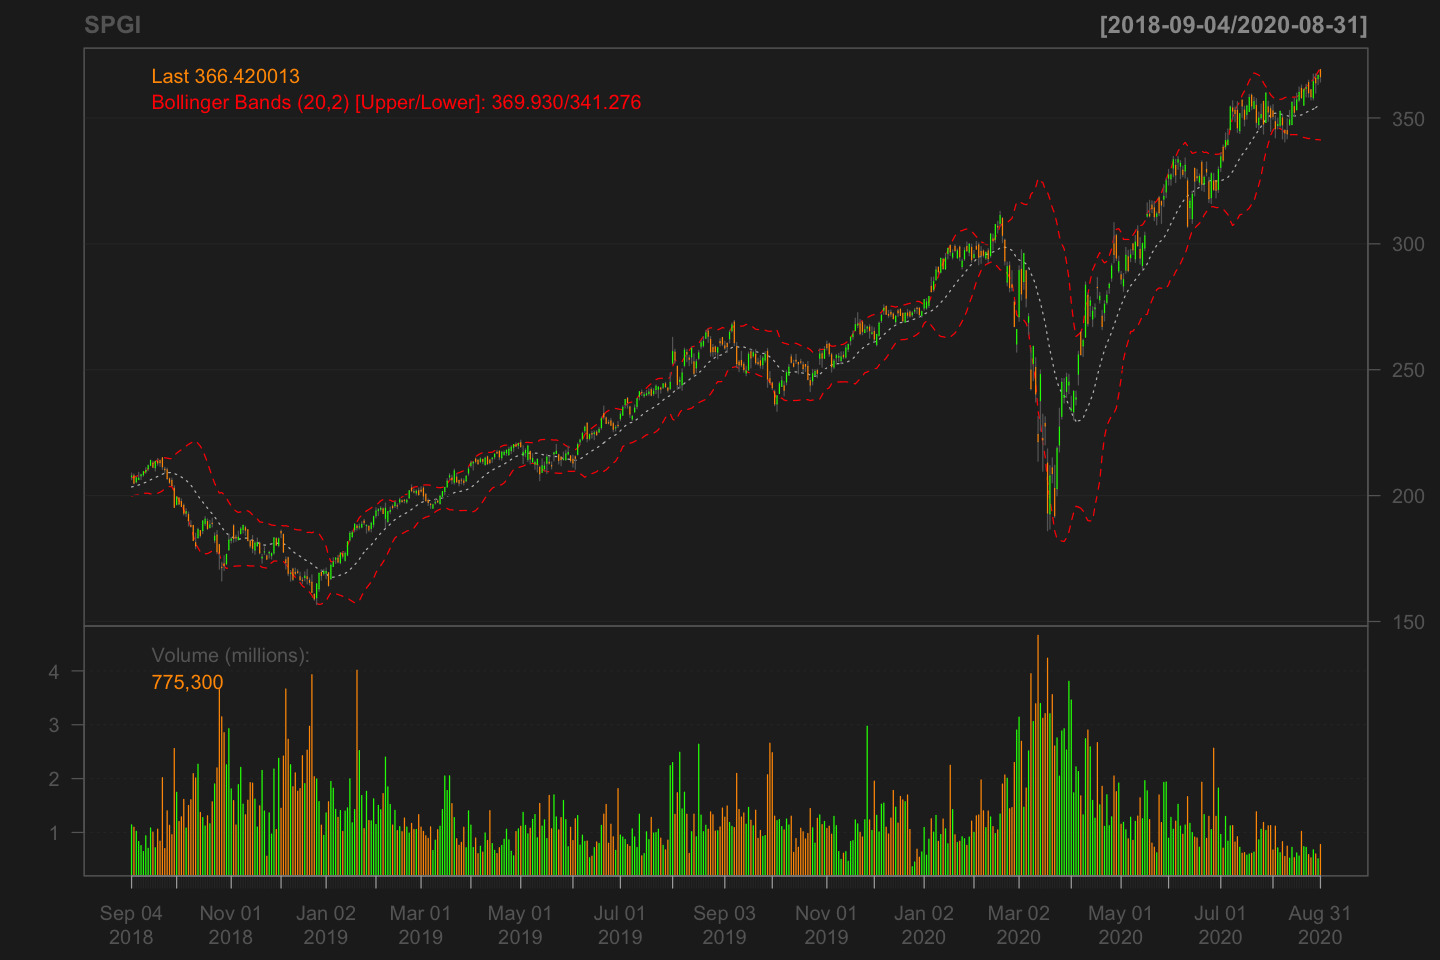

In [18]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "2018-09::2020-08", TA = c(addVo(), addBBands()))  #add volume and Bollinger Bands from TTR

#### Observation:
Over the past 2 years, the stock price has shown an increasing trend, though it had a huge dip during April 2020, where the stock prices fell significantly due to the Covid-19 pandemic. Prices have been rising ever since.

The volume has also been more or less consitent, except for April 2020, where we see a major spike in the volume of traded stocks. Therer were also small spikes during late 2018.

Further, we have added the lower and upper Bollinger bands, which here show that the stock prices were more less within very less deviation from the bands, except for the Covid-19 period, where there were huge deviations.

### 13. Price and fast and slow Moving Averages for SPGI stocks for past 1 year

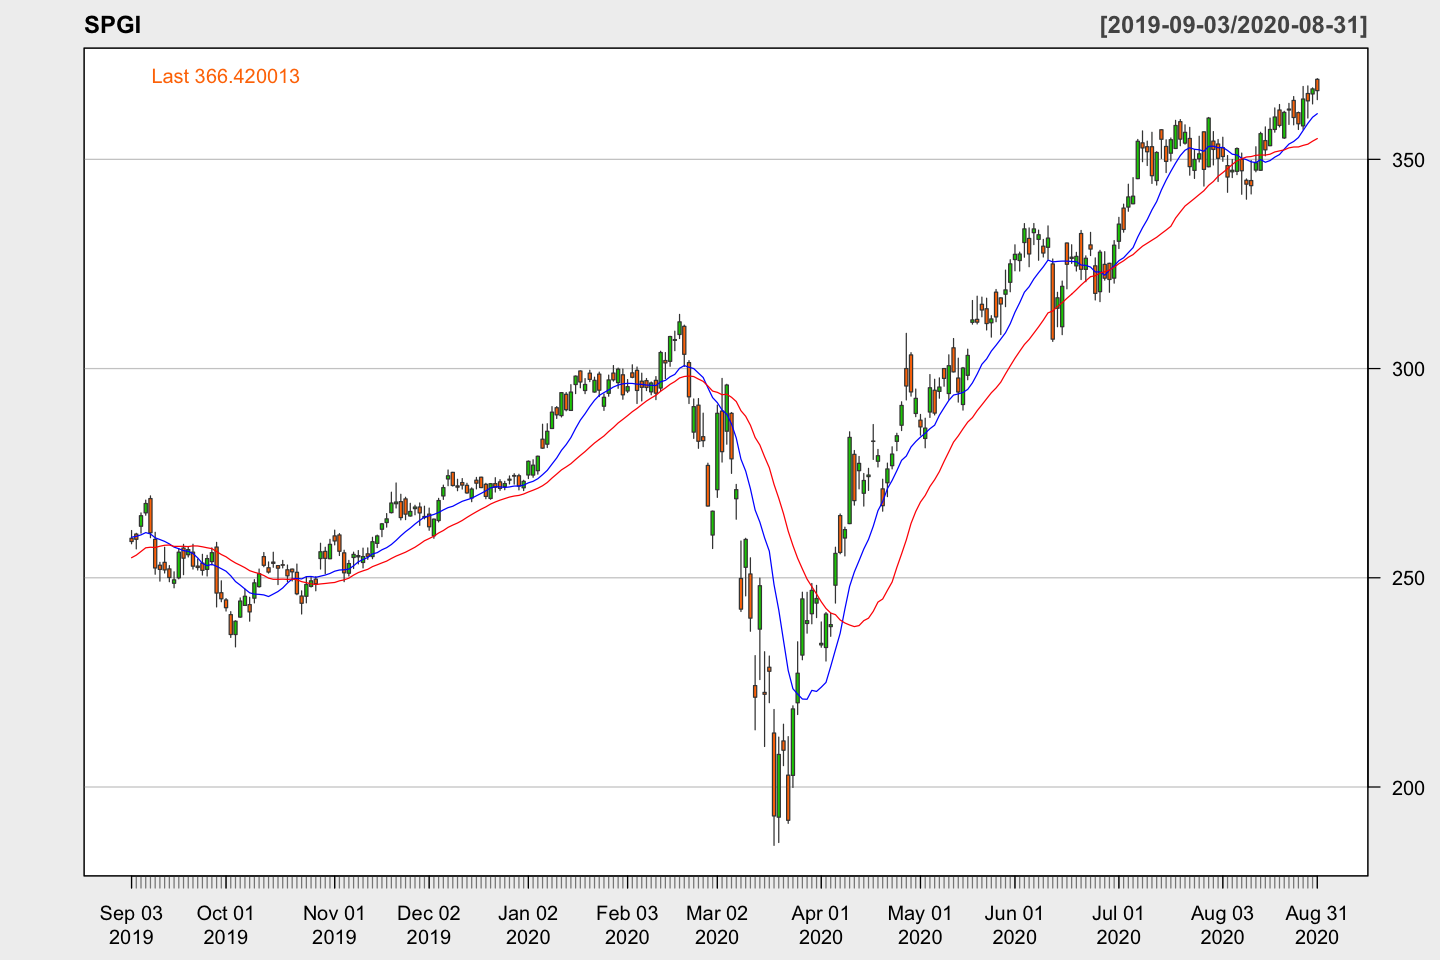

In [19]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "2019-09::2020-08",bar.type='hlc', 
            TA = c(addSMA(n=12,col="blue"),addSMA(n=26,col="red")),
            theme = chartTheme("white"))  

#### Observation:
Over the past 1 year, the stock price has more or less remained above the fast and slow moving averages. Except for April 2020, where the stock prices fell significantly due to the Covid-19 pandemic.

Also, the two moving averages intersect at various points, in which case they make the MACD = 0. They indicate that for those specific points, there is no difference between the stock prices as per the two different averages.

### 14. Price, moving averages, MACD and RSI for SPGI stocks for past 1 year

#### MACD - Moving Average Convergence Divergence
* It is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.
* MACD=12-Period EMA − 26-Period EMA, or "fast EMA - slow FMA"
* The MACD has a positive value whenever the 12-period EMA is above the 26-period EMA and a negative value when the 12-period EMA is below the 26-period EMA. The more distant the MACD is above or below its baseline indicates that the distance between the two EMAs is growing. 

#### RSI
* The relative strength index (RSI) is a popular momentum indicator.
* It measures the magnitude of recent price changes to evaluate overbought or oversold conditions. 
* The RSI is displayed as an oscillator and can have a reading from 0 to 100.

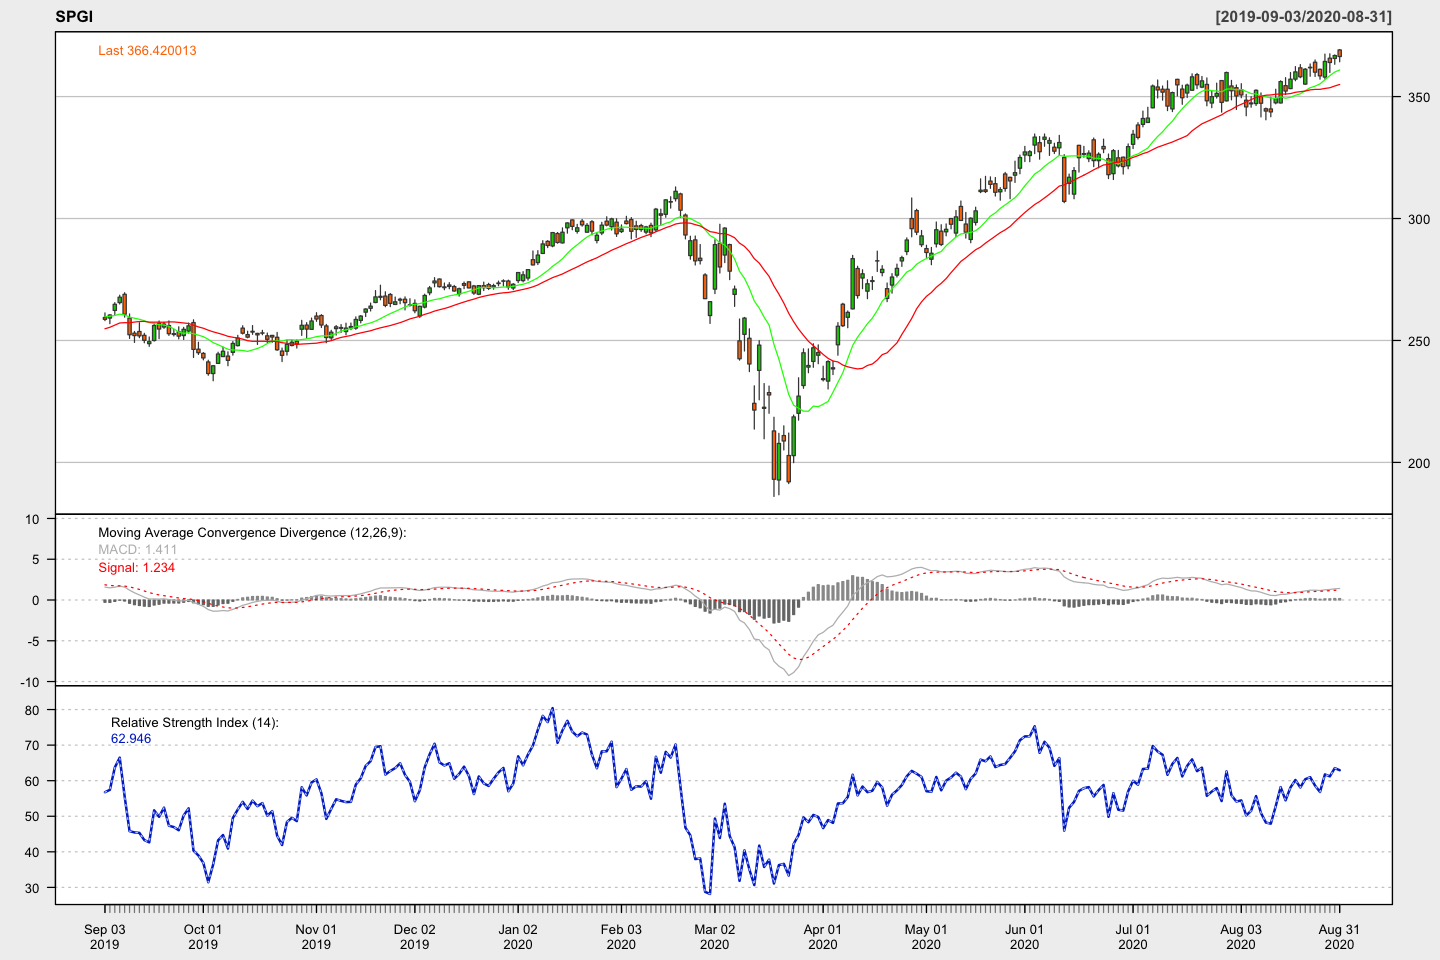

In [20]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "2019-09::2020-08",bar.type='hlc', 
            TA = c(addSMA(n=12,col="green"),addSMA(n=26,col="red"),
                addMACD(),addRSI()),
            theme = chartTheme("white"))  

#### Observation:
Over the past 1 year, the MACD and the RSI have more or less remained consistent, except for April 2020, where the stock prices fell significantly due to the Covid-19 pandemic.

Also, we see that when the two moving averages intersect at varius points, they make the MACD = 0.

### 15. Price, volume, bollinger bands, and CCI of SPGI stocks for past 1 year

#### CCI
- The commodity channel index (CCI) is an oscillator originally introduced by Donald Lambert in 1980. 
- Since its introduction, the indicator has grown in popularity and is now a very common tool for traders in identifying cyclical trends not only in commodities but also equities and currencies.

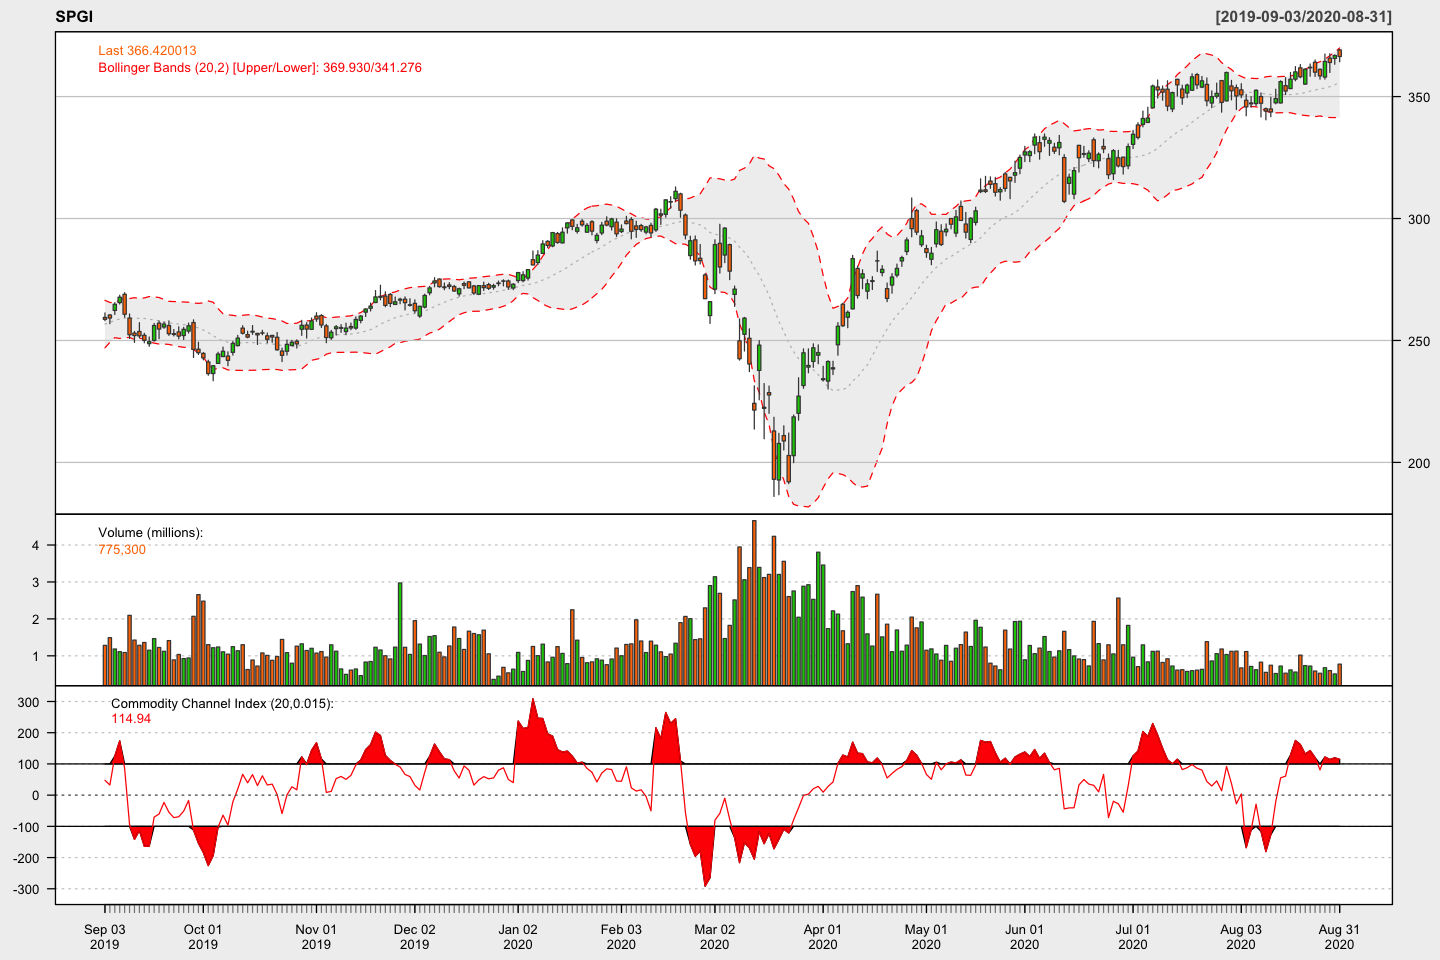

In [21]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "2019-09::2020-08",theme="white",  TA="addVo();addBBands();addCCI()") 

#### Observation:
Over the past 1 year, CCI fell largely for March-April 2020, where the stock prices fell significantly due to the Covid-19 pandemic. Also, CCI has reacted more than other indicators for SPGI stocks. There are several dips.

### 16. Price, volume, bollinger bands, CCI, and Open-Close of SPGI stocks for past 1 year

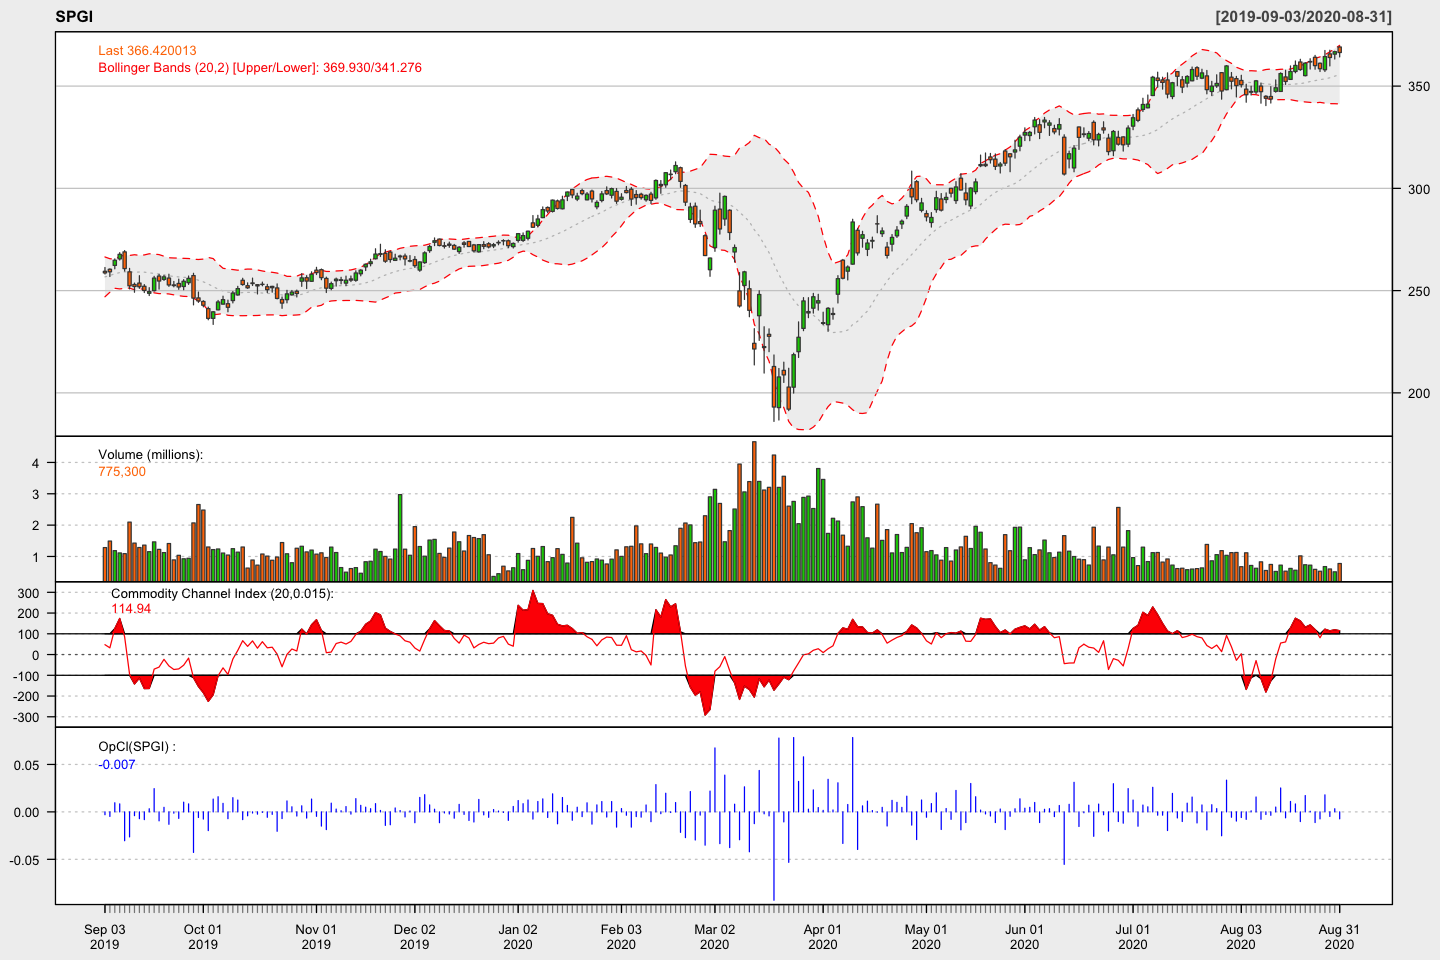

In [22]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(SPGI, subset = "2019-09::2020-08",
            theme="white",  
            TA="addVo();addBBands();addCCI(); 
                addTA(OpCl(SPGI),col='blue', type='h')  ")

#### Observation:
Over the past 1 year, Open-Close was more or less moving in a consistend trend, but the Open-Close differed a lot, during the due to the Covid-19 pandemic.

## -----------------------------------------------------------------

## Stock 2: `FB` - Facebook Inc.

### Common stock data transformation:

### 1. Returns from Open to Close, Open to Open, High to Close, or Close to Close

In [23]:
df = FB
df2 <- df

df2$OpCl <- OpCl(df2)
df2$OpOp <- OpOp(df2) 
df2$HiCl <- HiCl(df2) 
df2$ClCl <- ClCl(df2) 

df2$pcntOpCl1 <- Delt(Op(df2),Cl(df2),k=1)
df2$pcntOpCl2 <- Delt(Op(df2),Cl(df2),k=2)
df2$pcntOpCl3 <- Delt(Op(df2),Cl(df2),k=3)

#One period lag of the close 
df2$lagCl <- Lag(Cl(df2)) 
df2$lag2Cl <- Lag(Cl(df2),2)  
df2$lag3Cl <- Lag(Cl(df2),3) 

# Move up the OpCl by one period
df2$nextOpCl <- Next(OpCl(df2)) 

head(df2,3)

FB.Open FB.High FB.Low FB.Close FB.Volume FB.Adjusted OpCl       
[1,] 42.05   45.00   38.00  38.23    573576400 38.23       -0.09084421
[2,] 36.53   36.66   33.00  34.03    168192700 34.03       -0.06843690
[3,] 32.61   33.59   30.94  31.00    101786600 31.00       -0.04937139
     OpOp       HiCl        ClCl        pcntOpCl1  pcntOpCl2  pcntOpCl3 lagCl
[1,]         NA -0.15044444          NA         NA         NA NA           NA
[2,] -0.1312723 -0.07174034 -0.10986139 -0.1907253         NA NA        38.23
[3,] -0.1073090 -0.07710628 -0.08903906 -0.1513824 -0.2627824 NA        34.03
     lag2Cl lag3Cl nextOpCl   
[1,]    NA  NA     -0.06843690
[2,]    NA  NA     -0.04937139
[3,] 38.23  NA      0.02008285

#### Observation: 
A declining OPEN price drives down all other metrics. Also, the closing price of the previous day does not have any direct relation with the opening price of the current day. 

### 2. Convert the stock data to monthly

Often we need to reduce the daily stock records to weekly or monthly stock records. The irregularities in a calendar, such as holidays, leap year, or months of the year, may drive our programming crazy.

In [24]:
df.monthly <- to.monthly(df)
df.monthly$month <- format(index(df.monthly),"%Y%m")
df.monthly$year <- format(index(df.monthly),"%Y")
head(df.monthly, 3)

         df.Open df.High df.Low df.Close  df.Volume df.Adjusted  month year
May 2012   42.05   45.00  26.83    29.60 1251513200       29.60 201205 2012
Jun 2012   28.89   33.45  25.52    31.10  667910500       31.10 201206 2012
Jul 2012   31.25   32.88  21.61    21.71  520189700       21.71 201207 2012

### 3. Calculate daily, weekly, and monthly return on stocks

In [25]:
rtn.daily <- dailyReturn(df) # returns by day 
rtn.weekly <- weeklyReturn(df) # returns by week 
rtn.monthly <- monthlyReturn(df) # returns by month, indexed by yearmon 
# daily,weekly,monthly,quarterly, and yearly 
rtn.allperiods <- allReturns(df) # note the plural
head(rtn.daily, 3)
head(rtn.weekly, 2)
head(rtn.monthly, 2)

           daily.returns
2012-05-18   -0.09084421
2012-05-21   -0.10986139
2012-05-22   -0.08903906

           weekly.returns
2012-05-18    -0.09084421
2012-05-25    -0.16531520

           monthly.returns
2012-05-31     -0.29607608
2012-06-29      0.05067568

### Exploratory Data Analysis:

### 4. The basic characteristics of stock returns - `Standard Deviation` and `Kurtosis`
- A standard normal distribution has 0 mean, 1 standard deviation, and 0 excess [kurtosis](http://www.r-tutor.com/elementary-statistics/numerical-measures/kurtosis) 
- The ditribution of a typical stock returns has small standard deviation and positive excess kurtosis

### Generate a standard general distribution to understand deviations and kurtosis.

[1] "standard deviation: 0.999869058711856"
[1] "Kurtosis: -0.01"


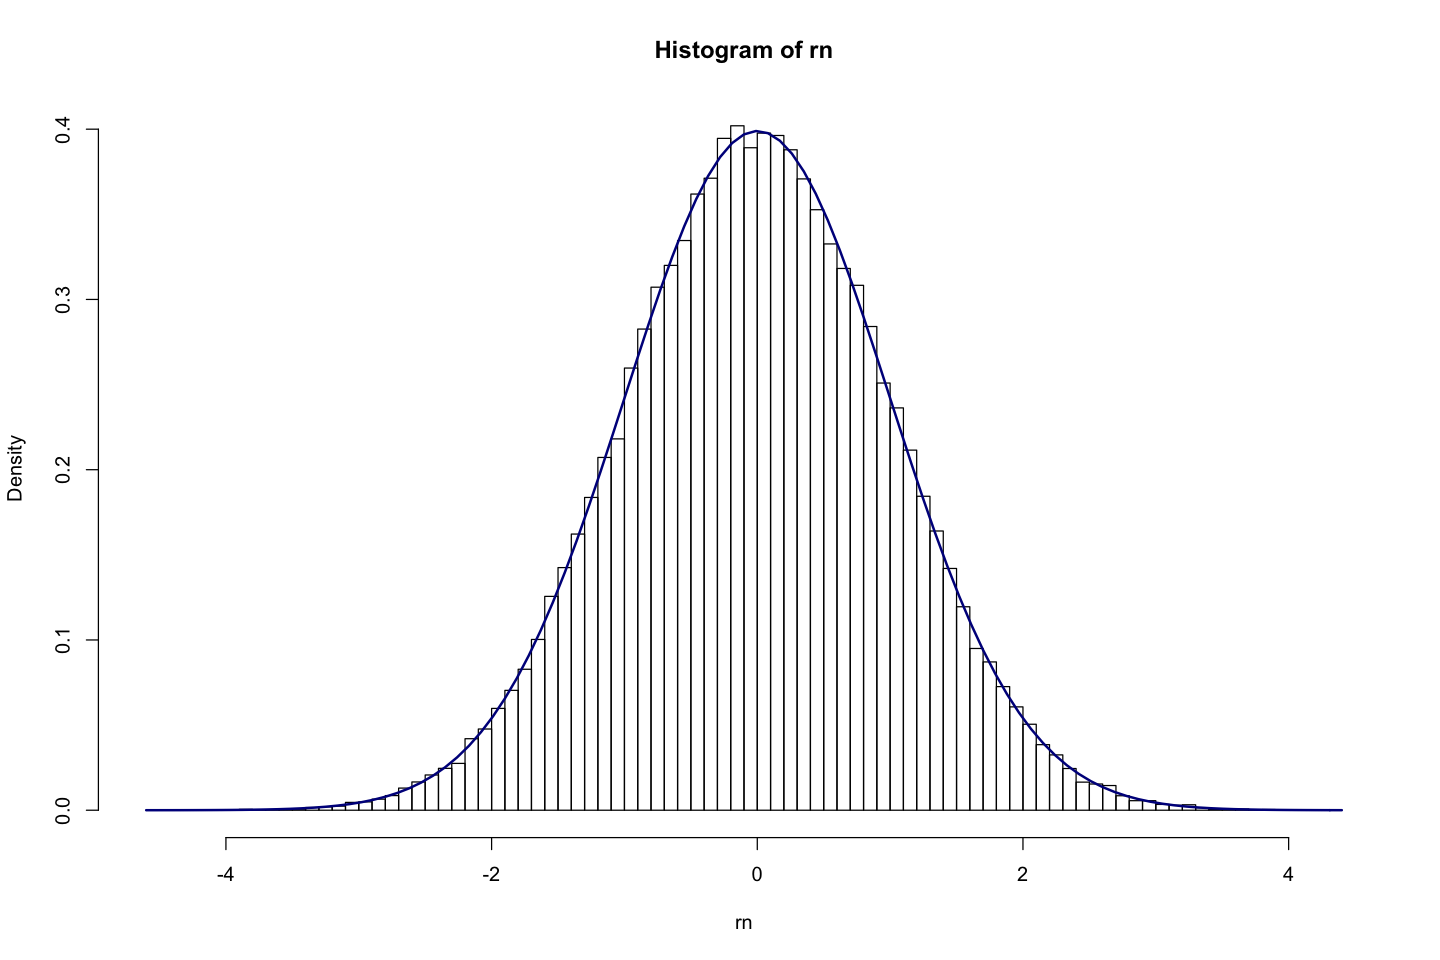

In [26]:
# Generate a standard normal distribution
rn <- rnorm(100000)
print(paste0("standard deviation: ", sd(rn)))
print(paste0("Kurtosis: ", round(kurtosis(rn),2)))
options(repr.plot.width = 12, repr.plot.height = 8)
hist(rn,breaks=100,prob=TRUE)
curve(dnorm(x, mean=0, sd=1), col="darkblue", lwd=2, add=TRUE ) # Overlay a standard normal distribution

### 5. Distribution, SD and Kurtosis of Daily Returns

[1] "standard deviation: 0.0236613010888477"
[1] "Kurtosis: 19.12"
[1] "Mean is as below:"


[1] 0.001133897

daily.returns
daily.returns 0.0236613

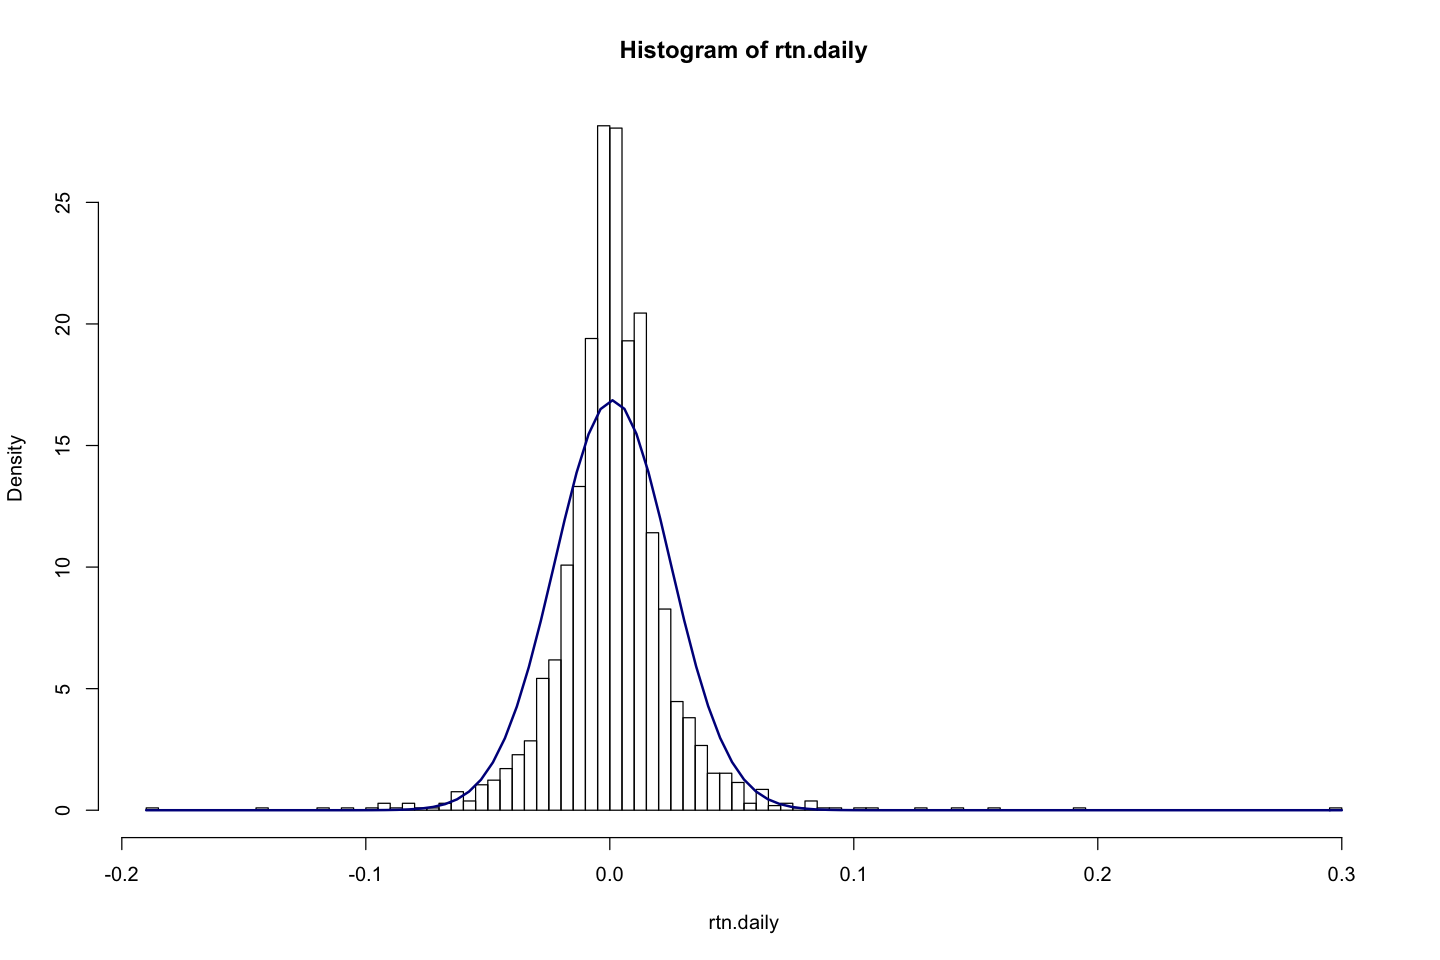

In [27]:
print(paste0("standard deviation: ", sd(rtn.daily)))
print(paste0("Kurtosis: ", round(kurtosis(rtn.daily),2)))

options(repr.plot.width = 12, repr.plot.height = 8)
hist(rtn.daily, breaks=100, prob=TRUE) # Make it a probability distribution

m<-mean(rtn.daily)
std<-sqrt(var(rtn.daily))
print("Mean is as below:")
m
std

# Overlay a standard normal distribution
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE )

#### Observation:

Here, I have displayed a standard distribution, which is the blue line, and the histogram bars represent the daily returns of FB, which is mpstly centered around 0.

Generally, distributions of daily stock returns are fat-tailed relative to the normal distribution we showed above.

The shape of the daily return distribution is more peaked than a symmetric, bell-shaped, standard normal distribution. It means that extreme events (a large price move) are more likely to happen than a standard normal curve, can go to more than 0.3 or less than -0.2

Here, there  is a very high kurtosis, meaning that the distribution is highly fat-tailed, or may have lot of outlier values. Kurtosis is 19.12 times of a normal distribution.

### 6. Distribution and characteristics of Monthly Volume of FB for the year - 2019

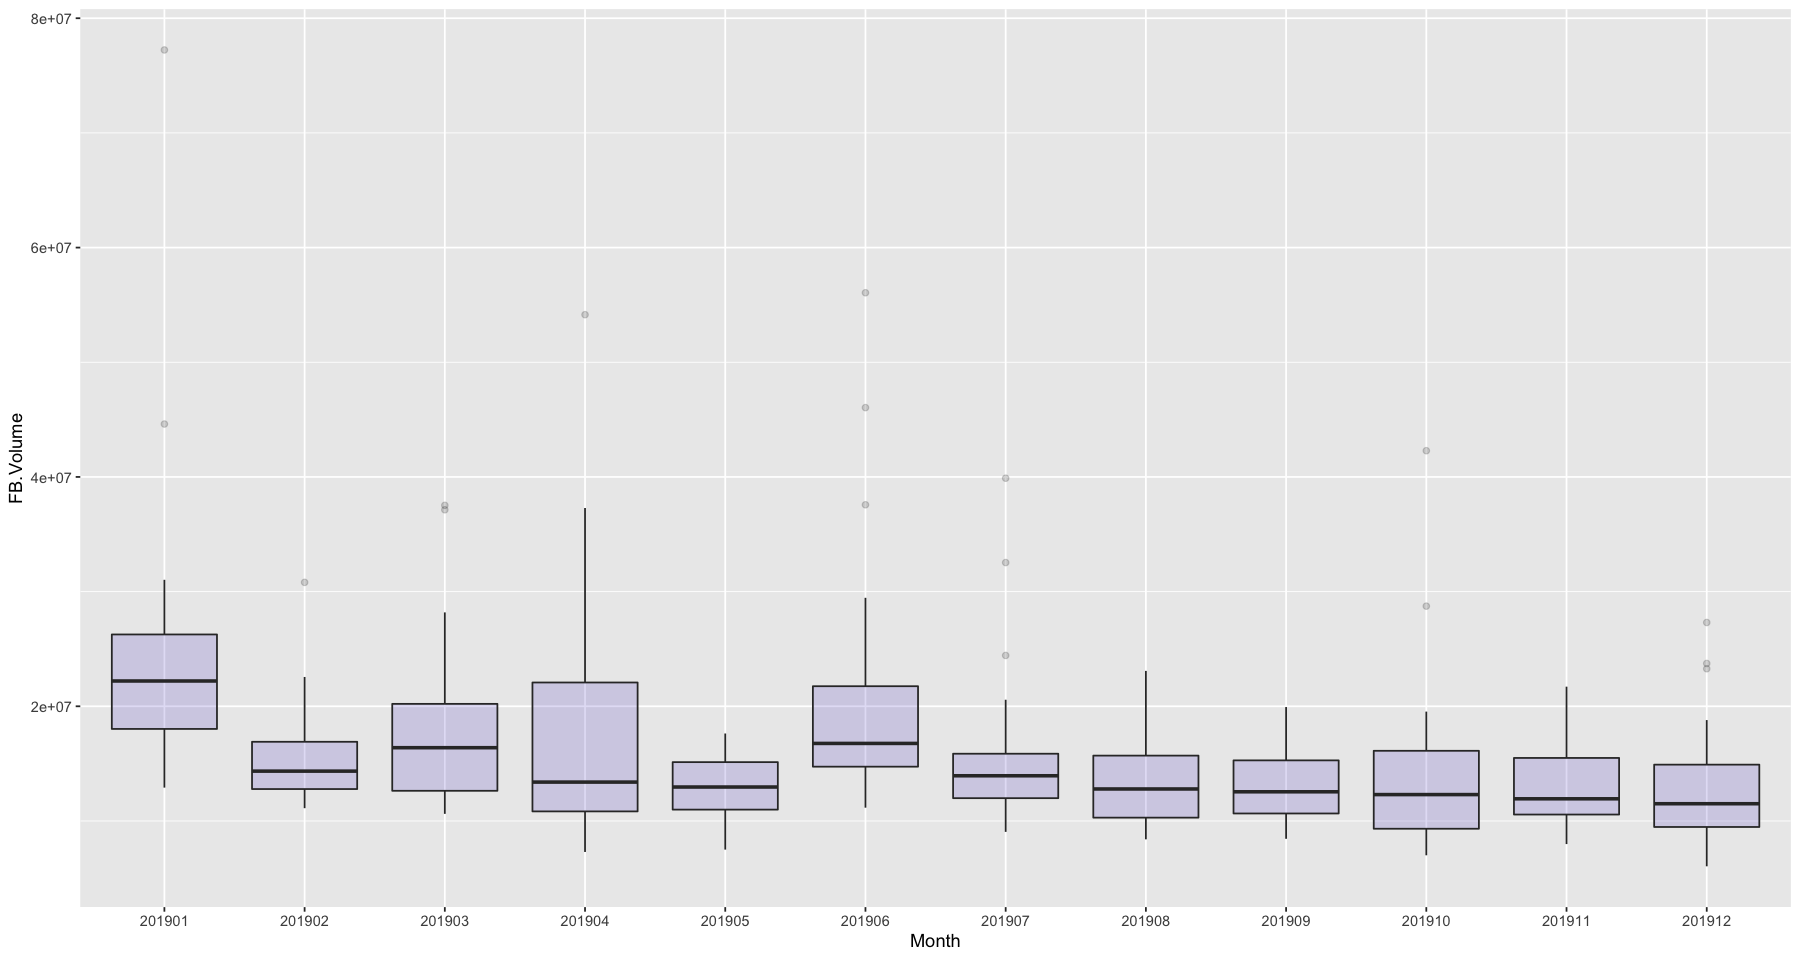

In [28]:
# A really basic boxplot.
df$year <- format(index(df),"%Y")
df$month <- format(index(df),"%Y%m")
df3 <- data.frame(df) %>% filter(year==2019)
df3$FB.Volume <- as.numeric(df3$FB.Volume)

options(repr.plot.width = 15, repr.plot.height = 8)

# Basic plot
p <-ggplot(df3, aes(x=as.factor(month), y=FB.Volume)) 

p + geom_boxplot(fill="slateblue", alpha=0.2) +  xlab("Month") 

#### Observation:
FB has some huge variations in terms of the monthly volume of its traded stocks

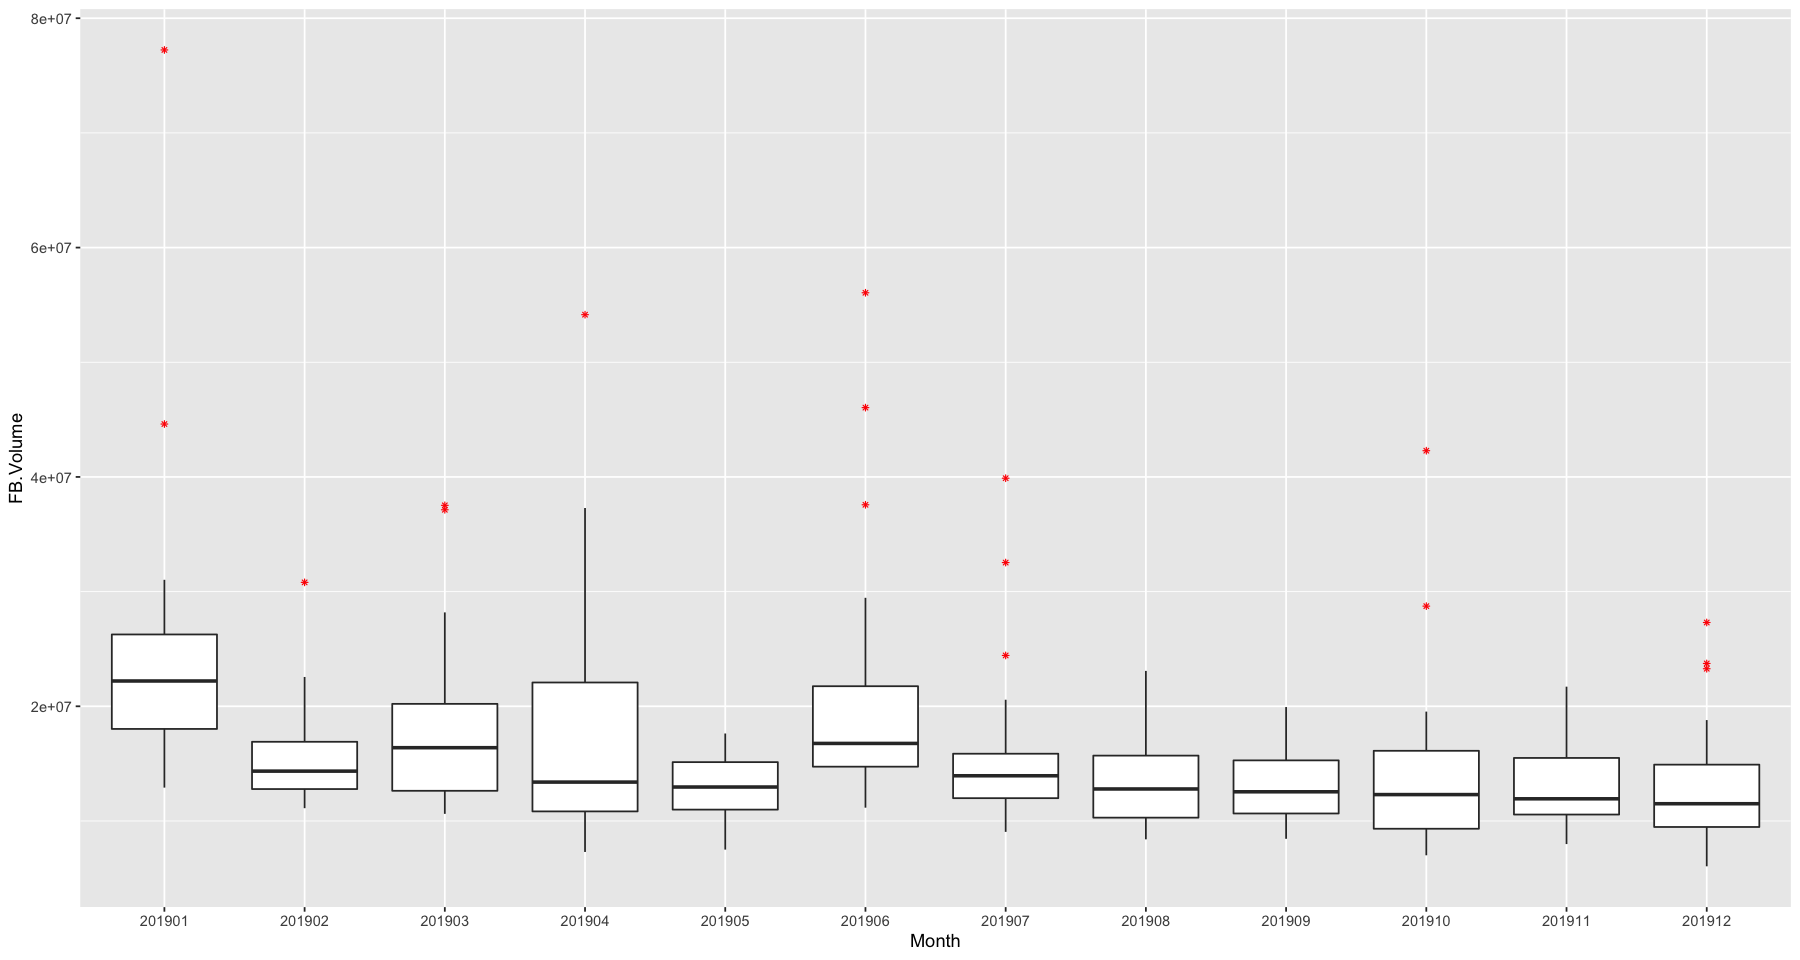

In [29]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Change outlier, color, shape and size
p2 <- p  + geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=1) +     xlab("Month")
p2

#### Observation:

The above Box Plot is extremely useful to find the abnormal values or anomalies, which will help discover malpractices as such insider trading, etc. 

The red dots indicates the outliers, or extreme changes for that month.

### 7. Distribution and characteristics of High-Close and Open-Close of FB for the year - 2019

Warning message in bxp(list(stats = structure(c(-0.0302419348741545, -0.0156793289362678, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”
Warning message in bxp(list(stats = structure(c(-0.0268410846158692, -0.0039176088365227, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


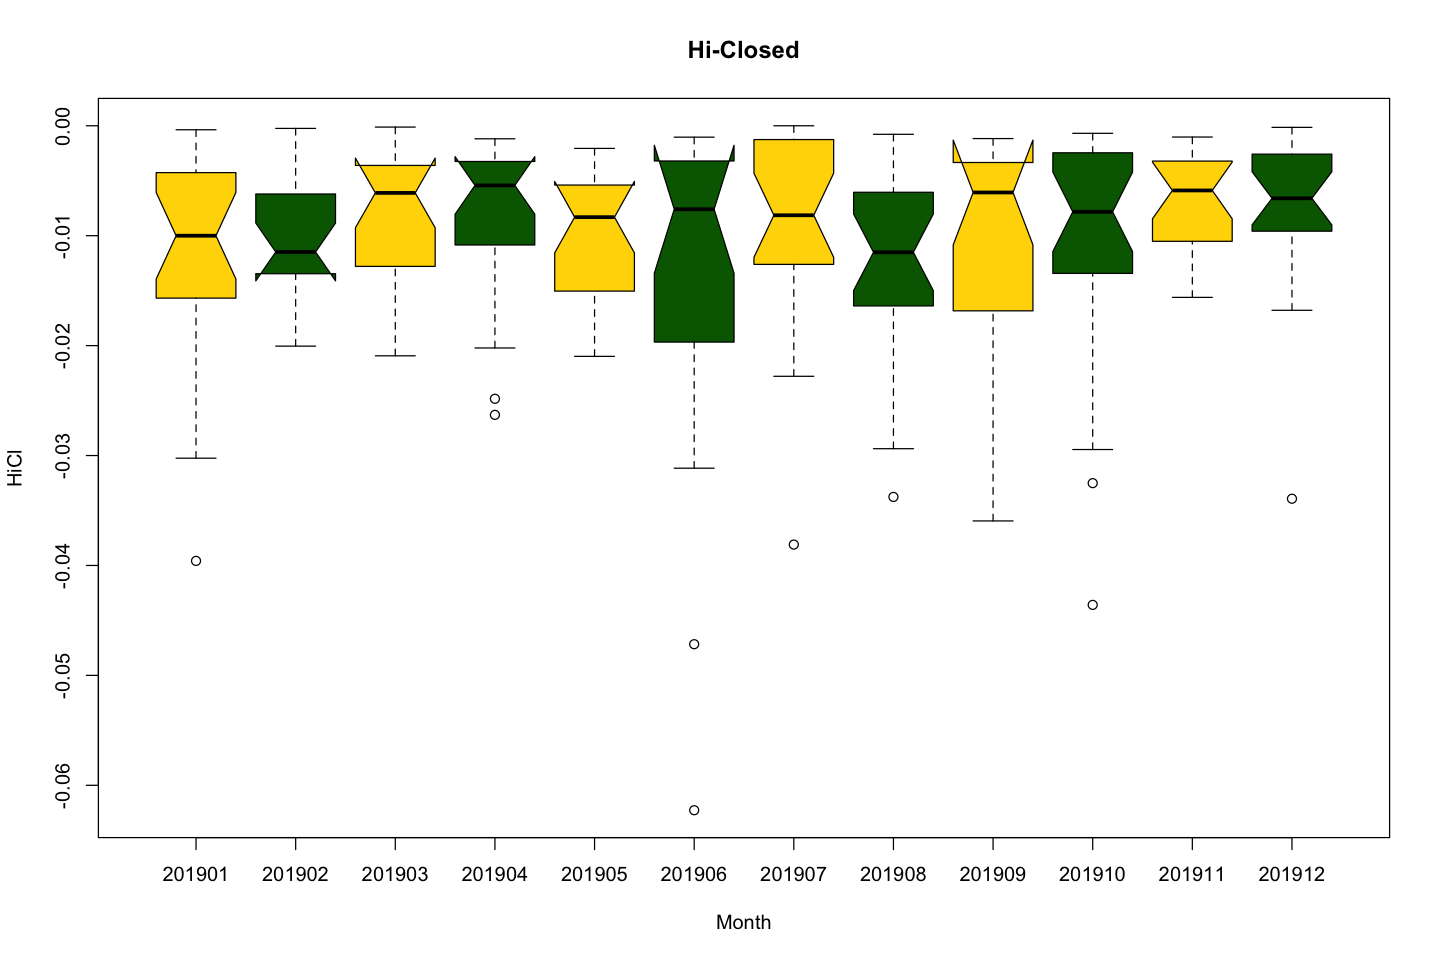

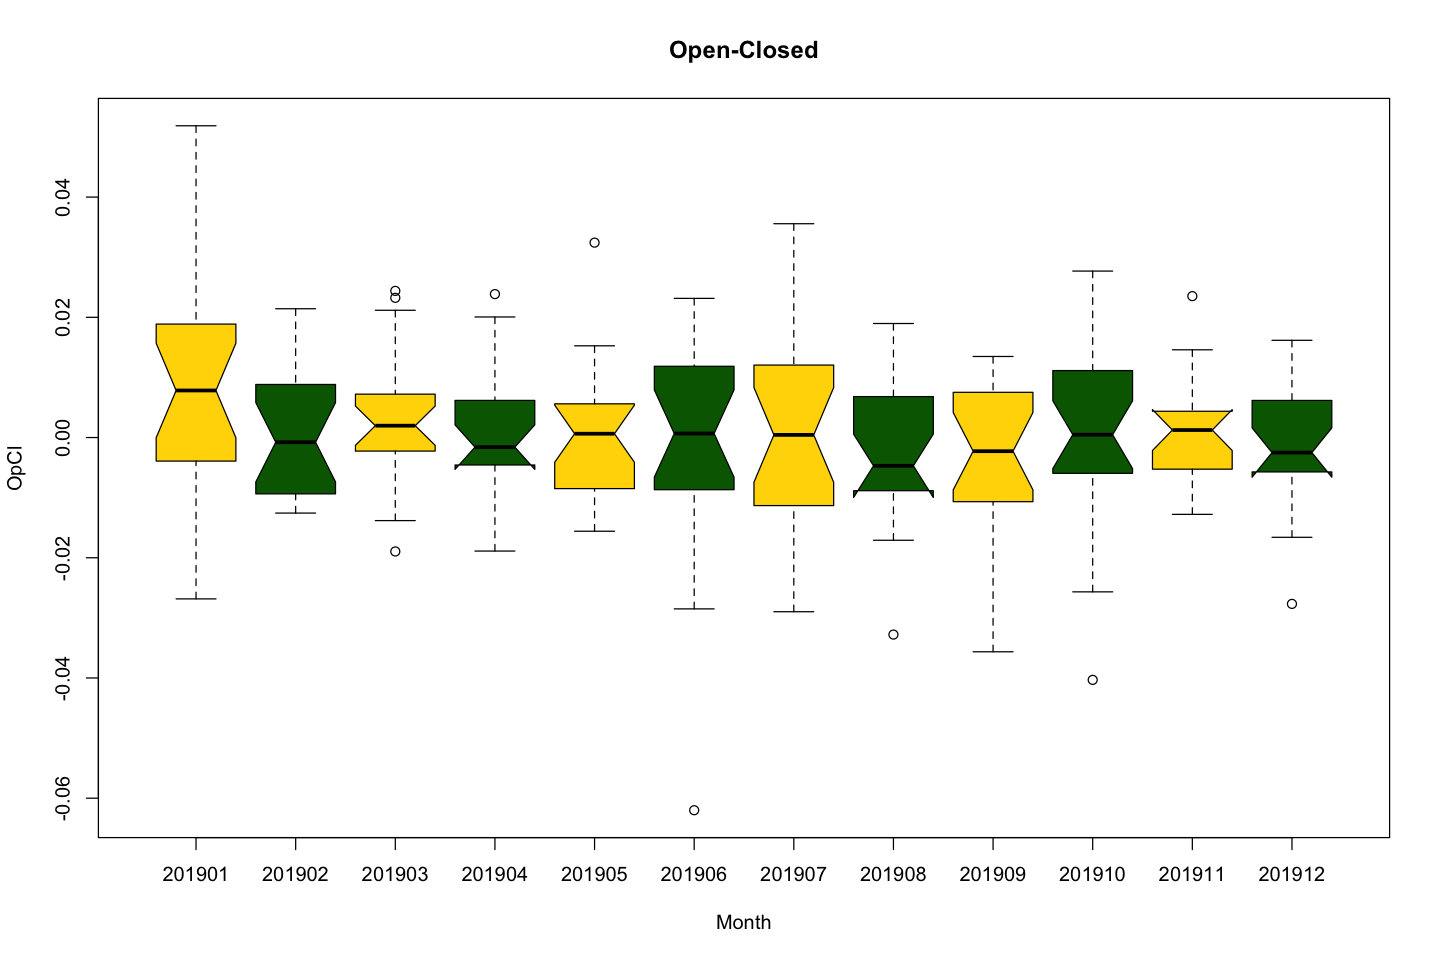

In [30]:
options(repr.plot.width = 12, repr.plot.height = 8)
df <- FB
df$OpCl <- OpCl(df)
df$OpOp <- OpOp(df) 
df$HiCl <- HiCl(df) 
df$month <- format(index(df),"%Y%m")
df$year <- format(index(df),"%Y")
df_hiCl <- df[df$year==2019,]
boxplot(HiCl~month, data=df_hiCl, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Hi-Closed", xlab="Month")

boxplot(OpCl~month, data=df_hiCl, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Open-Closed", xlab="Month")

#### Observation:

The above Box Plots is extremely useful to find the abnormal values or anomalies, which will help discover malpractices as such insider trading, etc. 

The dots indicates the outliers, or extreme changes for that month.

### 8. Price and Volume of FB stocks traded for last 3 months

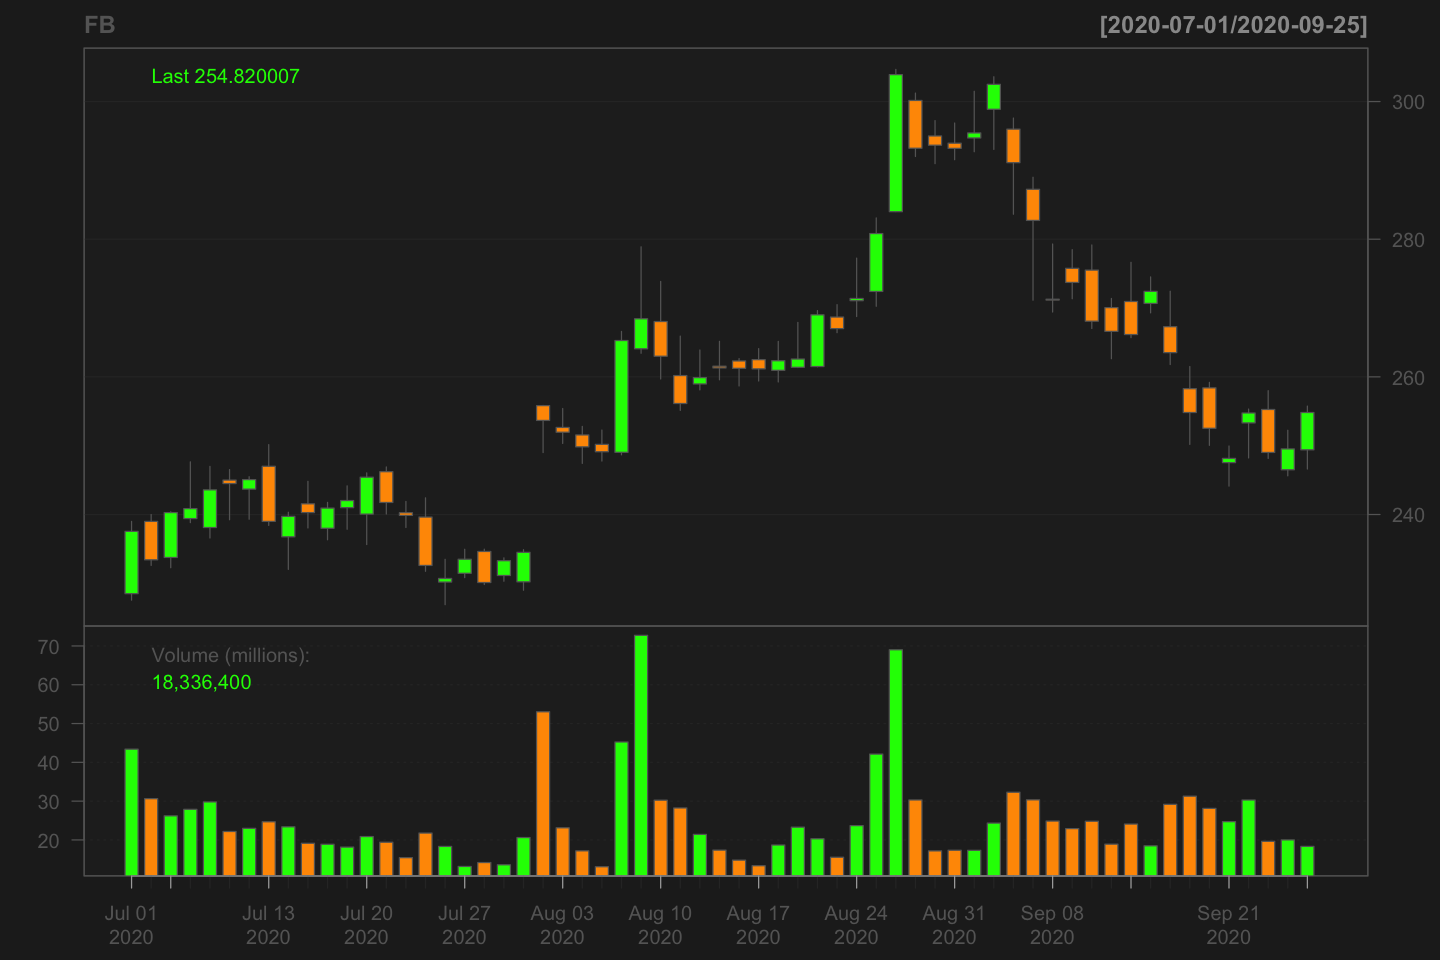

In [31]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "last 3 months")

#### Observation:
Over the past 3 months, the stock price has shown an increasing trend. 

FB had a very high stock price August 2020, and then dropped significantly. The high price also resulted in a high volume of stocks traded. 

### 9. Price and Volume of FB stocks traded for past 1 year, Covid-19 downfall

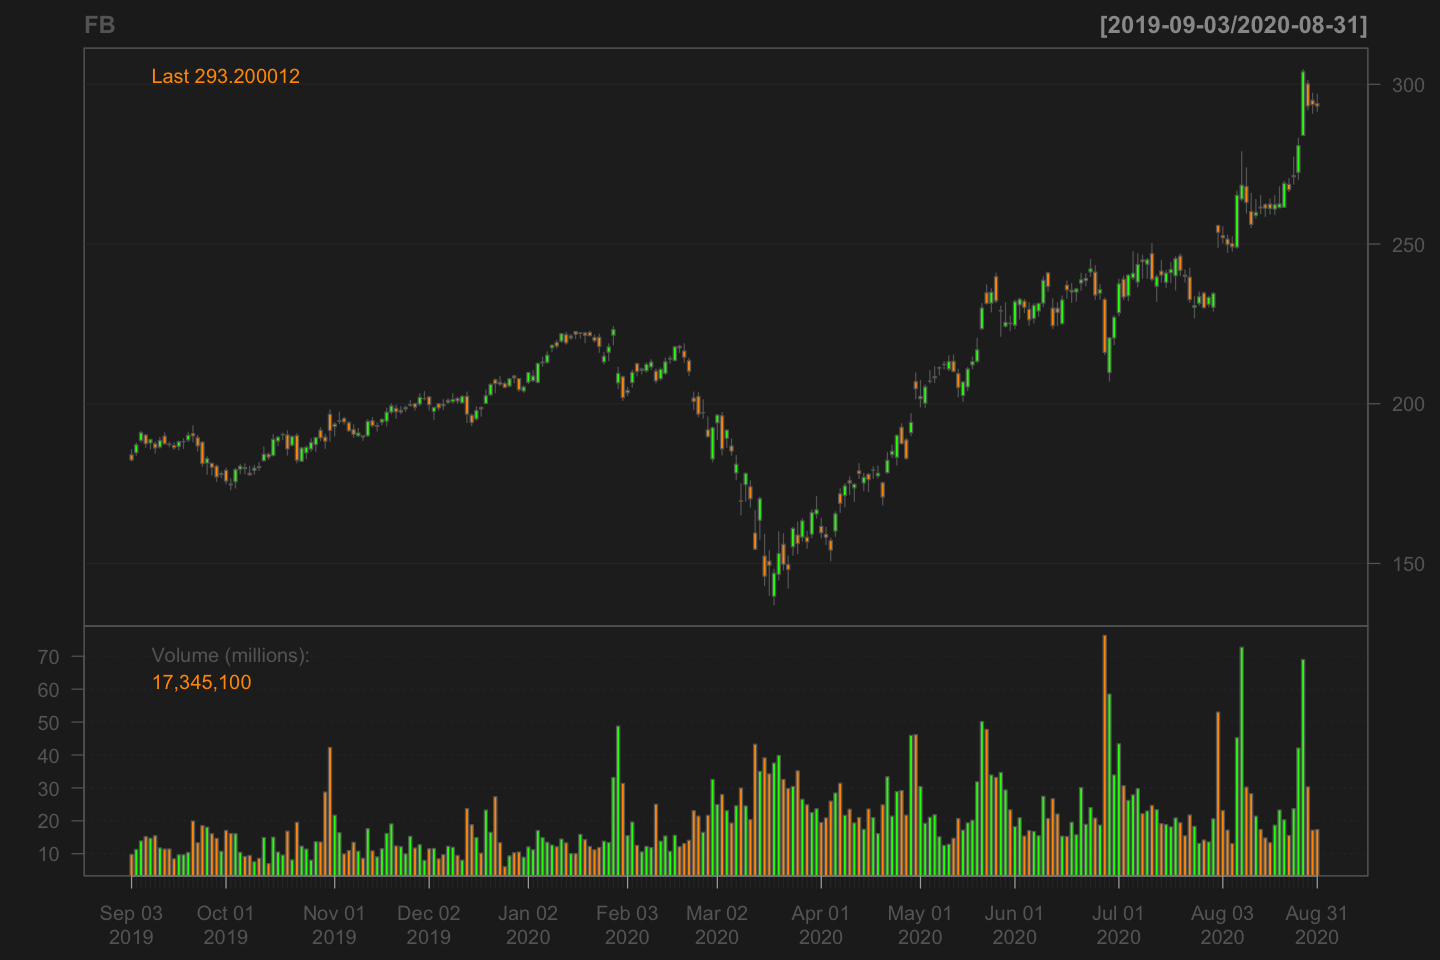

In [32]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "2019-09::2020-08")

#### Observation:
Over the past 1 year, the stock price has shown an increasing trend, though during March-April 2020, the stock prices fell significantly, because of the Covid-19 pandemic. However, after April 2020, the prices have been rising again.

FB had a very low stock price during April 2020, and that is when the volume of trade was  extremely high. It has been more or less rising since then. 

### 10. Price and Volume of FB stocks traded for past 1 year, Covid-19 downfall

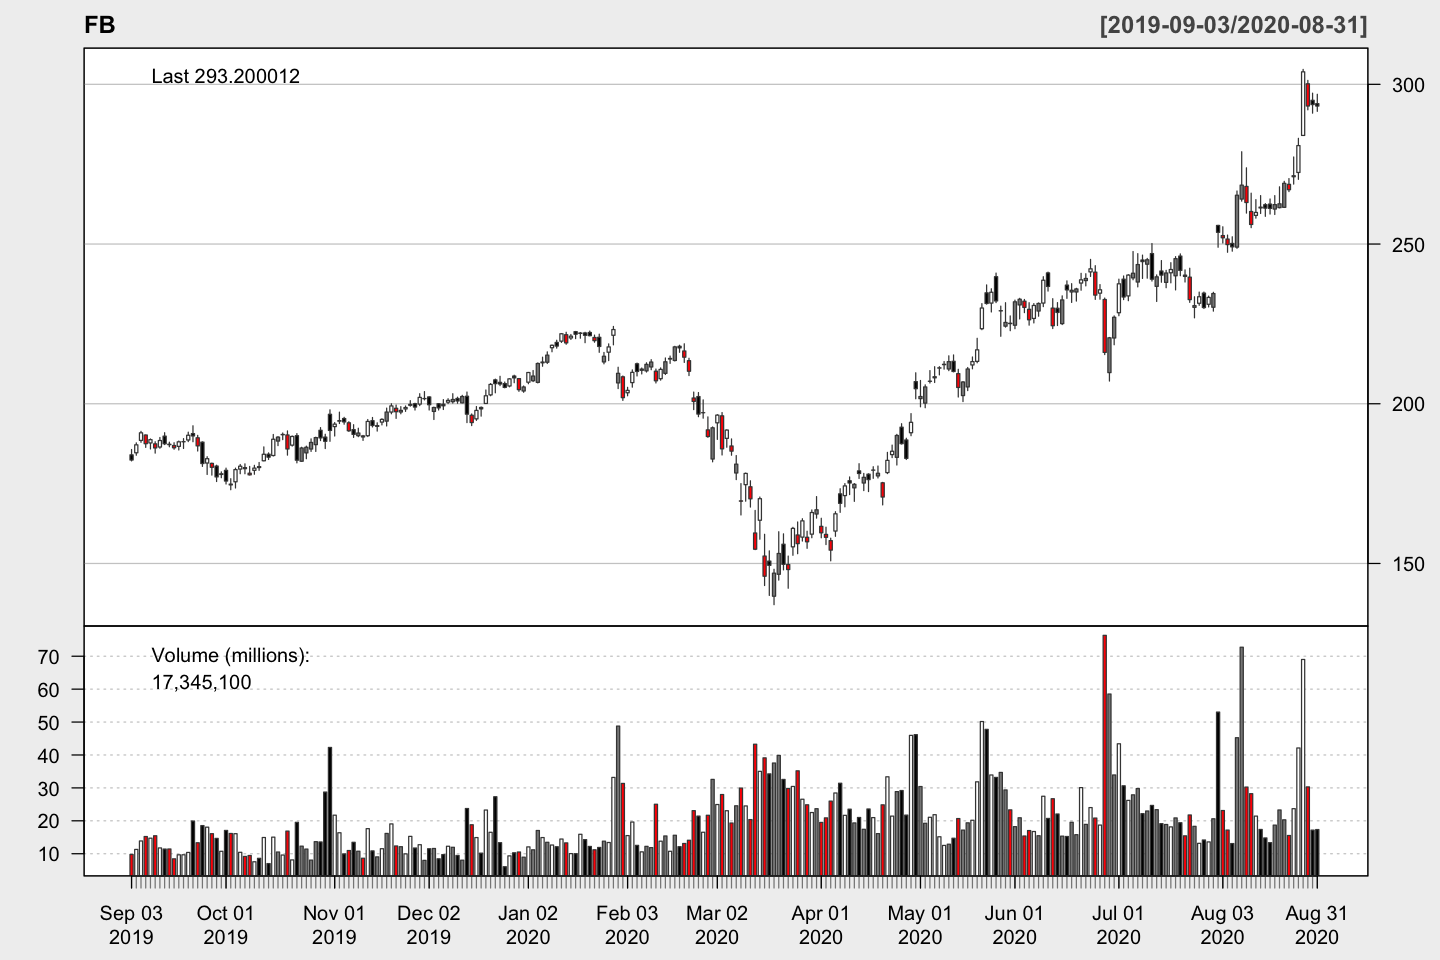

In [33]:
options(repr.plot.width = 12, repr.plot.height = 8)
candleChart(FB,subset = "2019-09::2020-08",multi.col=TRUE, theme='white')

#### Observation:
Over the past 1 year, the stock price has shown an increasing trend, though during March-April 2020, the stock prices fell significantly, because of the Covid-19 pandemic. However, after April 2020, the prices have been rising again.

FB had a very low stock price during April 2020, and that is when the volume of trade was  extremely high. It has been more or less rising since then. 

### 11. Price and Volume of FB stocks traded since 2007 till date

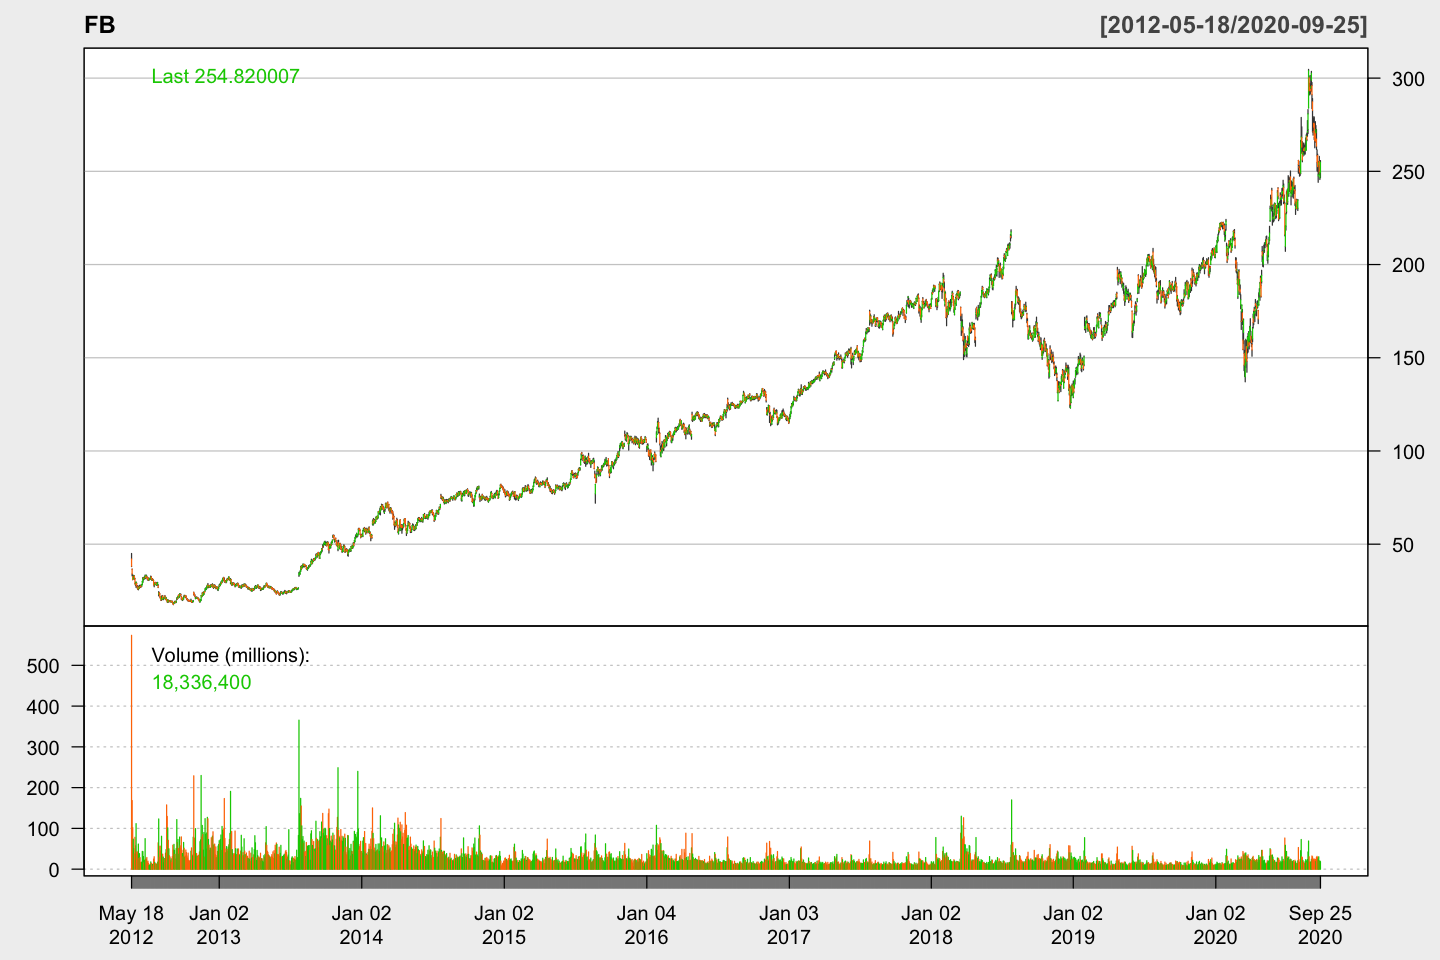

In [34]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, theme = chartTheme("white"))

#### Observation:
Over the past 8 years, the stock price has shown an increasing trend, though it had some dips during 2019 and 2020, where the stock prices fell significantly.

The volume has also been more or less consitent, except for 2013, where we see a major spike in the volume of traded stocks. There were also small spikes during 2019.

### 12. Price and Volume of FB stocks for past 2 years, also added Bollinger Bands

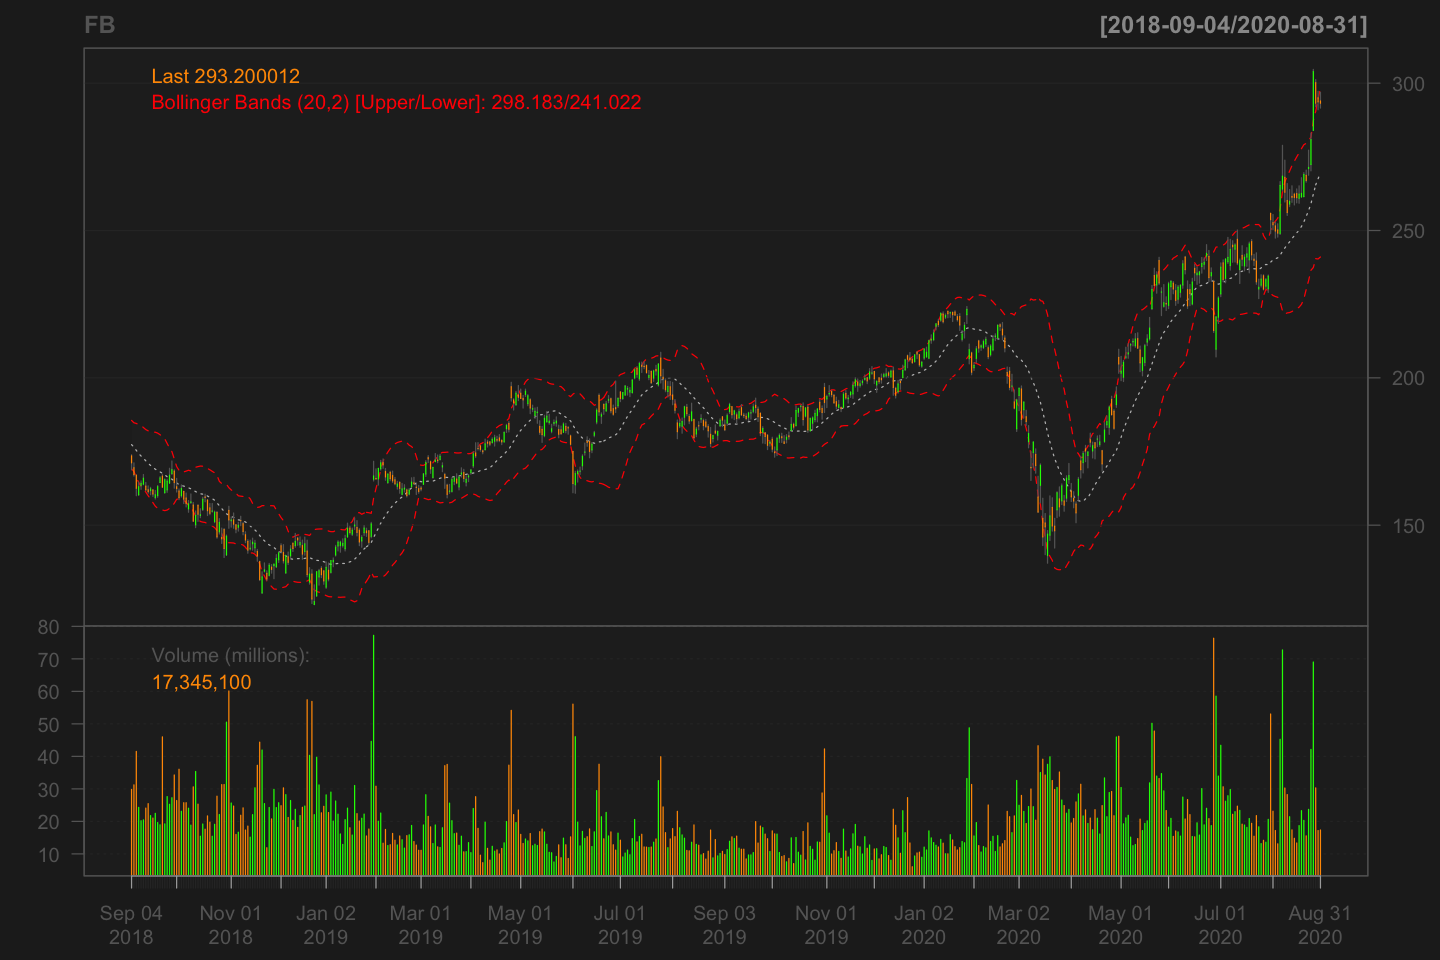

In [35]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "2018-09::2020-08", TA = c(addVo(), addBBands()))  #add volume and Bollinger Bands from TTR

#### Observation:
Over the past 2 years, the stock price has shown an increasing trend, though it had a huge dip during April 2020, where the stock prices fell significantly due to the Covid-19 pandemic. Prices have been rising ever since. There was also a small dip in December 2018.

The volume has also been more or less consitent, except for April 2020, where we see a major spike in the volume of traded stocks. Therer were also small spikes during late 2018.

Further, we have added the lower and upper Bollinger bands, which here show that the stock prices were more less within very less deviation from the bands, except for the Covid-19 period, where there were huge deviations.

### 13. Price and fast and slow Moving Averages for FB stocks for past 1 year

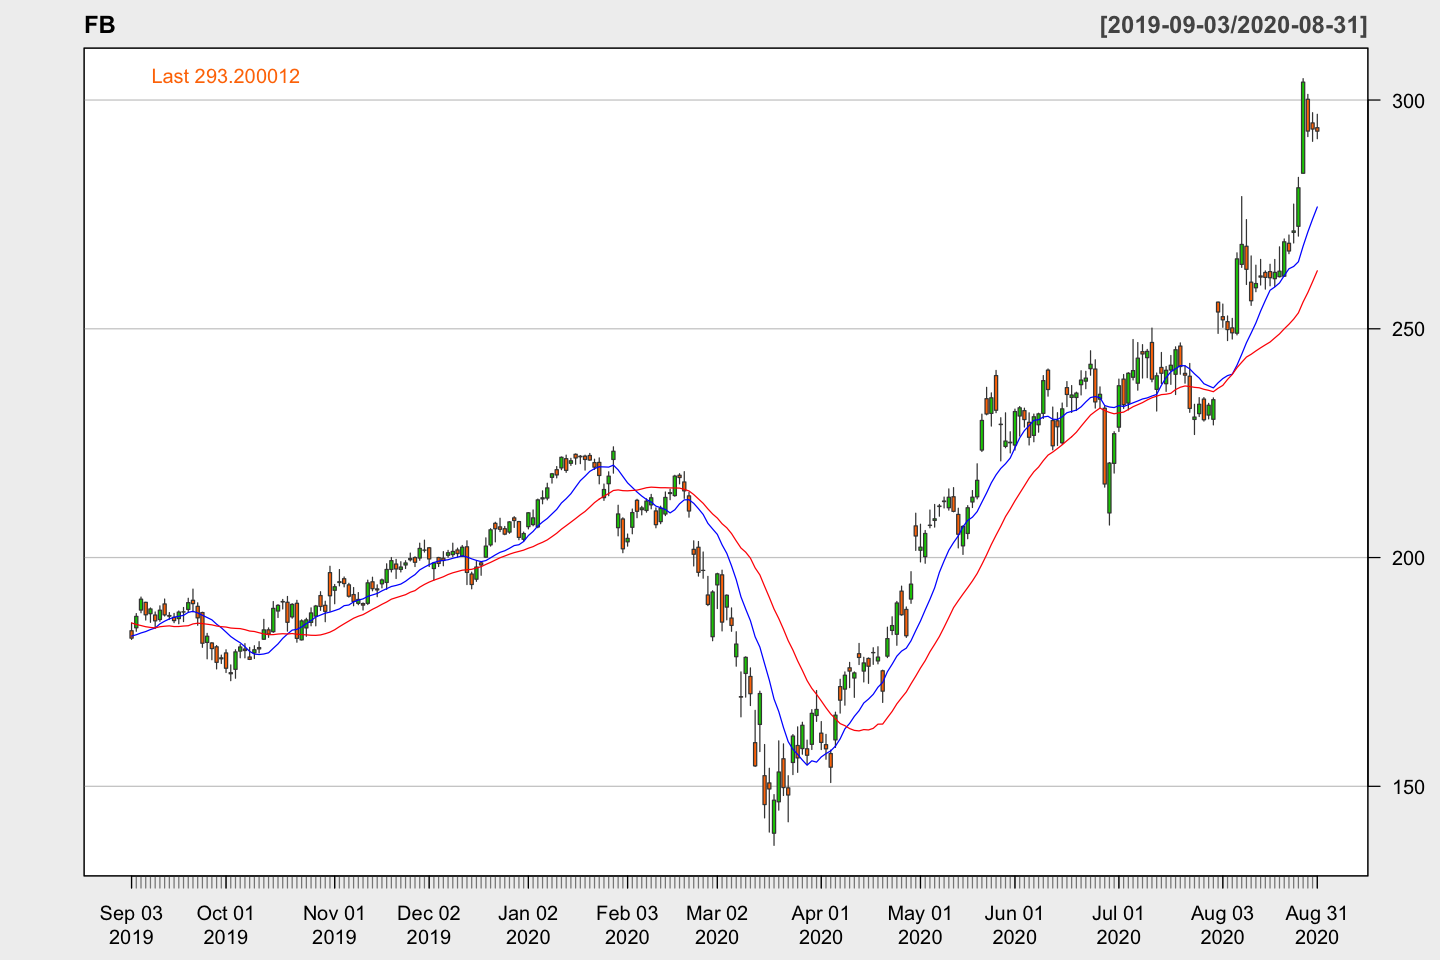

In [36]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "2019-09::2020-08",bar.type='hlc', 
            TA = c(addSMA(n=12,col="blue"),addSMA(n=26,col="red")),
            theme = chartTheme("white"))  

#### Observation:
Over the past 1 year, the stock price has more or less remained above the fast and slow moving averages. Except for April 2020, where the stock prices fell significantly due to the Covid-19 pandemic.

Also, the two moving averages intersect at various points, in which case they make the MACD = 0. They indicate that for those specific points, there is no difference between the stock prices as per the two different averages.

### 14. Price, moving averages, MACD and RSI for FB stocks for past 1 year

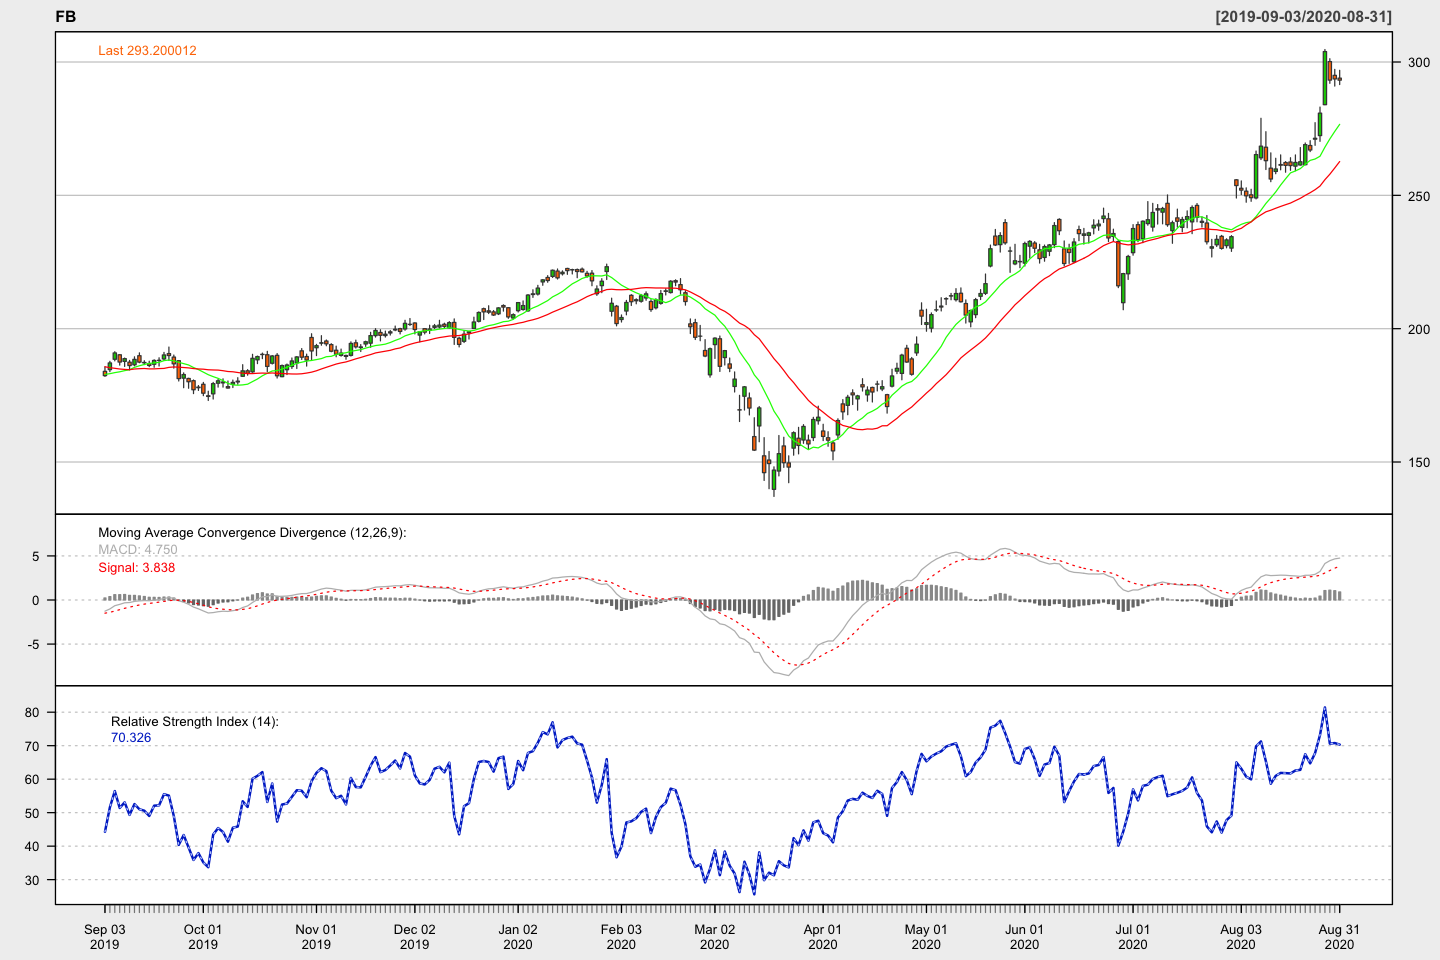

In [37]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "2019-09::2020-08",bar.type='hlc', 
            TA = c(addSMA(n=12,col="green"),addSMA(n=26,col="red"),
                addMACD(),addRSI()),
            theme = chartTheme("white"))  

#### Observation:
Over the past 1 year, the MACD and the RSI have more or less remained consistent, except for April 2020, where the stock prices fell significantly due to the Covid-19 pandemic.

Also, we see that when the two moving averages intersect at varius points, they make the MACD = 0.

### 15. Price, volume, bollinger bands, and CCI of FB stocks for past 1 year

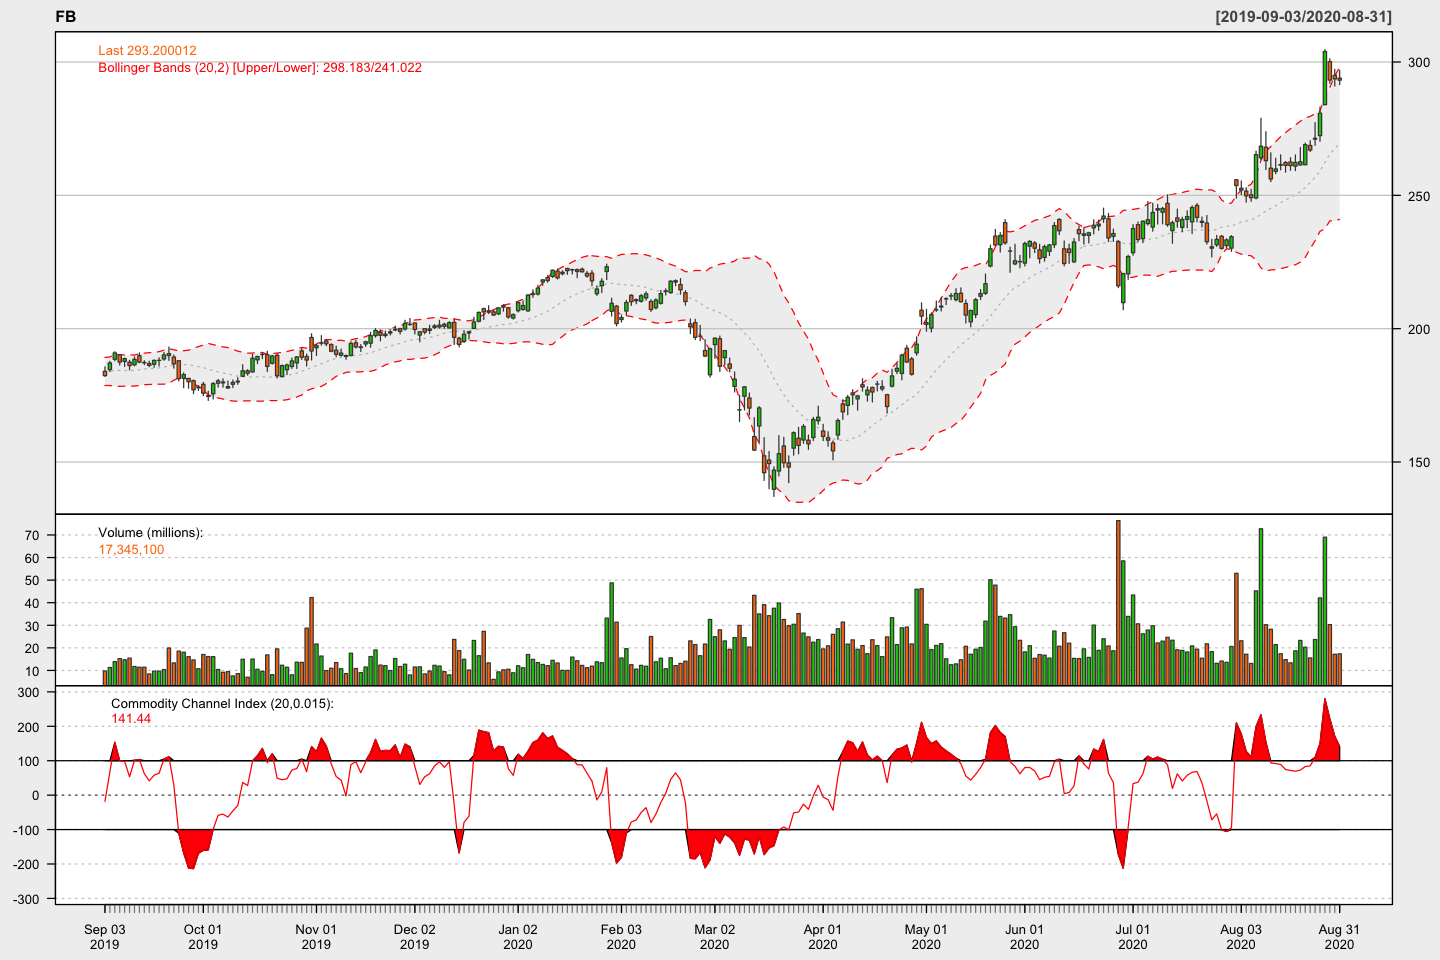

In [38]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "2019-09::2020-08",theme="white",  TA="addVo();addBBands();addCCI()") 

#### Observation:
Over the past 1 year, CCI fell largely for March-April 2020, where the stock prices fell significantly due to the Covid-19 pandemic. Also, CCI has reacted more than other indicators for FB stocks. There are several dips.

### 16. Price, volume, bollinger bands, CCI, and Open-Close of FB stocks for past 1 year

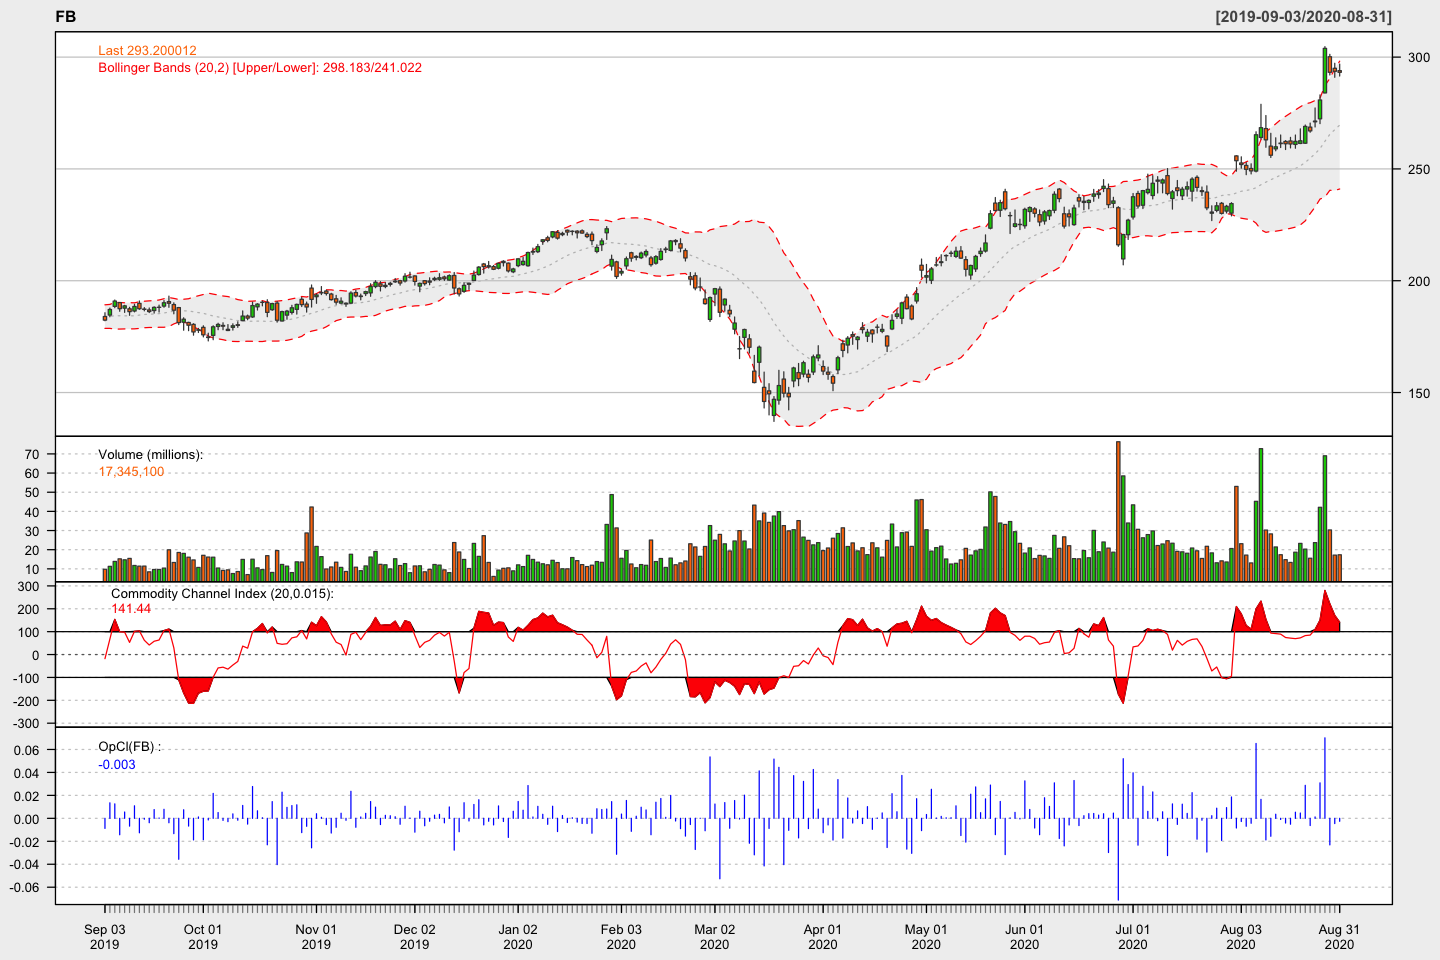

In [39]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(FB, subset = "2019-09::2020-08",
            theme="white",  
            TA="addVo();addBBands();addCCI(); 
                addTA(OpCl(FB),col='blue', type='h')  ")

#### Observation:
Over the past 1 year, Open-Close was more or less moving in a consistend trend, but the Open-Close differed a lot, during the due to the Covid-19 pandemic.

## -----------------------------------------------------------------

## Stock 3: `AAPL` - Apple Inc.

### Common stock data transformation:

### 1. Returns from Open to Close, Open to Open, High to Close, or Close to Close

In [40]:
df = AAPL
df2 <- df

df2$OpCl <- OpCl(df2)
df2$OpOp <- OpOp(df2) 
df2$HiCl <- HiCl(df2) 
df2$ClCl <- ClCl(df2) 

df2$pcntOpCl1 <- Delt(Op(df2),Cl(df2),k=1)
df2$pcntOpCl2 <- Delt(Op(df2),Cl(df2),k=2)
df2$pcntOpCl3 <- Delt(Op(df2),Cl(df2),k=3)

#One period lag of the close 
df2$lagCl <- Lag(Cl(df2)) 
df2$lag2Cl <- Lag(Cl(df2),2)  
df2$lag3Cl <- Lag(Cl(df2),3) 

# Move up the OpCl by one period
df2$nextOpCl <- Next(OpCl(df2)) 

head(df2,3)

AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
[1,] 3.081786  3.092143  2.925000 2.992857   1238319600  2.586245     
[2,] 3.001786  3.069643  2.993572 3.059286    847260400  2.643649     
[3,] 3.063214  3.078571  3.014286 3.037500    834741600  2.624823     
     OpCl         OpOp        HiCl         ClCl         pcntOpCl1   
[1,] -0.028856319          NA -0.032109123           NA           NA
[2,]  0.019155263 -0.02595897 -0.003374008  0.022195848 -0.007300961
[3,] -0.008394451  0.02046382 -0.013340930 -0.007121269  0.011897584
     pcntOpCl2   pcntOpCl3 lagCl    lag2Cl   lag3Cl nextOpCl    
[1,]          NA NA              NA       NA NA      0.019155263
[2,]          NA NA        2.992857       NA NA     -0.008394451
[3,] -0.01437024 NA        3.059286 2.992857 NA     -0.005700326

### 2. Convert the stock data to monthly

Often we need to reduce the daily stock records to weekly or monthly stock records. The irregularities in a calendar, such as holidays, leap year, or months of the year, may drive our programming crazy.

In [41]:
df.monthly <- to.monthly(df)
df.monthly$month <- format(index(df.monthly),"%Y%m")
df.monthly$year <- format(index(df.monthly),"%Y")
head(df.monthly, 3)

          df.Open  df.High   df.Low df.Close   df.Volume df.Adjusted  month
Jan 2007 3.081786 3.492857 2.925000 3.061786 27209781200    2.645809 200701
Feb 2007 3.079643 3.243214 2.959286 3.021786 13722354800    2.611244 200702
Mar 2007 3.001071 3.458214 2.991071 3.318214 15918644000    2.867399 200703
         year
Jan 2007 2007
Feb 2007 2007
Mar 2007 2007

### 3. Calculate daily, weekly, and monthly return on stocks

In [42]:
rtn.daily <- dailyReturn(df) # returns by day 
rtn.weekly <- weeklyReturn(df) # returns by week 
rtn.monthly <- monthlyReturn(df) # returns by month, indexed by yearmon 
# daily,weekly,monthly,quarterly, and yearly 
rtn.allperiods <- allReturns(df) # note the plural
head(rtn.daily, 3)
head(rtn.weekly, 2)
head(rtn.monthly, 2)

           daily.returns
2007-01-03  -0.028856319
2007-01-04   0.022195848
2007-01-05  -0.007121269

           weekly.returns
2007-01-05    -0.01437024
2007-01-12     0.11252214

           monthly.returns
2007-01-31    -0.006489743
2007-02-28    -0.013064270

### Exploratory Data Analysis:

### 4. The basic characteristics of stock returns - `Standard Deviation` and `Kurtosis`
- A standard normal distribution has 0 mean, 1 standard deviation, and 0 excess [kurtosis](http://www.r-tutor.com/elementary-statistics/numerical-measures/kurtosis) 
- The ditribution of a typical stock returns has small standard deviation and positive excess kurtosis

### Generate a standard general distribution to understand deviations and kurtosis.

[1] "standard deviation: 0.997889911809786"
[1] "Kurtosis: 0.02"


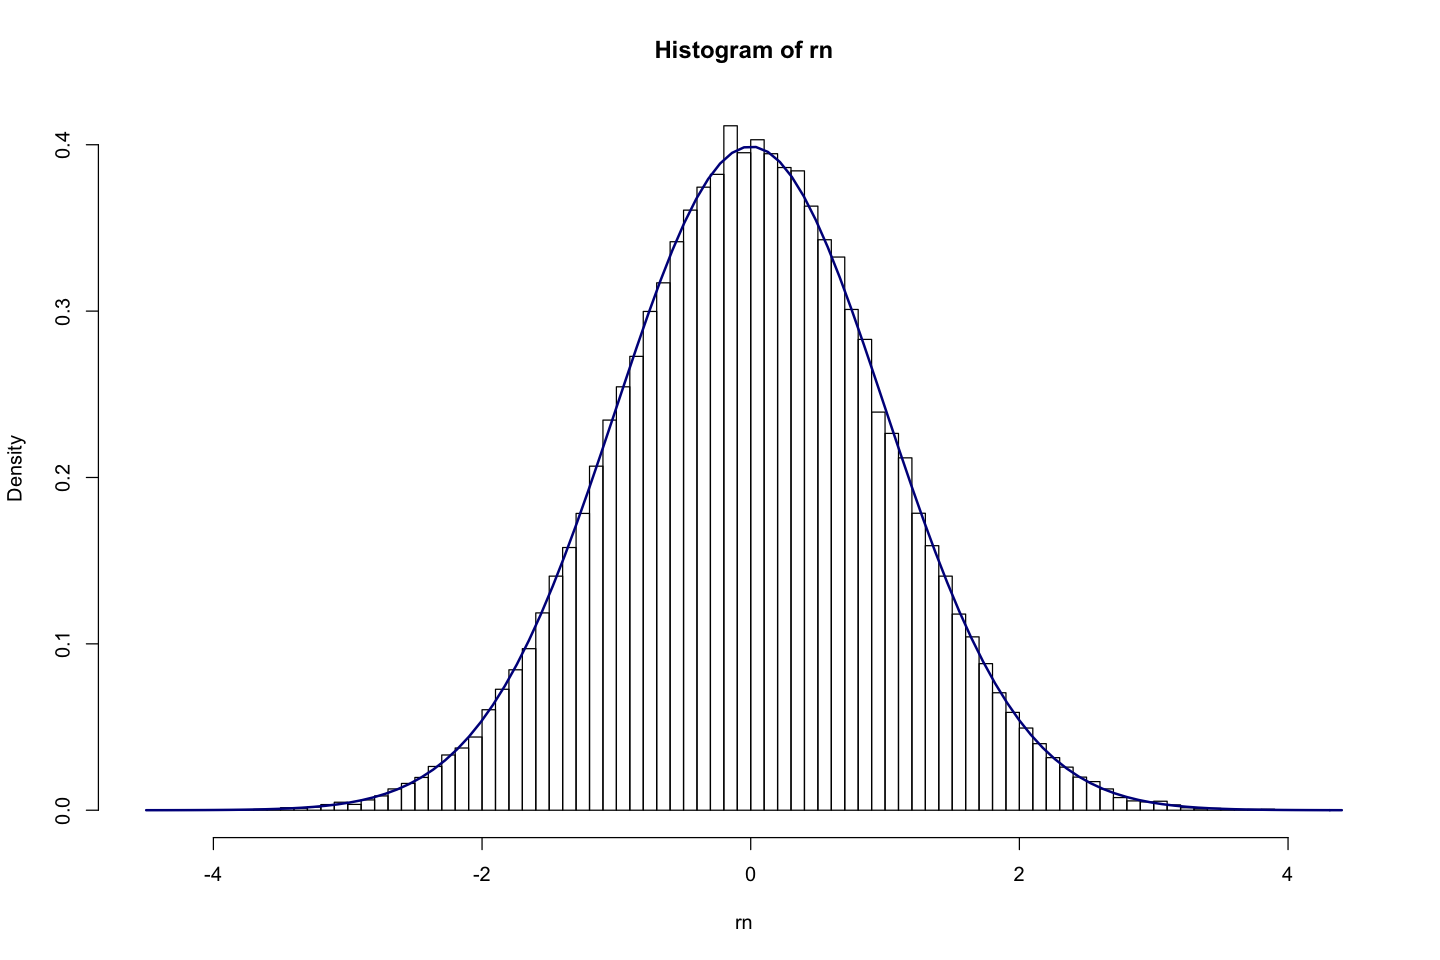

In [43]:
# Generate a standard normal distribution
rn <- rnorm(100000)
print(paste0("standard deviation: ", sd(rn)))
print(paste0("Kurtosis: ", round(kurtosis(rn),2)))
options(repr.plot.width = 12, repr.plot.height = 8)
hist(rn,breaks=100,prob=TRUE)
curve(dnorm(x, mean=0, sd=1), col="darkblue", lwd=2, add=TRUE ) # Overlay a standard normal distribution

### 5. Distribution, SD and Kurtosis of Daily Returns

[1] "standard deviation: 0.0204999282213127"
[1] "Kurtosis: 6.41"
[1] "Mean is as below:"


[1] 0.001250991

daily.returns
daily.returns 0.02049993

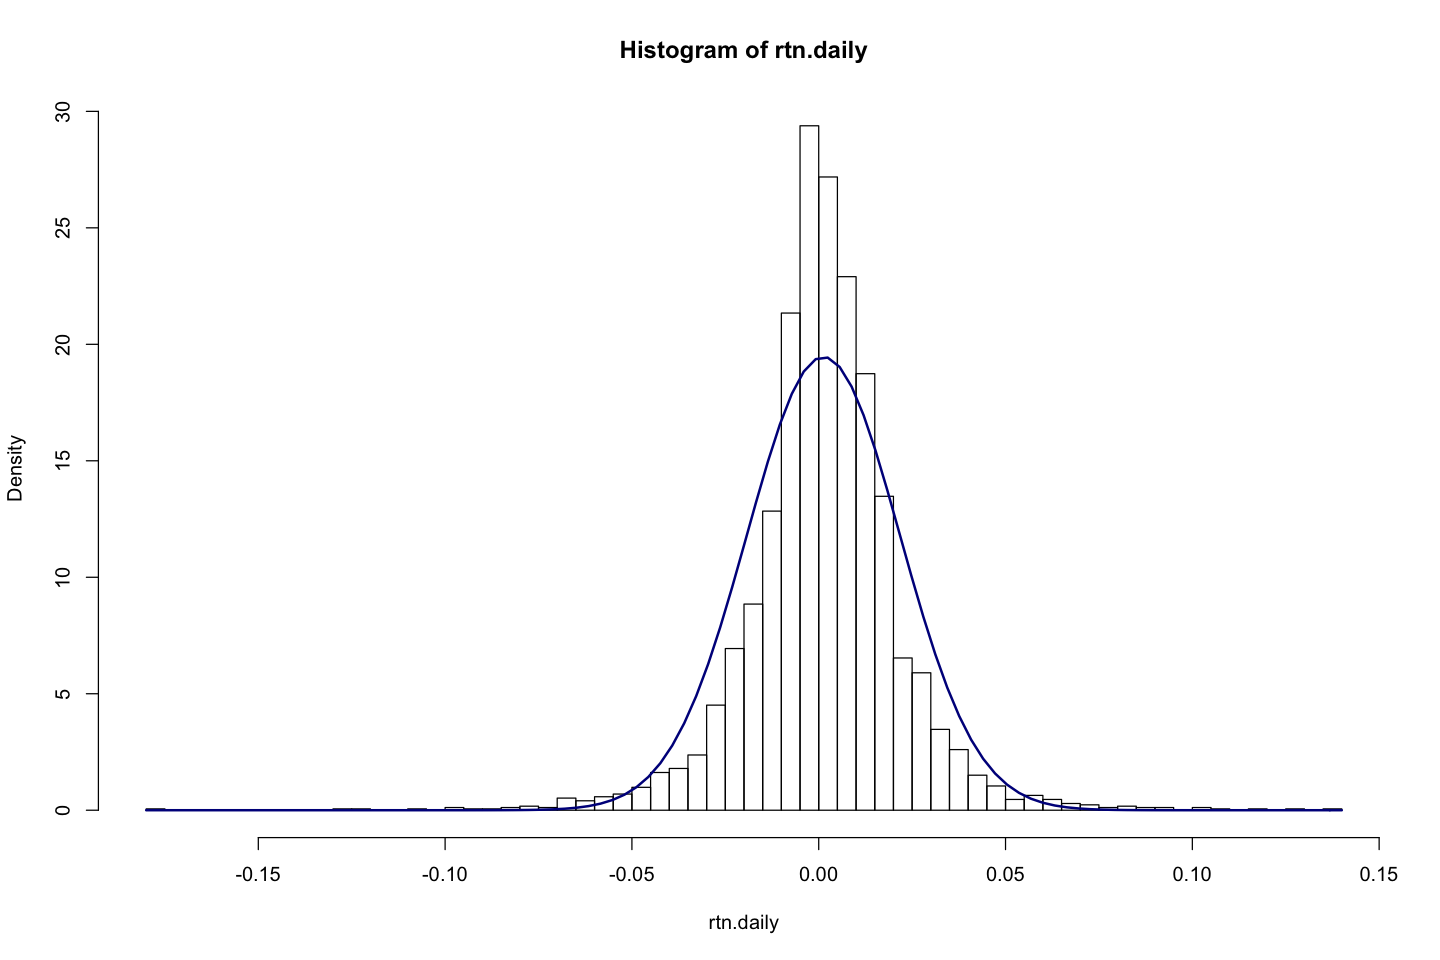

In [44]:
print(paste0("standard deviation: ", sd(rtn.daily)))
print(paste0("Kurtosis: ", round(kurtosis(rtn.daily),2)))

options(repr.plot.width = 12, repr.plot.height = 8)
hist(rtn.daily, breaks=100, prob=TRUE) # Make it a probability distribution

m<-mean(rtn.daily)
std<-sqrt(var(rtn.daily))
print("Mean is as below:")
m
std

# Overlay a standard normal distribution
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE )

#### Observation:

Here, I have displayed a standard distribution, which is the blue line, and the histogram bars represent the daily returns of SPGI, which is mpstly centered around 0.

Generally, distributions of daily stock returns are fat-tailed relative to the normal distribution we showed above.

The shape of the daily return distribution is more peaked than a symmetric, bell-shaped, standard normal distribution. It means that extreme events (a large price move) are more likely to happen than a standard normal curve, can go to more than 0.15 or less than -0.15

Here, there  is a high kurtosis, meaning that the distribution is highly fat-tailed, or may have lot of outlier values. Kurtosis is 6.41 times of a normal distribution.

### 6. Distribution and characteristics of Monthly Volume of AAPL for the year - 2019

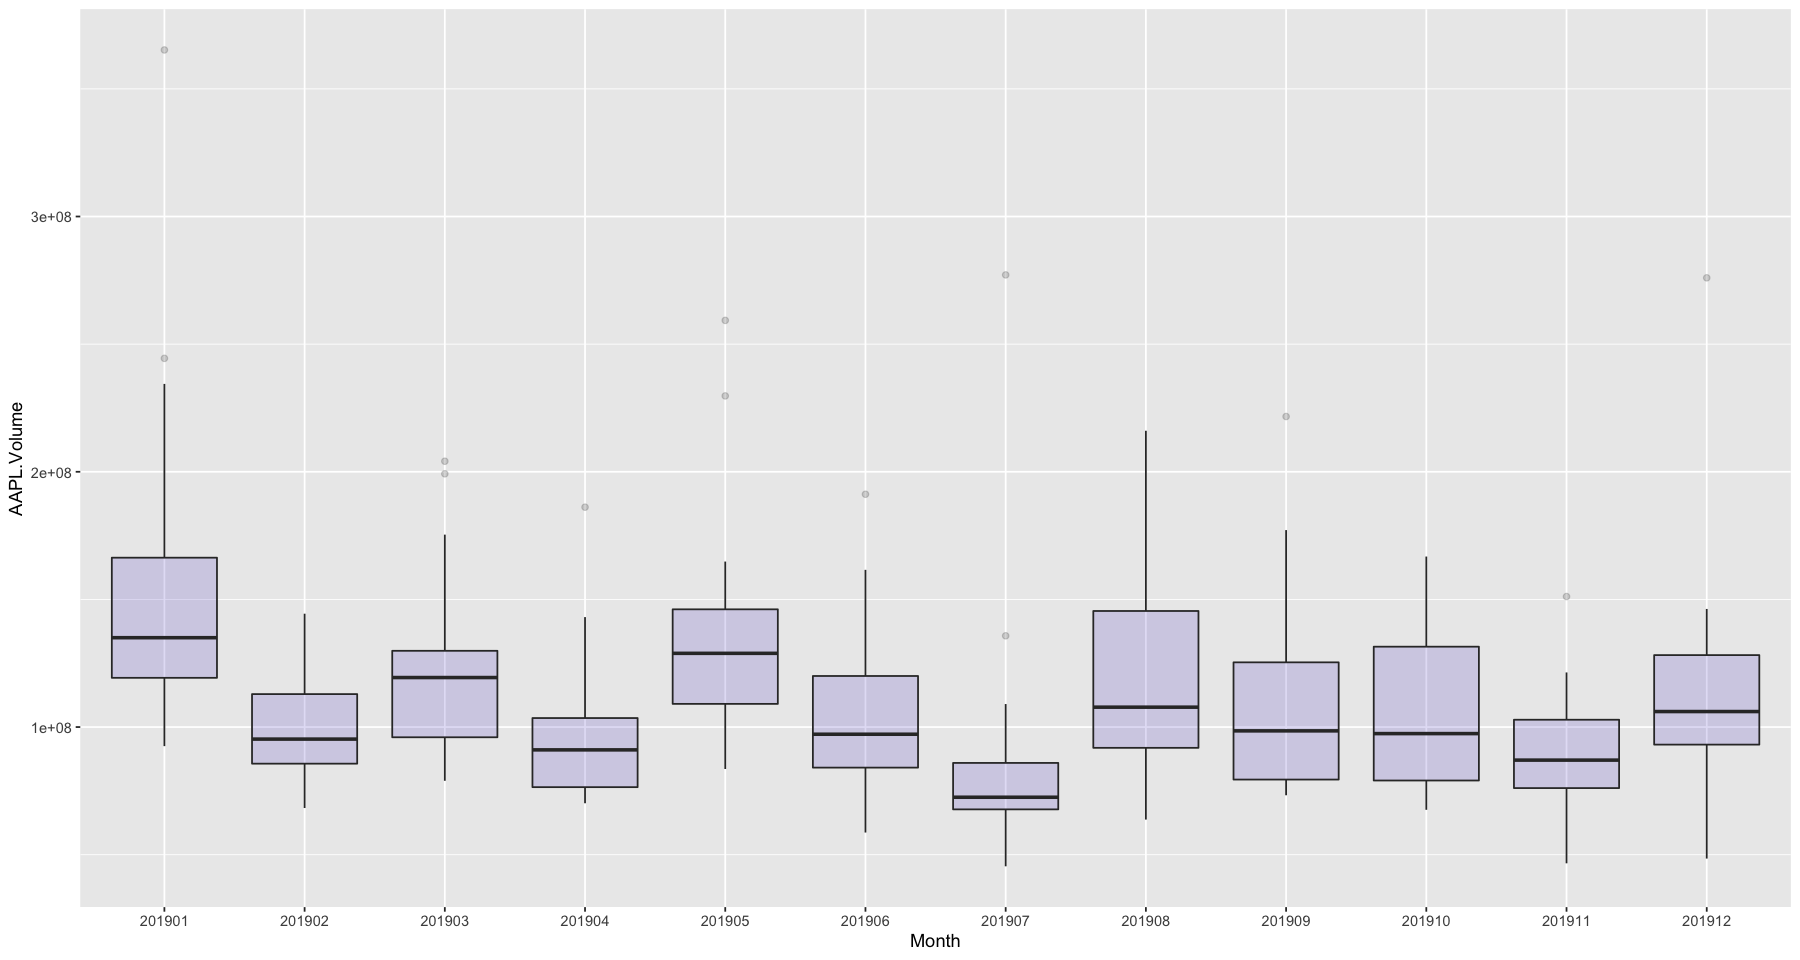

In [45]:
# A really basic boxplot.
df$year <- format(index(df),"%Y")
df$month <- format(index(df),"%Y%m")
df3 <- data.frame(df) %>% filter(year==2019)
df3$AAPL.Volume <- as.numeric(df3$AAPL.Volume)

options(repr.plot.width = 15, repr.plot.height = 8)

# Basic plot
p <-ggplot(df3, aes(x=as.factor(month), y=AAPL.Volume)) 

p + geom_boxplot(fill="slateblue", alpha=0.2) +  xlab("Month") 

#### Observation:
AAPL has very minor variations in terms of the monthly volume of its traded stocks

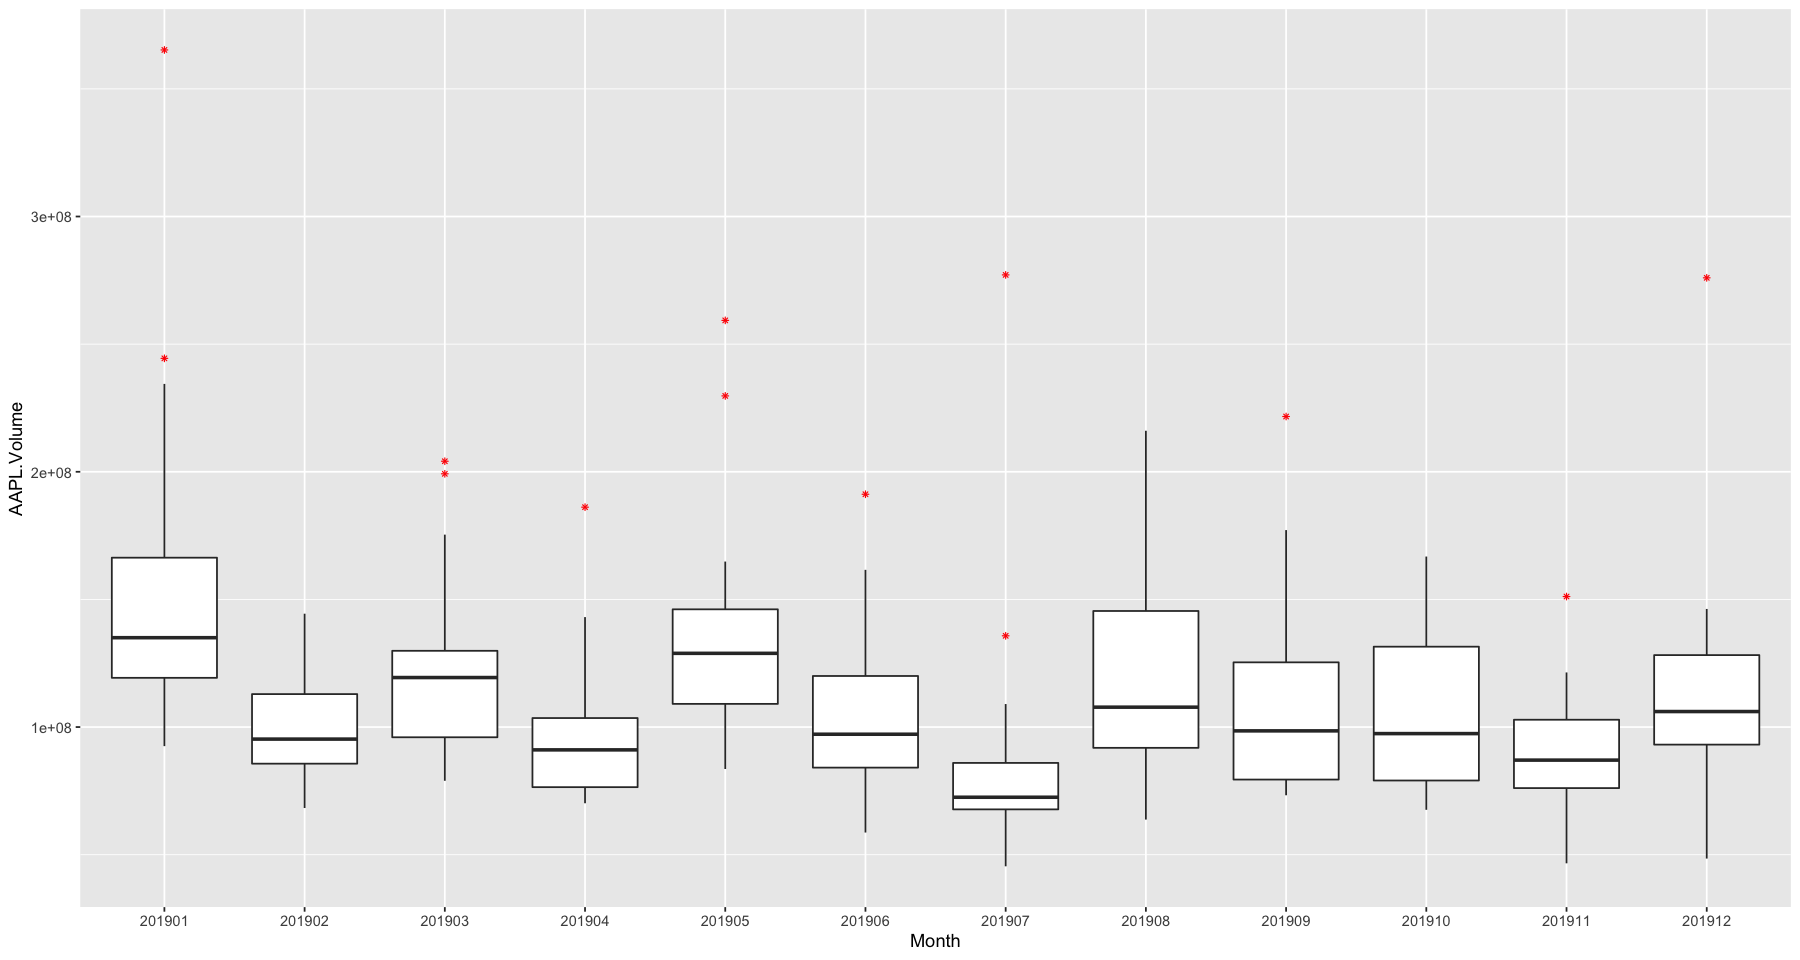

In [46]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Change outlier, color, shape and size
p2 <- p  + geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=1) +     xlab("Month")
p2

#### Observation:

The above Box Plot is extremely useful to find the abnormal values or anomalies, which will help discover malpractices as such insider trading, etc. 

The red dots indicates the outliers, or extreme changes for that month.

### 7. Distribution and characteristics of High-Close and Open-Close of AAPL for the year - 2019

Warning message in bxp(list(stats = structure(c(-0.0151479053254439, -0.0114169983149307, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”
Warning message in bxp(list(stats = structure(c(-0.0198836386450063, -0.00517823820250807, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


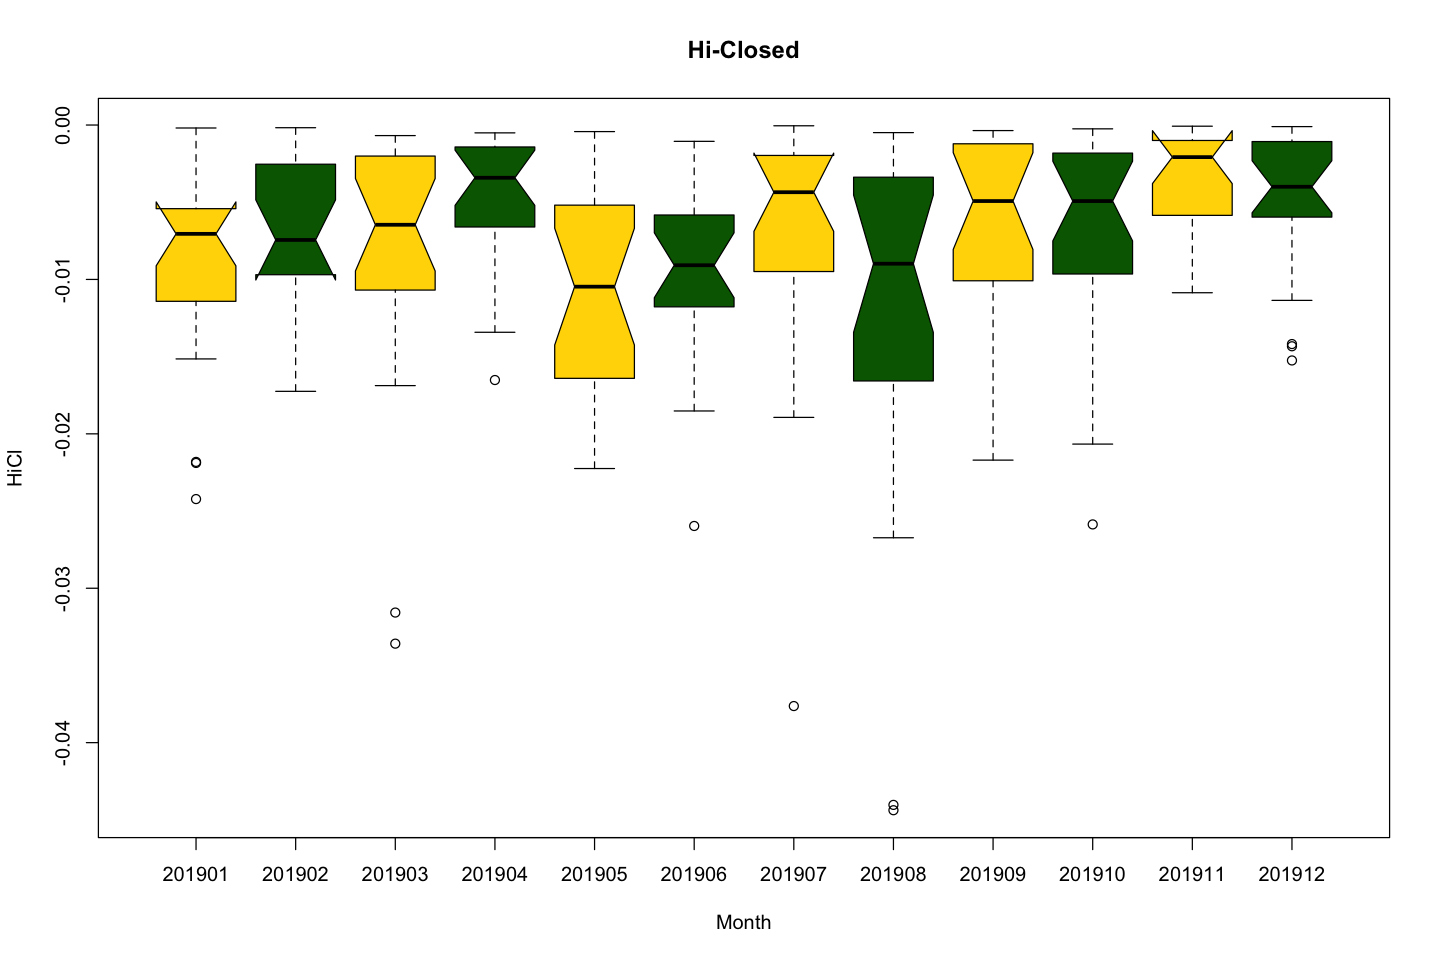

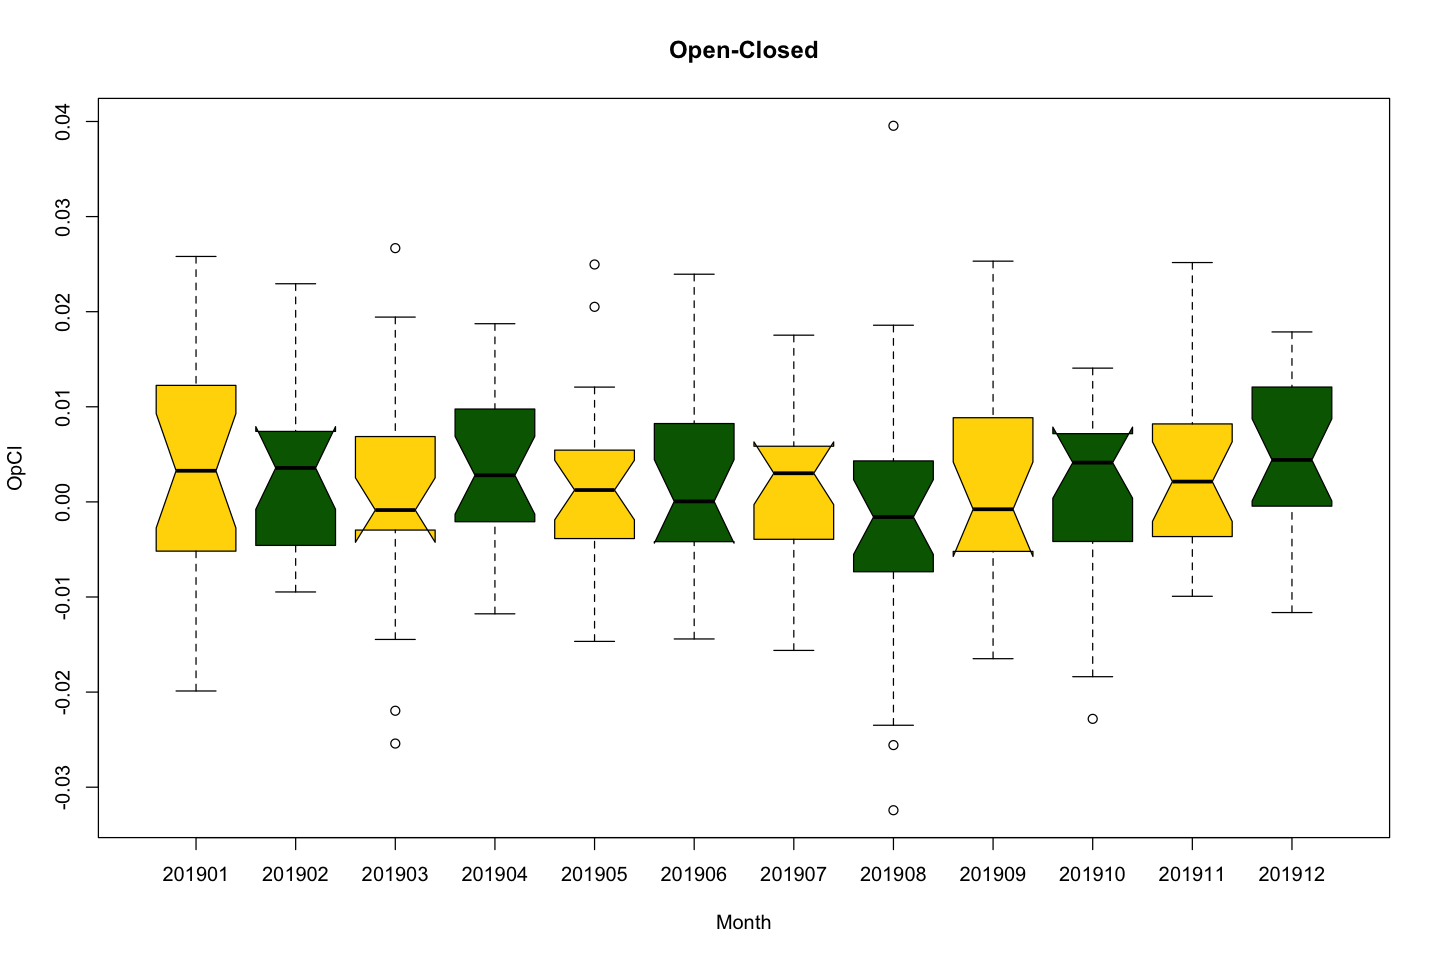

In [47]:
options(repr.plot.width = 12, repr.plot.height = 8)
df <- AAPL
df$OpCl <- OpCl(df)
df$OpOp <- OpOp(df) 
df$HiCl <- HiCl(df) 
df$month <- format(index(df),"%Y%m")
df$year <- format(index(df),"%Y")
df_hiCl <- df[df$year==2019,]
boxplot(HiCl~month, data=df_hiCl, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Hi-Closed", xlab="Month")

boxplot(OpCl~month, data=df_hiCl, notch=TRUE, 
  col=(c("gold","darkgreen")),
  main="Open-Closed", xlab="Month")

#### Observation:

The above Box Plots is extremely useful to find the abnormal values or anomalies, which will help discover malpractices as such insider trading, etc. 

The dots indicates the outliers, or extreme changes for that month.

### 8. Price and Volume of AAPL stocks traded for last 3 months

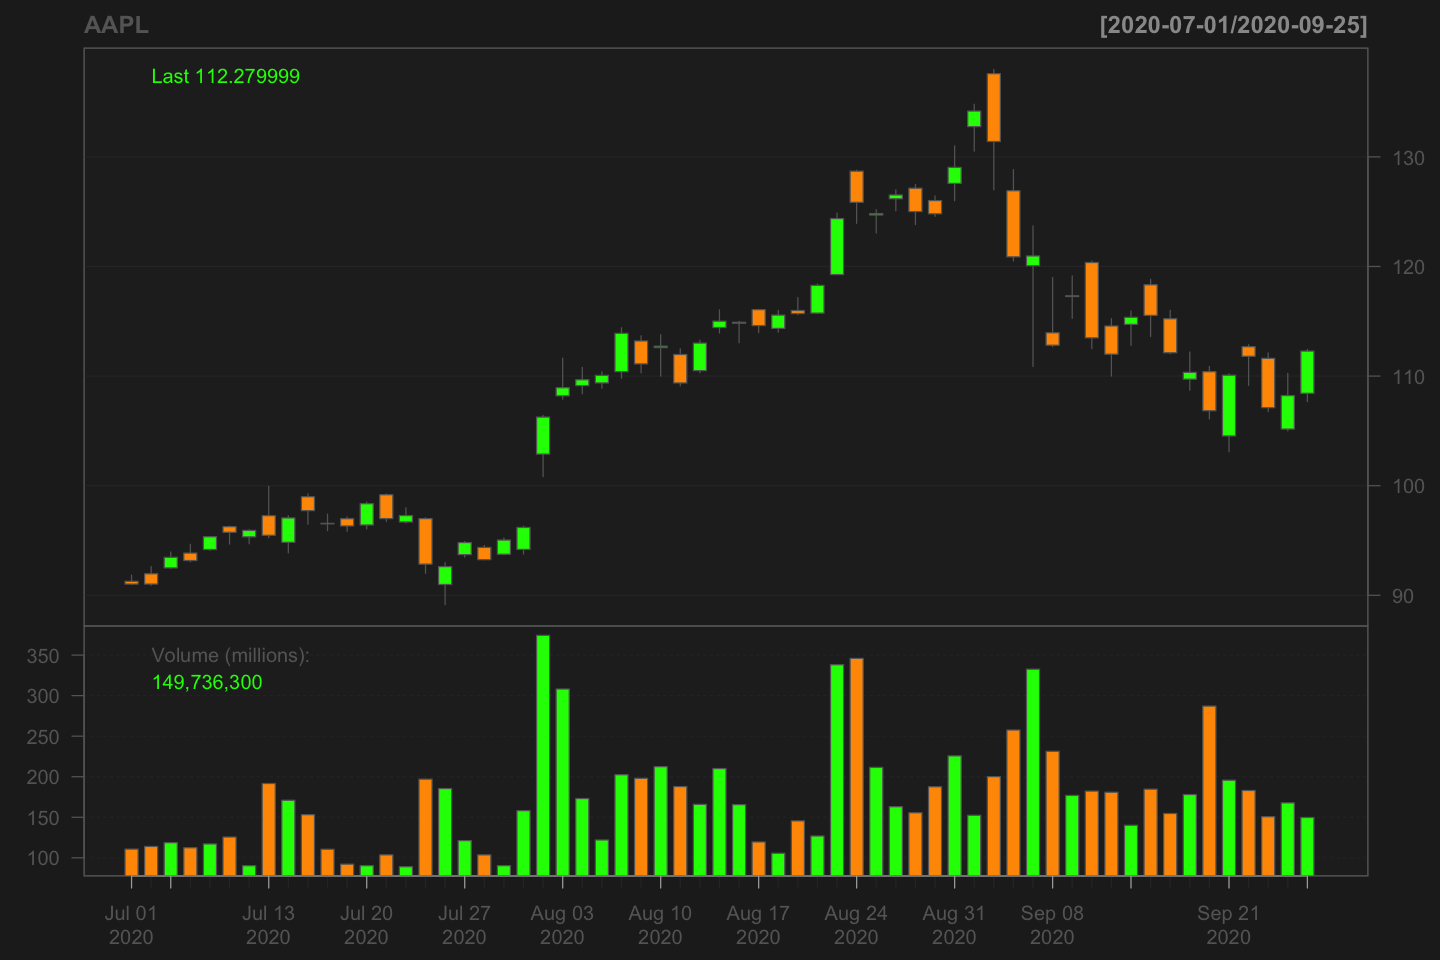

In [48]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "last 3 months")

#### Observation:
Over the past 3 months, the stock price has shown an increasing trend. 

SPGI had a very high stock price August 2020, and then dropped significantly. The high price also resulted in a high volume of stocks traded. 

### 9. Price and Volume of AAPL stocks traded for past 1 year, Covid-19 downfall

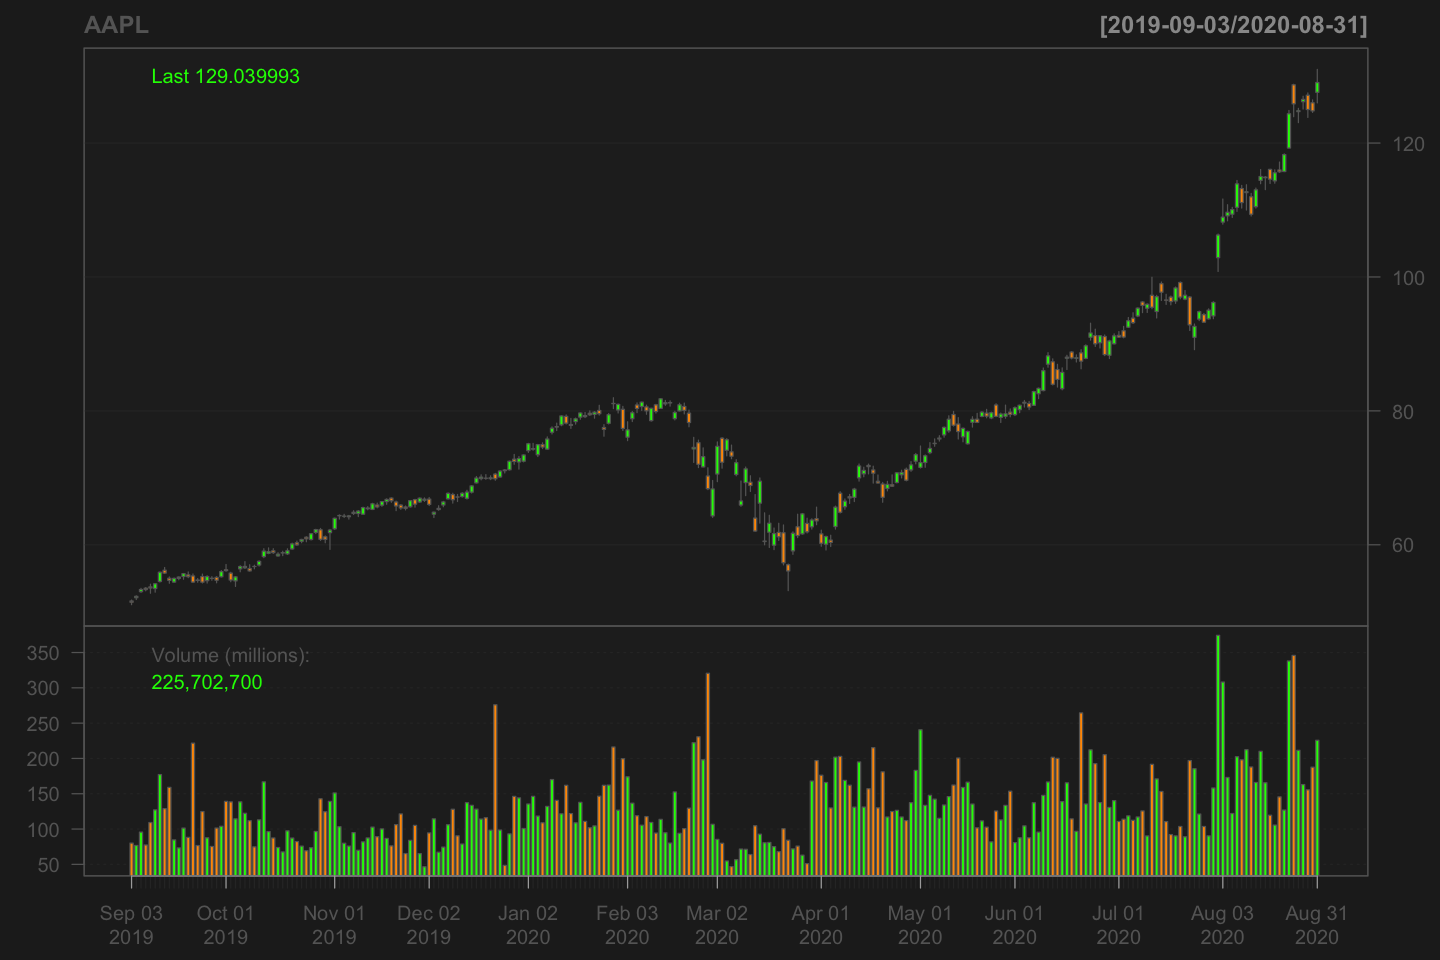

In [49]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "2019-09::2020-08")

#### Observation:
Over the past 1 year, the stock price has shown an increasing trend, though during March-April 2020, the stock prices fell significantly, because of the Covid-19 pandemic. However, after April 2020, the prices have been rising again.

AAPL had a very low stock price during April 2020, and that is when the volume of trade was very low. It has been more or less rising since then. 

### 10. Price and Volume of AAPL stocks traded for past 1 year, Covid-19 downfall

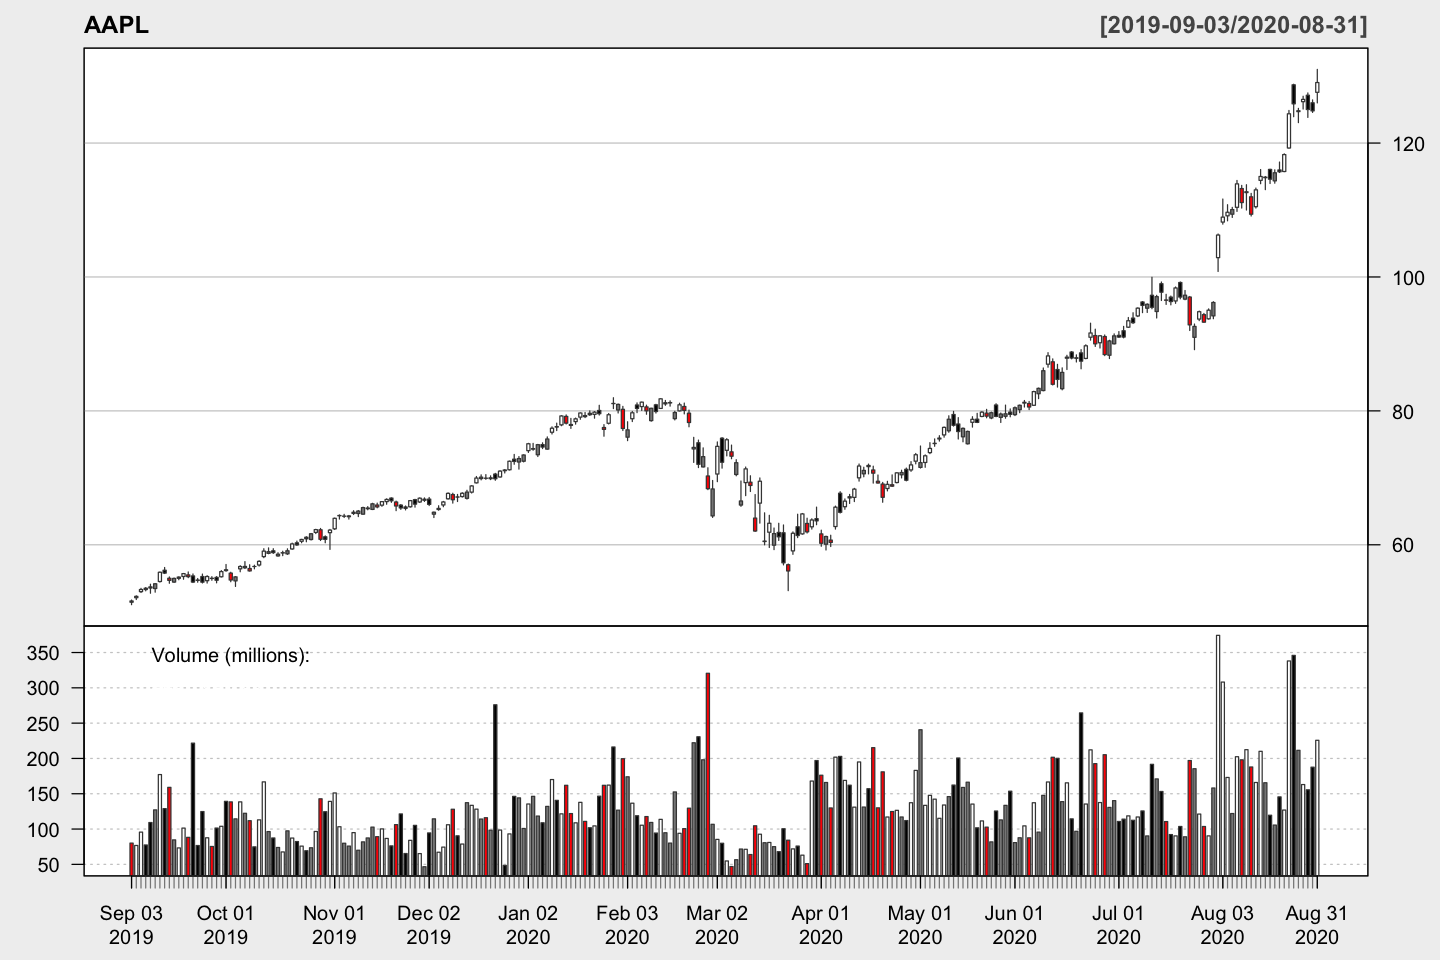

In [50]:
options(repr.plot.width = 12, repr.plot.height = 8)
candleChart(AAPL,subset = "2019-09::2020-08",multi.col=TRUE, theme='white')

#### Observation:
Over the past 1 year, the stock price has shown an increasing trend, though during March-April 2020, the stock prices fell significantly, because of the Covid-19 pandemic. However, after April 2020, the prices have been rising again.

AAPL had a very low stock price during April 2020, and that is when the volume of trade was low. It has been more or less rising since then. 

### 11. Price and Volume of AAPL stocks traded since 2007 till date

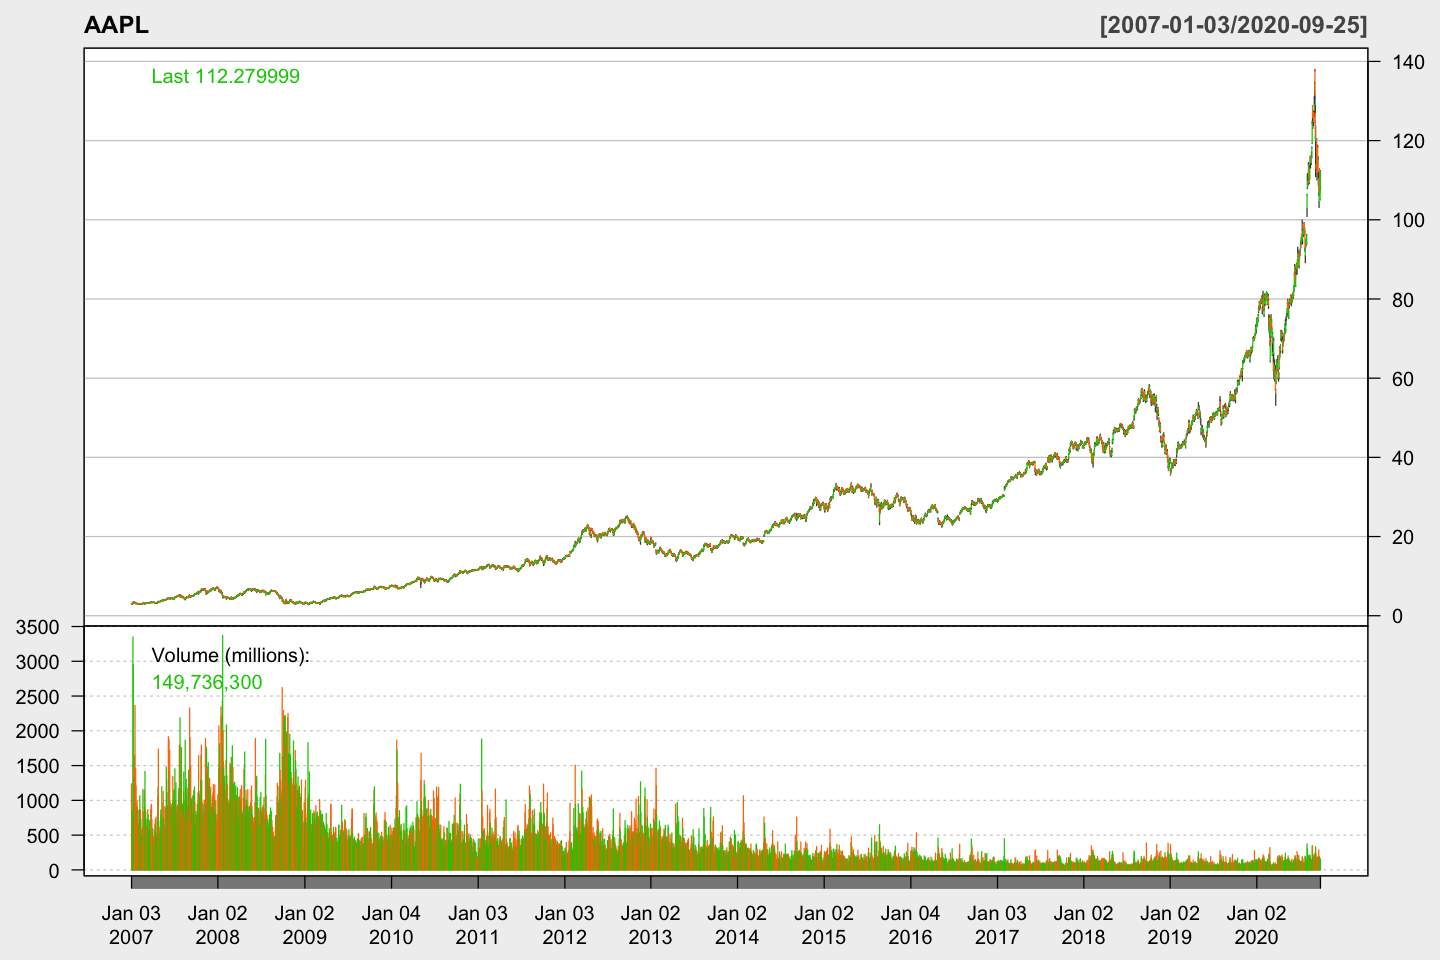

In [51]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, theme = chartTheme("white"))

#### Observation:
Over the past 8 years, the stock price has shown an increasing trend, though it had some dips during 2019 and 2020, where the stock prices fell significantly.

The volume has also been more or less declining, except for 2011, where we see a major fall in the volume of traded stocks. Therer were also small spikes during 2014.

### 12. Price and Volume of AAPL stocks for past 2 years, also added Bollinger Bands

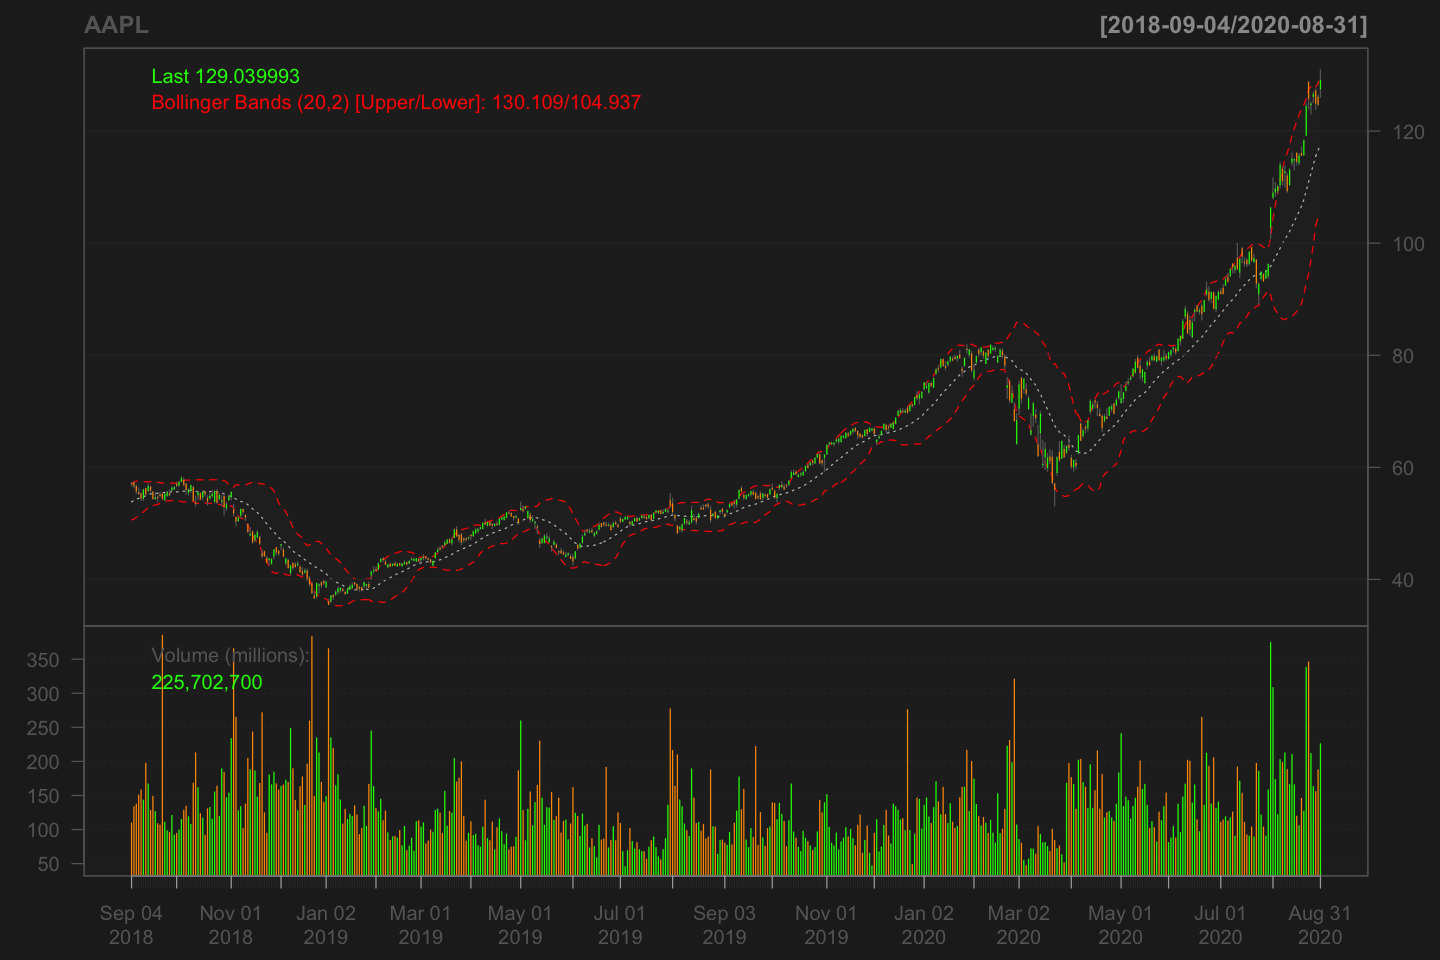

In [52]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "2018-09::2020-08", TA = c(addVo(), addBBands()))  #add volume and Bollinger Bands from TTR

#### Observation:
Over the past 2 years, the stock price has shown an increasing trend, though it had a huge dip during April 2020, where the stock prices fell significantly due to the Covid-19 pandemic. Prices have been rising ever since. There was also a fall in early 2019

The volume has also been more or less consitent, except for April 2020, where we see a major fall in the volume of traded stocks.

Further, we have added the lower and upper Bollinger bands, which here show that the stock prices were more less within very less deviation from the bands, except for the Covid-19 period, where there were huge deviations.

### 13. Price and fast and slow Moving Averages for AAPL stocks for past 1 year

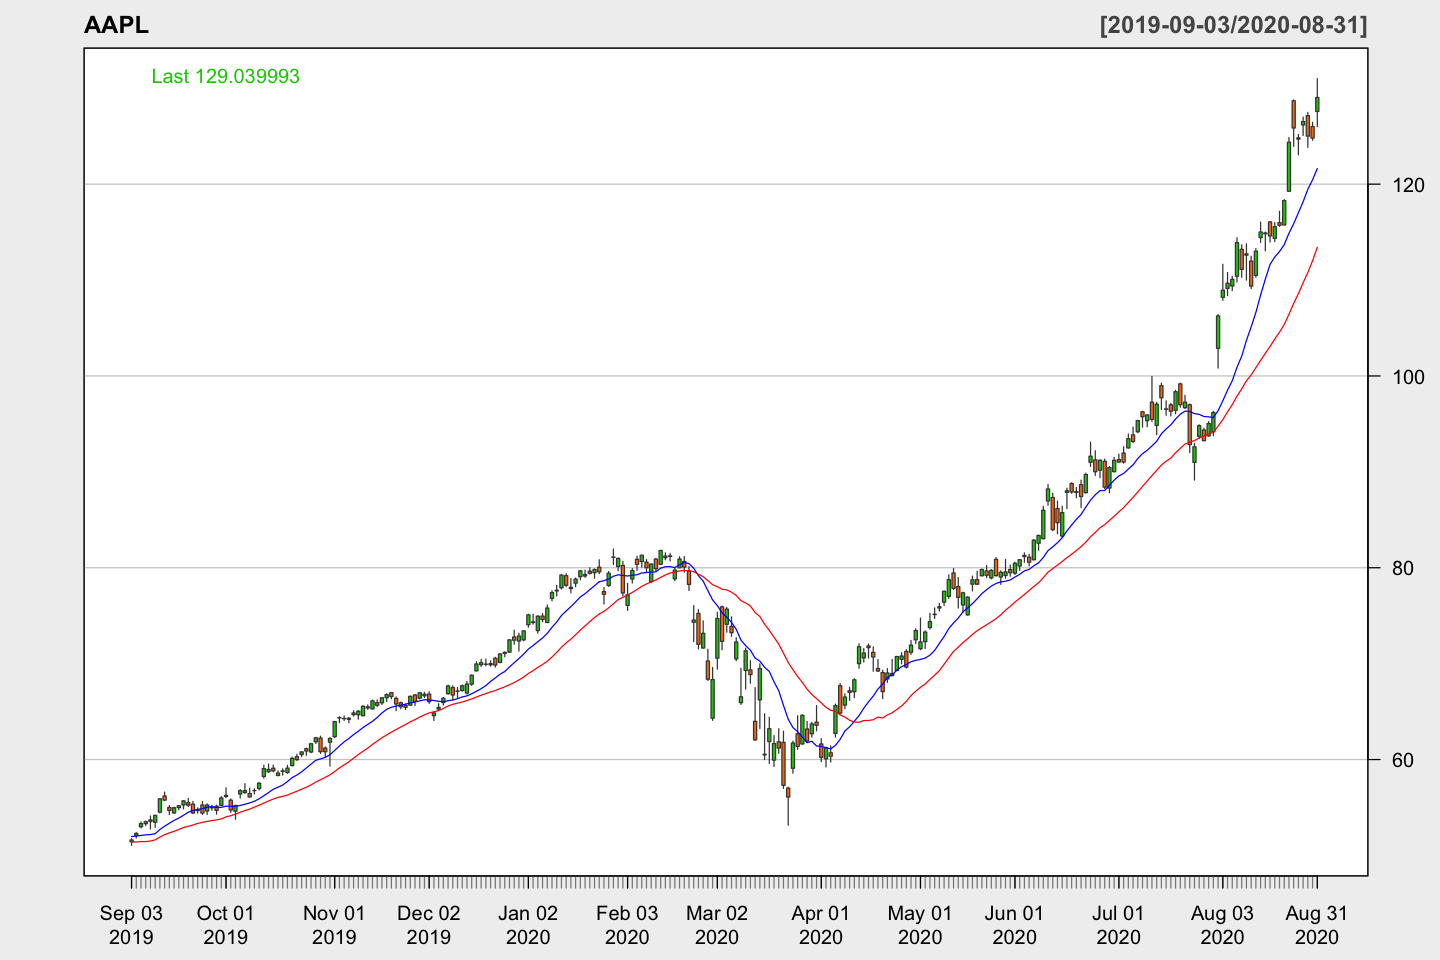

In [53]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "2019-09::2020-08",bar.type='hlc', 
            TA = c(addSMA(n=12,col="blue"),addSMA(n=26,col="red")),
            theme = chartTheme("white"))  

#### Observation:
Over the past 1 year, the stock price has more or less remained above the fast and slow moving averages. Except for April 2020, where the stock prices fell significantly due to the Covid-19 pandemic.

Also, the two moving averages intersect at various points, in which case they make the MACD = 0. They indicate that for those specific points, there is no difference between the stock prices as per the two different averages.

### 14. Price, moving averages, MACD and RSI for AAPL stocks for past 1 year

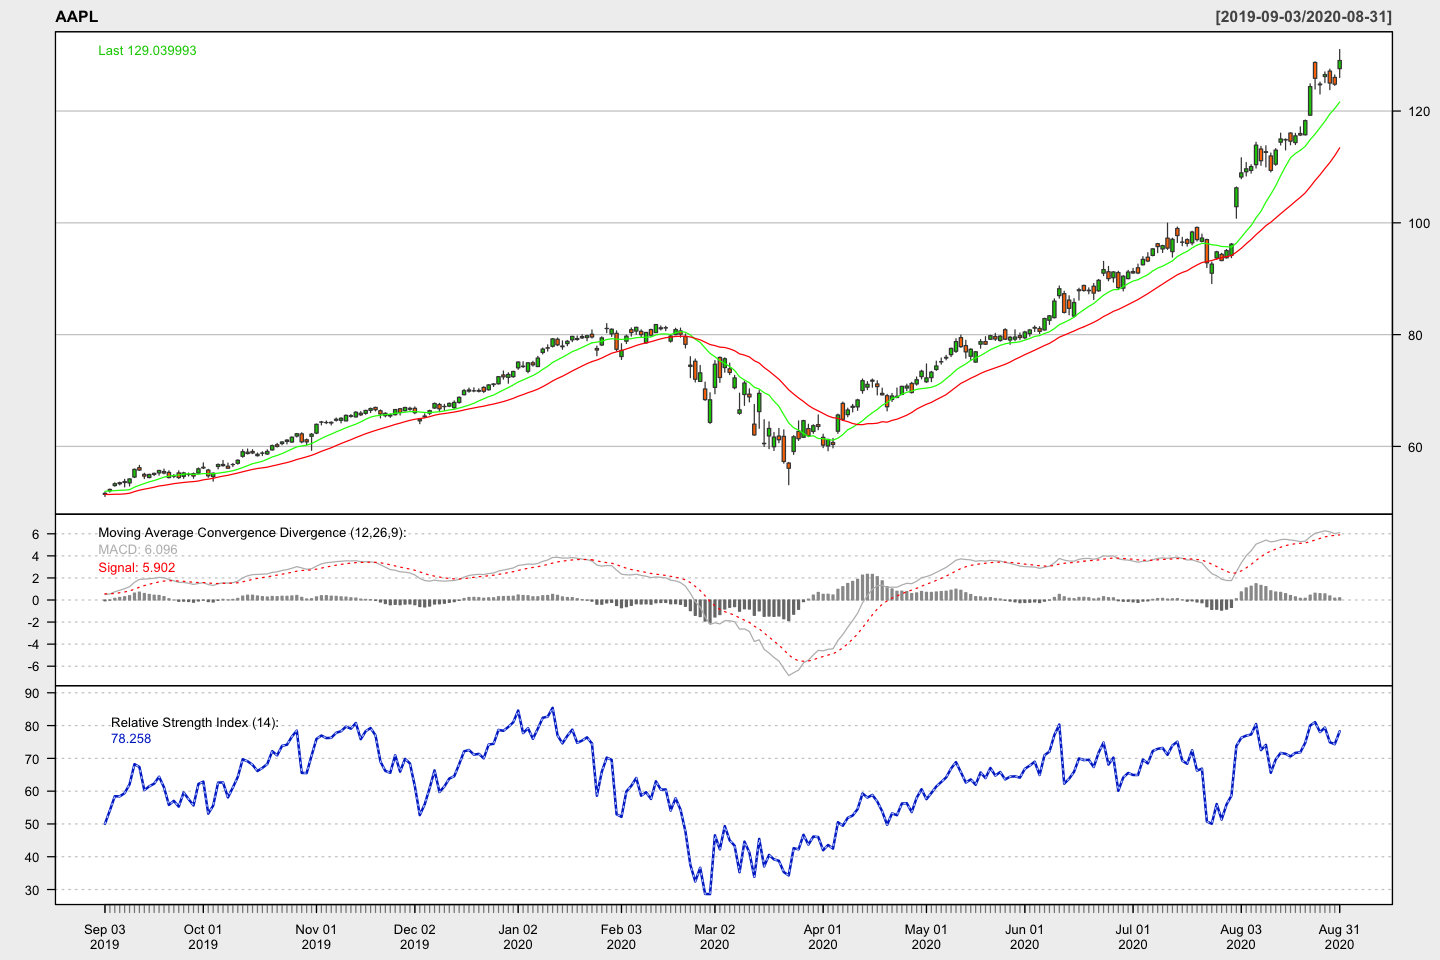

In [54]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "2019-09::2020-08",bar.type='hlc', 
            TA = c(addSMA(n=12,col="green"),addSMA(n=26,col="red"),
                addMACD(),addRSI()),
            theme = chartTheme("white"))  

#### Observation:
Over the past 1 year, the MACD and the RSI have more or less remained consistent, except for March-April 2020, where the stock prices fell significantly due to the Covid-19 pandemic.

Also, we see that when the two moving averages intersect at varius points, they make the MACD = 0.

### 15. Price, volume, bollinger bands, and CCI of AAPL stocks for past 1 year

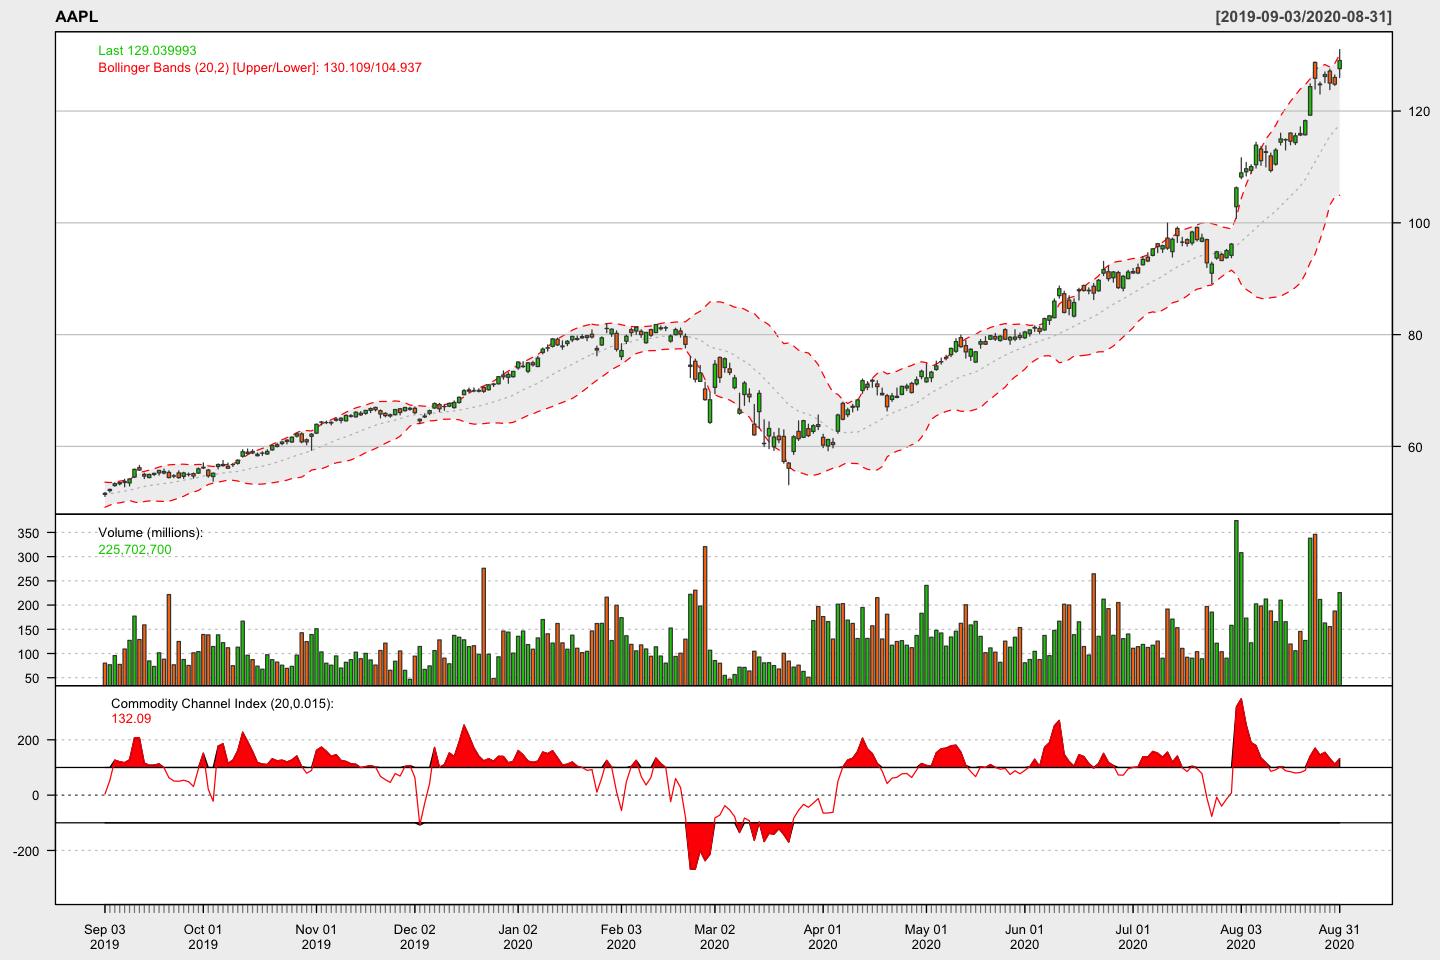

In [55]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "2019-09::2020-08",theme="white",  TA="addVo();addBBands();addCCI()") 

#### Observation:
Over the past 1 year, CCI fell largely for March-April 2020, where the stock prices fell significantly due to the Covid-19 pandemic. Also, CCI has reacted more than other indicators for AAPL stocks. There are several dips.

### 16. Price, volume, bollinger bands, CCI, and Open-Close of AAPL stocks for past 1 year

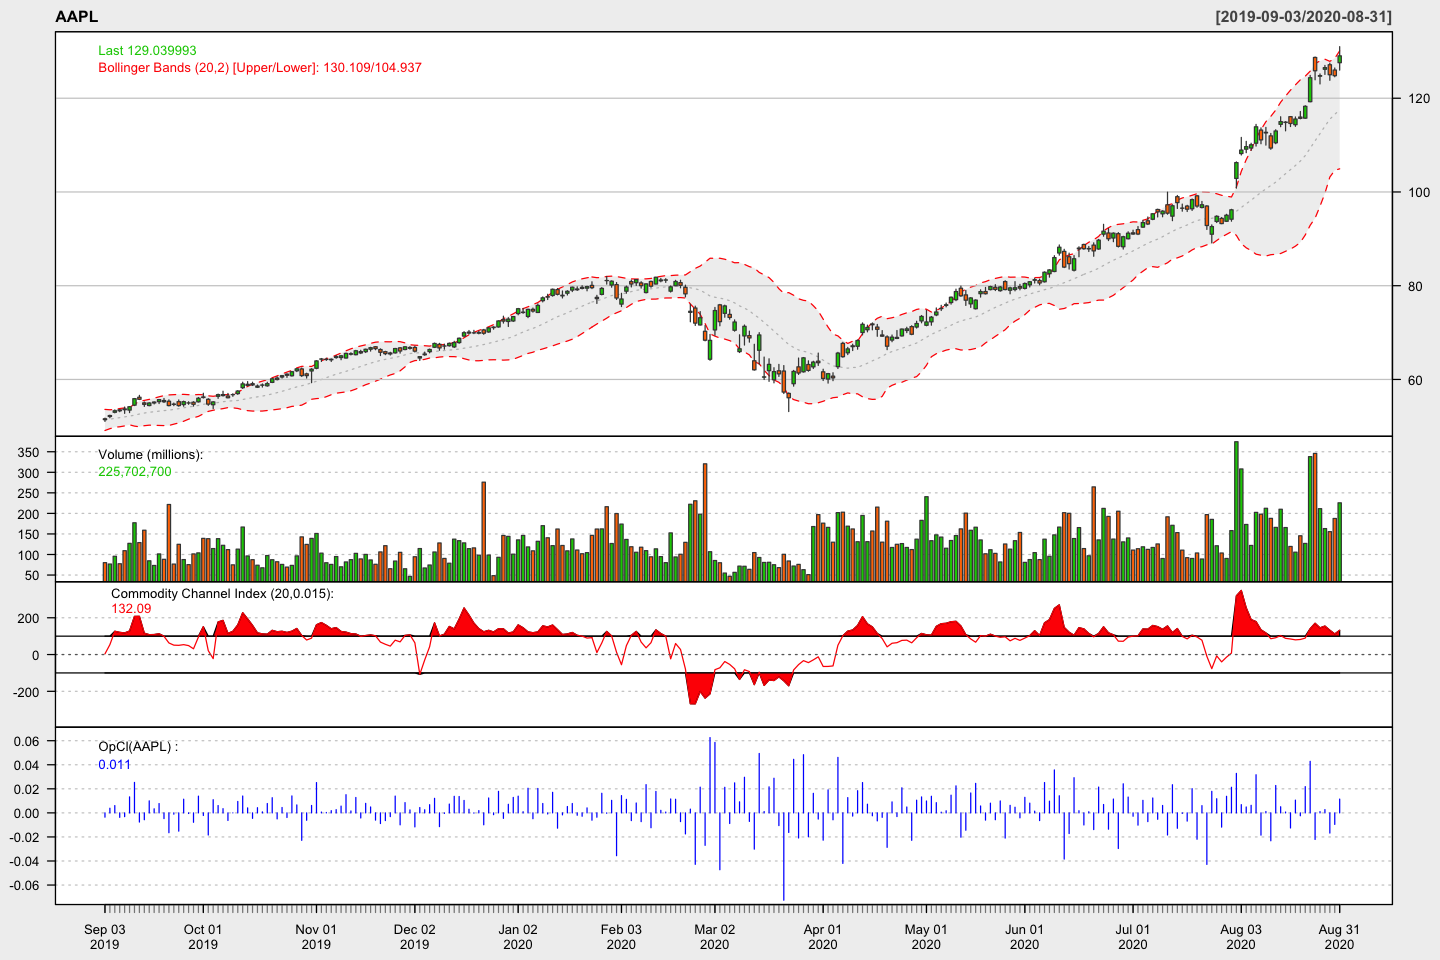

In [56]:
options(repr.plot.width = 12, repr.plot.height = 8)
chartSeries(AAPL, subset = "2019-09::2020-08",
            theme="white",  
            TA="addVo();addBBands();addCCI(); 
                addTA(OpCl(AAPL),col='blue', type='h')  ")

#### Observation:
Over the past 1 year, Open-Close was more or less moving in a consistend trend, but the Open-Close differed a lot, during the due to the Covid-19 pandemic.

## ----------------------------------------Section Break-----------------------------------------

# C. Design trading strategies for each of the stock symbols, Backtesting for  in-sample and out-of-sample

#  Stock 1: `SPGI` - S&P Global Inc.

## 1. Trading Strategies:

### MACD
Typically MACD is set as the difference between the 12-period simple moving average (SMA) and 26-period simple moving average (MACD = 12-period SMA − 26-period SMA), or “fast SMA — slow SMA”.

The MACD has a positive value whenever the 12-period SMA is above the 26-period SMA and a negative value when the 12-period SMA is below the 26-period SMA. The more distant the MACD is above or below its baseline indicates that the distance between the two SMAs is growing.

The 12-period SMA is called the “fast SMA” and the 26-period SMA is called the “slow SMA” because the 12-period SMA reacts faster to the more recent price changes, than the 26-period SMA.

The MACD function in R also computes the moving average of the MACD, called `signal`. The default number of periods to compute the signal is nine periods.

### RSI

RSI measures the magnitude of recent price changes to evaluate overbought or oversold conditions. It is displayed as an oscillator and can have a reading from 0 to 100. The general rules are:
- RSI >= 70: a security is overbought or overvalued and may be primed for a trend reversal or corrective pullback in price.
- RSI <= 30: an oversold or undervalued condition.

In [57]:
# Define the MACD and RSI

macd = MACD(SPGI$SPGI.Adjusted, nFast = 12, nSlow = 26, nSig = 9, maType = "SMA", percent = FALSE)
rsi = RSI(SPGI$SPGI.Adjusted, n = 14, maType = "SMA")

### For the following `in-smaple` analysis and testing, I will be using the dates from 'Jan 2007' up till 'Dec 2015'.

### 1. Buy and Hold

Buy-and-hold strategy means that we buy the stock and keep it all times. So here "1" means bought and held, we will not define "0" as  we are not selling the stock.

In [58]:
bh_strategy <- rep(1,dim(macd)[1])

In [59]:
# Check the output type of the strategy - Numeric

str(bh_strategy)

 num [1:3458] 1 1 1 1 1 1 1 1 1 1 ...


### 2. Enter and stay as long at MACD > Signal

- If macd > signal, we will enter and stay in the market. This will be indicated by "1"
- If macd < signal, we will exit the market. This will be indicated by "0"

Also, for any NA values, we will replace it with 0, which means sold or exited the market.

In [60]:
strategy2 = ifelse((macd$signal < macd$macd), 1, 0)
strategy2[is.na(strategy2)] = 0

In [61]:
# Check the output type of the strategy

str(strategy2)

An ‘xts’ object on 2007-01-03/2020-09-25 containing:
  Data: num [1:3458, 1] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "signal"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [62]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy2_in = strategy2["/2015-12"]
strategy2_out = strategy2["2016-01/"]

In [63]:
# Convert to numeric form for backtesting

strategy2_in = drop(coredata(strategy2_in))
strategy2_out = drop(coredata(strategy2_out))

### 3. Overbought Trend
Enter and stay in the market

Here, we add RSI to our strategy. An overbought stock (RSI > 70) may indicate rising price opportunities. So our strategy becomes:
- Enter and stay in the market when MACD > Signal and RSI > 70


In [64]:
strategy3 = ifelse ((macd$signal < macd$macd) & (rsi$rsi > 70), 1, 0)
strategy3[is.na(strategy3)] = 0

In [65]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy3_in = strategy3["/2015-12"]
strategy3_out = strategy3["2016-01/"]

In [66]:
# Convert to numeric form for backtesting

strategy3_in = drop(coredata(strategy3_in))
strategy3_out = drop(coredata(strategy3_out))

### 4. Oversold for rebound opportunity
Enter and stay in the market

An oversold stock (RSI < 30) may indicate a price rebound opportunity. So our strategy becomes:
- Enter and stay in the market when MACD < Signal and RSI < 30,

In [67]:
strategy4 = ifelse ((macd$signal > macd$macd) & (rsi$rsi < 30), 1, 0)
strategy4[is.na(strategy4)]= 0

In [68]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy4_in = strategy4["/2015-12"]
strategy4_out = strategy4["2016-01/"]

In [69]:
# Convert to numeric form for backtesting

strategy4_in = drop(coredata(strategy4_in))
strategy4_out = drop(coredata(strategy4_out))

## 2. Backtesting - 'In-sample'

The `SPGI` has data starting Jan 2007, till current. So, for the in-sample, out of all 14 years, I have selected the first 9 years. 

The essential metrics in a backtesting include the cumulative returns, the annualized returns, the Sharpe ratio, and the annualized Sharpe ratio. 

The higher a fund’s Sharpe ratio, the better a fund’s returns have been relative to the risk it has taken on. Because it uses standard deviation, the Sharpe ratio can be used to compare risk-adjusted returns across all fund categories.

The higher a fund’s standard deviation, the higher the fund’s returns need to be to earn a high Sharpe ratio. Keep in mind that even though a higher Sharpe ratio indicates a better historical risk-adjusted performance, this doesn’t necessarily translate to a lower-volatility fund.

The input “strategy” is lagged by one period. It is because when we see the daily returns, the market is already closed. Our trading has to take place on the next day.

In [70]:
# We will put the becktesting commands in a function

# Strategy 1 - Buy-and-hold strategy
BH_backtest <- function(df,from_date,to_date,strategy_name){
    rtn.daily <- dailyReturn(df) # returns by day 
    trade_return <- rtn.daily[index(rtn.daily)<=to_date & index(rtn.daily)>=from_date]
    cumm_return <- Return.cumulative(trade_return)
    annual_return <- Return.annualized(trade_return) 
    summary(as.ts(trade_return))
    SharpeRatio <- SharpeRatio(as.ts(trade_return), Rf = 0, p = 0.95, FUN = "StdDev")
    SharpeRatioAnnualized <- SharpeRatio.annualized(trade_return, Rf = 0)
    out <- as.data.frame(c(cumm_return,annual_return,SharpeRatio,SharpeRatioAnnualized))
    out <- round(out,2)
    colnames(out) <- strategy_name
    row.names(out) <- c('Cumulative Return','Annualized Return','Sharpe Ratio','Annualized Sharpe Ratio')
    
    return(out)
    }

buy_and_hold_performance <- BH_backtest(SPGI, from_date = '2007-01-03', to_date = '2015-12-31',"Strategy1 - Buy & Hold Strategy")
buy_and_hold_performance



# Other strategies
backtest <- function(df,from_date,to_date,strategy,strategy_name){
    rtn.daily <- dailyReturn(df) # returns by day 
    trade_return <- (rtn.daily[index(rtn.daily)<=to_date & index(rtn.daily)>=from_date]) * (lag(strategy, na.pad = FALSE))
    cumm_return <- Return.cumulative(trade_return)
    annual_return <- Return.annualized(trade_return) 
    summary(as.ts(trade_return))
    SharpeRatio <- SharpeRatio(as.ts(trade_return), Rf = 0, p = 0.95, FUN = "StdDev")
    SharpeRatioAnnualized <- SharpeRatio.annualized(trade_return, Rf = 0)
    out <- as.data.frame(c(cumm_return,annual_return,SharpeRatio,SharpeRatioAnnualized))
    out <- round(out,2)
    colnames(out) <- strategy_name
    row.names(out) <- c('Cumulative Return','Annualized Return','Sharpe Ratio','Annualized Sharpe Ratio')
    
    return(out)
    }

# Strategy 2
strategy2_performance <- backtest(SPGI, from_date = '2007-01-03', to_date = '2015-12-31', strategy2_in,"Strategy2 - Stay if MACD > Signal")
strategy2_performance

# Strategy 3
strategy3_performance <- backtest(SPGI, from_date = '2007-01-03', to_date = '2015-12-31', strategy3_in,"Strategy3 - Overbought")
strategy3_performance

# Strategy 4
strategy4_performance <- backtest(SPGI, from_date = '2007-01-03', to_date = '2015-12-31', strategy4_in,"Strategy4 - Oversold")
strategy4_performance

Strategy1 - Buy & Hold Strategy
Cumulative Return       0.45                           
Annualized Return       0.04                           
Sharpe Ratio            0.02                           
Annualized Sharpe Ratio 0.12

Strategy2 - Stay if MACD > Signal
Cumulative Return       0.44                             
Annualized Return       0.04                             
Sharpe Ratio            0.02                             
Annualized Sharpe Ratio 0.17

Strategy3 - Overbought
Cumulative Return       -0.10                 
Annualized Return       -0.01                 
Sharpe Ratio             0.00                 
Annualized Sharpe Ratio -0.10

Strategy4 - Oversold
Cumulative Return       0.04                
Annualized Return       0.00                
Sharpe Ratio            0.01                
Annualized Sharpe Ratio 0.03

#### Usually:
- any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. 
- A ratio higher than 2.0 is rated as very good. 
- A ratio of 3.0 or higher is considered excellent. 
- A ratio under 1.0 is considered sub-optimal.

#### Observation: 
For `SPGI`, from the above 4 strategies, on the in-sample testing, we observe that `Buy & Hold` and `Stay if MACD > Signal` are the two best strategies, although a Sharpe ratio under 1 is considered sub-optimal. 

Also, the Annualized return is higher for other strategies, but we need to estimate based on volatility, so we use Sharpe Ratio. Here, `Buy & Hold` seems to be the best.

Also, the Annualized Sharpe ratio is best for the two strategies. We will further verify this by backtesting on the out-of-sample data, as below.

## 3. Backtesting - 'Out-of-sample'

For the out-of-sample, out of total 14 years data, I have selected the recent 5 years data.

In [71]:
# Strategy 1
buy_and_hold_performance <- BH_backtest(SPGI, from_date = '2016-01-01', to_date = '2020-09-25',"Strategy1 - Buy & Hold Strategy")
buy_and_hold_performance

# Strategy 2
strategy2_performance <- backtest(SPGI, from_date = '2016-01-01', to_date = '2020-09-25', strategy2_out,"Strategy2 - Stay if MACD > Signal")
strategy2_performance

# Strategy 3
strategy3_performance <- backtest(SPGI, from_date = '2016-01-01', to_date = '2020-09-25', strategy3_out,"Strategy3 - Overbought")
strategy3_performance

# Strategy 4
strategy4_performance <- backtest(SPGI, from_date = '2016-01-01', to_date = '2020-09-25', strategy4_out,"Strategy4 - Oversold")
strategy4_performance

Strategy1 - Buy & Hold Strategy
Cumulative Return       2.58                           
Annualized Return       0.31                           
Sharpe Ratio            0.07                           
Annualized Sharpe Ratio 1.10

Strategy2 - Stay if MACD > Signal
Cumulative Return       1.17                             
Annualized Return       0.18                             
Sharpe Ratio            0.07                             
Annualized Sharpe Ratio 1.13

Strategy3 - Overbought
Cumulative Return       0.34                  
Annualized Return       0.06                  
Sharpe Ratio            0.05                  
Annualized Sharpe Ratio 0.70

Strategy4 - Oversold
Cumulative Return       0.25                
Annualized Return       0.05                
Sharpe Ratio            0.04                
Annualized Sharpe Ratio 0.62

#### Observation: 
Comparing the results with in-sample results, it is clear that `Buy & Hold` is the best strategy out of the two we identified. This is because, it has the highest Sharpe ratio, as well the highest Annualized Sharpe ratio.

Also, in this out-of-sample test, we see that the Sharpe ratio's of the Strategy 3 and 4 have significant improvement.

Also, the Annualized return is higher for other strategies, but we need to estimate based on volatility, so we use Sharpe Ratio. Here, `Buy & Hold` seems to be the best.

#### Business Insight - 
Considering all options, the Sharpe ratio, and the annualized Sharpe ratio, the best strategy is `Buy & Hold` for `SPGI`. 

## -----------------------------------------------------------------

#  Stock 2: `FB` - Facebook Inc.

## 1. Trading Strategies:

In [72]:
macd = MACD(FB$FB.Adjusted, nFast = 12, nSlow = 26, nSig = 9, maType = "SMA", percent = FALSE)
rsi = RSI(FB$FB.Adjusted, n = 14, maType = "SMA")

### For the following `in-smaple` analysis and testing, I will be using the dates from 'May 2012' up till 'Dec 2017'.

### 1. Buy and Hold

In [73]:
bh_strategy <- rep(1,dim(macd)[1])

### 2. Enter and stay as long at MACD > Signal

- If macd > signal, we will enter and stay in the market. This will be indicated by "1"
- If macd < signal, we will exit the market. This will be indicated by "0"

Also, for any NA values, we will replace it with 0, which means sold or exited the market.

In [74]:
strategy2 = ifelse((macd$signal < macd$macd), 1, 0)
strategy2[is.na(strategy2)] = 0

In [75]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy2_in = strategy2["/2017-12"]
strategy2_out = strategy2["2018-01/"]

In [76]:
# Convert to numeric form for backtesting

strategy2_in = drop(coredata(strategy2_in))
strategy2_out = drop(coredata(strategy2_out))

### 3. Overbought Trend
Enter and stay in the market

Here, we add RSI to our strategy. An overbought stock (RSI > 70) may indicate rising price opportunities. So our strategy becomes:
- Enter and stay in the market when MACD > Signal and RSI > 70

In [77]:
strategy3 = ifelse ((macd$signal < macd$macd) & (rsi$rsi > 70), 1, 0)
strategy3[is.na(strategy3)] = 0

In [78]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy3_in = strategy3["/2017-12"]
strategy3_out = strategy3["2018-01/"]

In [79]:
# Convert to numeric form for backtesting

strategy3_in = drop(coredata(strategy3_in))
strategy3_out = drop(coredata(strategy3_out))

### 4. Oversold for rebound opportunity
Enter and stay in the market

An oversold stock (RSI < 30) may indicate a price rebound opportunity. So our strategy becomes:
- Enter and stay in the market when MACD < Signal and RSI < 30,

In [80]:
strategy4 = ifelse ((macd$signal > macd$macd) & (rsi$rsi < 30), 1, 0)
strategy4[is.na(strategy4)]= 0

In [81]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy4_in = strategy4["/2017-12"]
strategy4_out = strategy4["2018-01/"]

In [82]:
# Convert to numeric form for backtesting

strategy4_in = drop(coredata(strategy4_in))
strategy4_out = drop(coredata(strategy4_out))

## 2. Backtesting - 'In-sample'

The `FB` has data starting May 2012, till current. So, for the in-sample, out of all 8 years, I have selected the first 5 years. 

In [83]:
# Strategy 1
buy_and_hold_performance <- BH_backtest(FB, from_date = '2012-05-18', to_date = '2017-12-31',"Strategy1 - Buy & Hold Strategy")
buy_and_hold_performance

# Strategy 2
strategy2_performance <- backtest(FB, from_date = '2012-05-18', to_date = '2017-12-31', strategy2_in,"Strategy2 - Stay if MACD > Signal")
strategy2_performance

# Strategy 3
strategy3_performance <- backtest(FB, from_date = '2012-05-18', to_date = '2017-12-31', strategy3_in,"Strategy3 - Overbought")
strategy3_performance

# Strategy 4
strategy4_performance <- backtest(FB, from_date = '2012-05-18', to_date = '2017-12-31', strategy4_in,"Strategy4 - Oversold")
strategy4_performance

Strategy1 - Buy & Hold Strategy
Cumulative Return       3.20                           
Annualized Return       0.29                           
Sharpe Ratio            0.05                           
Annualized Sharpe Ratio 0.78

Strategy2 - Stay if MACD > Signal
Cumulative Return       1.51                             
Annualized Return       0.18                             
Sharpe Ratio            0.05                             
Annualized Sharpe Ratio 0.72

Strategy3 - Overbought
Cumulative Return       0.19                  
Annualized Return       0.03                  
Sharpe Ratio            0.02                  
Annualized Sharpe Ratio 0.19

Strategy4 - Oversold
Cumulative Return       0.26                
Annualized Return       0.04                
Sharpe Ratio            0.02                
Annualized Sharpe Ratio 0.29

#### Usually: 
- any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. 
- A ratio higher than 2.0 is rated as very good. 
- A ratio of 3.0 or higher is considered excellent. 
- A ratio under 1.0 is considered sub-optimal.

#### Observation: 
For `FB`, from the above 4 strategies, we observe that `Buy & Hold` and `Stay if MACD > Signal` are the best strategies, although a Sharpe ratio under 1 is considered sub-optimal.

Also, the Annualized return is higher for other strategies, but we need to estimate based on volatility, so we use Sharpe Ratio. Here, both our suggested strategies also have good returns.

Also, the Annualized Sharpe ratio is best for the two strategies. We will further verify this by backtesting on the out-of-sample data, as below.

## 3. Backtesting - 'Out-of-sample'

For the out-of-sample, out of total 8 years data, I have selected the recent 3 years data.

In [84]:
# Strategy 1
buy_and_hold_performance <- BH_backtest(FB, from_date = '2018-01-01', to_date = '2020-09-25',"Strategy1 - Buy & Hold Strategy")
buy_and_hold_performance

# Strategy 2
strategy2_performance <- backtest(FB, from_date = '2018-01-01', to_date = '2020-09-25', strategy2_out,"Strategy2 - Stay if MACD > Signal")
strategy2_performance

# Strategy 3
strategy3_performance <- backtest(FB, from_date = '2018-01-01', to_date = '2020-09-25', strategy3_out,"Strategy3 - Overbought")
strategy3_performance

# Strategy 4
strategy4_performance <- backtest(FB, from_date = '2018-01-01', to_date = '2020-09-25', strategy4_out,"Strategy4 - Oversold")
strategy4_performance

Strategy1 - Buy & Hold Strategy
Cumulative Return       0.44                           
Annualized Return       0.14                           
Sharpe Ratio            0.03                           
Annualized Sharpe Ratio 0.38

Strategy2 - Stay if MACD > Signal
Cumulative Return       -0.20                            
Annualized Return       -0.08                            
Sharpe Ratio            -0.01                            
Annualized Sharpe Ratio -0.30

Strategy3 - Overbought
Cumulative Return       -0.13                 
Annualized Return       -0.05                 
Sharpe Ratio            -0.01                 
Annualized Sharpe Ratio -0.31

Strategy4 - Oversold
Cumulative Return       0.14                
Annualized Return       0.05                
Sharpe Ratio            0.03                
Annualized Sharpe Ratio 0.37

#### Observation: 
Comparing the results with in-sample results, it is clear that `Buy & Hold` is the best strategy out of the two we identified. This is because, it has the highest Sharpe ratio, as well the highest Annualized Sharpe ratio.

Also, in this out-of-sample test, we see that the Sharpe ratio of `Stay if MACD > Signal` declines significantly, and hence is not ideal.

Also, the Annualized return is higher for other strategies, but we need to estimate based on volatility, so we use Sharpe Ratio. Here, `Buy & Hold` seems to be the best. 

#### Business Insight - 
Considering all options, the Sharpe ratio, and the annualized Sharpe ratio, the best strategy is `Buy & Hold` for `FB`. 

## -----------------------------------------------------------------

#  Stock 3: `AAPL` - Apple Inc.

## 1. Trading Strategies:

In [85]:
macd = MACD(AAPL$AAPL.Adjusted, nFast = 12, nSlow = 26, nSig = 9, maType = "SMA", percent = FALSE)
rsi = RSI(AAPL$AAPL.Adjusted, n = 14, maType = "SMA")

In [86]:
d <- cbind(AAPL,macd,rsi)
d$SMA12 <- SMA(d$AAPL.Adjusted,12)
d$SMA26 <- SMA(d$AAPL.Adjusted,26)
d <- subset(d, select = -c(AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume))
head(d,2)

           AAPL.Adjusted macd signal rsi SMA12 SMA26
2007-01-03      2.586245   NA     NA  NA    NA    NA
2007-01-04      2.643649   NA     NA  NA    NA    NA

### For the following `in-smaple` analysis and testing, I will be using the dates from 'Jan 2007' up till 'Dec 2015'.

### 1. Buy and Hold

In [87]:
bh_strategy <- rep(1,dim(macd)[1])

### 2. Enter and stay as long at MACD > Signal

- If macd > signal, we will enter and stay in the market. This will be indicated by "1"
- If macd < signal, we will exit the market. This will be indicated by "0"

Also, for any NA values, we will replace it with 0, which means sold or exited the market.

In [88]:
strategy2 = ifelse((macd$signal < macd$macd), 1, 0)
strategy2[is.na(strategy2)] = 0

In [89]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy2_in = strategy2["/2015-12"]
strategy2_out = strategy2["2016-01/"]

In [90]:
# Convert to numeric form for backtesting

strategy2_in = drop(coredata(strategy2_in))
strategy2_out = drop(coredata(strategy2_out))

### 3. Overbought Trend
Enter and stay in the market

Here, we add RSI to our strategy. An overbought stock (RSI > 70) may indicate rising price opportunities. So our strategy becomes:
- Enter and stay in the market when MACD > Signal and RSI > 70

In [91]:
strategy3 = ifelse ((macd$signal < macd$macd) & (rsi$rsi > 70), 1, 0)
strategy3[is.na(strategy3)] = 0

In [92]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy3_in = strategy3["/2015-12"]
strategy3_out = strategy3["2016-01/"]

In [93]:
# Convert to numeric form for backtesting

strategy3_in = drop(coredata(strategy3_in))
strategy3_out = drop(coredata(strategy3_out))

### 4. Oversold for rebound opportunity
Enter and stay in the market

An oversold stock (RSI < 30) may indicate a price rebound opportunity. So our strategy becomes:
- Enter and stay in the market when MACD < Signal and RSI < 30,

In [94]:
strategy4 = ifelse ((macd$signal > macd$macd) & (rsi$rsi < 30), 1, 0)
strategy4[is.na(strategy4)]= 0

In [95]:
# Separate dates to be used for in-sample and out-of-sample testing

strategy4_in = strategy4["/2015-12"]
strategy4_out = strategy4["2016-01/"]

In [96]:
# Convert to numeric form for backtesting

strategy4_in = drop(coredata(strategy4_in))
strategy4_out = drop(coredata(strategy4_out))

## 2. Backtesting - 'In-sample'

The `AAPL` has data starting Jan 2007, till current. So, for the in-sample, out of all 14 years, I have selected the first 9 years. 

In [97]:
# Strategy 1
buy_and_hold_performance <- BH_backtest(AAPL, from_date = '2007-01-03', to_date = '2015-12-31',"Strategy1 - Buy & Hold Strategy")
buy_and_hold_performance

# Strategy 2
strategy2_performance <- backtest(AAPL, from_date = '2007-01-03', to_date = '2015-12-31', strategy2_in,"Strategy2 - Stay if MACD > Signal")
strategy2_performance

# Strategy 3
strategy3_performance <- backtest(AAPL, from_date = '2007-01-03', to_date = '2015-12-31', strategy3_in,"Strategy3 - Overbought")
strategy3_performance

# Strategy 4
strategy4_performance <- backtest(AAPL, from_date = '2007-01-03', to_date = '2015-12-31', strategy4_in,"Strategy4 - Oversold")
strategy4_performance

Strategy1 - Buy & Hold Strategy
Cumulative Return       7.54                           
Annualized Return       0.27                           
Sharpe Ratio            0.06                           
Annualized Sharpe Ratio 0.80

Strategy2 - Stay if MACD > Signal
Cumulative Return       0.83                             
Annualized Return       0.07                             
Sharpe Ratio            0.03                             
Annualized Sharpe Ratio 0.33

Strategy3 - Overbought
Cumulative Return       1.08                  
Annualized Return       0.09                  
Sharpe Ratio            0.05                  
Annualized Sharpe Ratio 0.76

Strategy4 - Oversold
Cumulative Return       0.02                
Annualized Return       0.00                
Sharpe Ratio            0.01                
Annualized Sharpe Ratio 0.01

#### Usually: 
- any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. 
- A ratio higher than 2.0 is rated as very good. 
- A ratio of 3.0 or higher is considered excellent. 
- A ratio under 1.0 is considered sub-optimal.

#### Observation: 
For `AAPL`, from the above 4 strategies, we observe that `Buy & Hold` and `Overbought` are the best strategies, although a Sharpe ratio under 1 is considered sub-optimal.

Also, the Annualized return is higher for other strategies, but we need to estimate based on volatility, so we use Sharpe Ratio. But here, `Buy & Hold` still seems the best.

Also, the Annualized Sharpe ratio is best for the two strategies. We will further verify this by backtesting on the out-of-sample data, as below.

## 3. Backtesting - 'Out-of-sample'

For the out-of-sample, out of total 14 years data, I have selected the recent 5 years data.

In [98]:
# Strategy 1
buy_and_hold_performance <- BH_backtest(AAPL, from_date = '2016-01-01', to_date = '2020-09-25',"Buy & Hold Strategy")
buy_and_hold_performance

# Strategy 2
strategy2_performance <- backtest(AAPL, from_date = '2016-01-01', to_date = '2020-09-25', strategy2_out,"Strategy2 - Stay if MACD > Signal")
strategy2_performance

# Strategy 3
strategy3_performance <- backtest(AAPL, from_date = '2016-01-01', to_date = '2020-09-25', strategy3_out,"Strategy3 - Overbought")
strategy3_performance

# Strategy 4
strategy4_performance <- backtest(AAPL, from_date = '2016-01-01', to_date = '2020-09-25', strategy4_out,"Strategy4 - Oversold")
strategy4_performance

Buy & Hold Strategy
Cumulative Return       3.27               
Annualized Return       0.36               
Sharpe Ratio            0.07               
Annualized Sharpe Ratio 1.20

Strategy2 - Stay if MACD > Signal
Cumulative Return       1.65                             
Annualized Return       0.23                             
Sharpe Ratio            0.08                             
Annualized Sharpe Ratio 1.36

Strategy3 - Overbought
Cumulative Return       0.74                  
Annualized Return       0.12                  
Sharpe Ratio            0.08                  
Annualized Sharpe Ratio 1.24

Strategy4 - Oversold
Cumulative Return       0.18                
Annualized Return       0.04                
Sharpe Ratio            0.02                
Annualized Sharpe Ratio 0.34

#### Observation: 
Comparing the results with in-sample results, it is clear that `Overbought` is the best strategy out of the two we identified. This is because, it has the highest Sharpe ratio, as well the highest Annualized Sharpe ratio.

Also, in this out-of-sample test, we see that the Sharpe ratio of `Stay if MACD > Signal` improves significantly, and is better than `Buy & Hold`.

Also, the Annualized return is higher for other strategies, but we need to estimate based on volatility, so we use Sharpe Ratio.

#### Business Insight - 
Considering all options, the Sharpe ratio, and the annualized Sharpe ratio, the best strategy is `Overbought` for `AAPL`. 

## -----------------------------------------------------------------